In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 50)

# Splitted data availability 

In [3]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            if _y != 0:
                ax.text(_x, _y, value, ha='center')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs) 

In [4]:
def splitted_data_availability_func(data, name=''):

    data['Grupa'] = data['Group']

    dict_group = {'Train' : 'treningowa', 
                    'Test' : 'walidacyjna'}

    data_preprocessed = data.replace({'Grupa' : dict_group})

    # value_counts_df = df.groupby(['Type', 'Group']).size().unstack(fill_value=0).reset_index()
    value_counts_df = data_preprocessed.groupby(['Type', 'Grupa']).size().reset_index(name='Quantity')

    value_counts_df['Type'] = value_counts_df['Type'].astype('int')
    value_counts_df['Quantity'] = value_counts_df['Quantity'].astype('int')
    value_counts_df['Grupa'] = value_counts_df['Grupa'].astype('str')
    value_counts_df = value_counts_df.sort_values(by='Type')

    bplot = sns.barplot(x='Type', y='Quantity', hue='Grupa', data = value_counts_df, palette=['forestgreen', 'royalblue'])
    bplot.set(title='Dostępność danych ' + str(name) + ' z podziałem na grupy', xlabel='Klasa', ylabel='Liczebność')
    # bplot.set_ylim(0, 140)
    show_values_on_bars(bplot)
    plt.show()

In [5]:
def splitted_data_availability_func1(datasets, names):

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 14))
    fig.suptitle('Dostępność danych po podziale na grupy', fontsize=16)

    for i, (data, name, ax) in enumerate(zip(datasets, names, axes.flatten())):
        data['Grupa'] = data['Group'].astype(str)

        dict_group = {'Train' : 'treningowa', 
                        'Test' : 'walidacyjna'}

        data_preprocessed = data.replace({'Grupa' : dict_group})

        # value_counts_df = df.groupby(['Type', 'Group']).size().unstack(fill_value=0).reset_index()
        value_counts_df = data_preprocessed.groupby(['Type', 'Grupa']).size().reset_index(name='Quantity')

        value_counts_df['Type'] = value_counts_df['Type'].astype('int')
        value_counts_df['Quantity'] = value_counts_df['Quantity'].astype('int')
        value_counts_df['Grupa'] = value_counts_df['Grupa'].astype('str')
        value_counts_df = value_counts_df.sort_values(by='Type')

        bplot = sns.barplot(x='Type', y='Quantity', hue='Grupa', data = value_counts_df, palette=['forestgreen', 'royalblue'], ax=ax)
        bplot.set(title=f'({chr(65 + i)}) {str(name)}', xlabel='Klasa', ylabel='Liczebność')
        bplot.set_ylim(0, 150)

        handles, labels = ax.get_legend_handles_labels()
        bplot.legend().set_visible(False)
        show_values_on_bars(bplot)

    fig.legend(handles, labels, title='Grupa', loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)

    plt.tight_layout()
    plt.show()

# Functions

In [6]:
def linesplot_results_No_selected_genes(data, metrics_col='', metryka='', metoda_fs='filtrujących'):

    colors_hue = 4
    green_palette = sns.color_palette("Greens", n_colors=colors_hue)
    blue_palette = sns.color_palette("Blues", n_colors=colors_hue)
    red_palette = sns.color_palette("Oranges", n_colors=colors_hue)

    combined_palette = green_palette + blue_palette + red_palette

    markers = ['s', '^', 'x', '.']

    datasets = data['Dataset'].unique()
    num_datasets = len(datasets)

    fig, axes = plt.subplots(nrows=int(num_datasets), ncols=1, figsize=(12, 11), sharex=True)
    # fig, axes = plt.subplots(nrows=int(num_datasets/2), ncols=2, figsize=(12, 11), sharex=True)

    axes = axes.flatten()

    for idx, dataset in enumerate(datasets):
        ax = axes[idx]
        dataset_df = data[data['Dataset'] == dataset]

        dataset_df = dataset_df.sort_values(by=['Method', 'No. selected genes'])

        methods = dataset_df['Method'].unique()

        for i, (method, group) in enumerate(dataset_df.groupby('Method')):
            color = combined_palette[i % len(combined_palette)] 
            marker = markers[i % len(markers)]
            ax.plot(group['No. selected genes'], group[metrics_col], marker=marker, markerfacecolor='none', label=method, color=color)

        label = f'({chr(ord("A") + idx)})'

        ax.set_title(f'{label} {dataset}')
        ax.set_xlabel('Liczba wyselekcjonowanych genów')
        ax.set_ylabel(str(metryka))
        ax.set_ylim(0.35, 1.0)
        ax.set_xlim(0, 1010)
        ax.set_xticks([10, 20, 50, 100, 200, 500, 1000])
        ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000])
        xticks_positions = ax.get_xticks()
        xticks_positions[1] += 1.1
        ax.set_xticks(xticks_positions)
        ax.tick_params(axis='x', rotation=45)

        handles, labels = ax.get_legend_handles_labels()

    fig.legend(handles, labels, title='Metoda selekcji + klasyfikator', loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)

    plt.suptitle(str(metryka) + ' metod ' + str(metoda_fs) + ' dla wyselekcjonowanej liczby genów', fontsize=16)
    plt.tight_layout()
    plt.show()

In [7]:
def boxplot_results(data, metrics_col='',metryka='', metoda_fs=''):

    datasets = data['Dataset'].unique()

    num_datasets = len(datasets)
    fig, axes = plt.subplots(nrows=int(num_datasets), ncols=1, figsize=(12, 11), sharex=True)

    axes = axes.flatten()

    data = data.sort_values(by=['Feature Selection method'])

    feature_methods_order = data['Feature Selection method'].unique()

    custom_palette = ['forestgreen', 'cornflowerblue', 'darkorange']

    for i, dataset in enumerate(datasets):
        subset = data[data['Dataset'] == dataset]
        ax = axes[i]
        sns.boxplot(x='Feature Selection method', y=data[metrics_col], data=subset, ax=ax, order=feature_methods_order, palette=custom_palette)
        ax.set_xticks(range(len(feature_methods_order)))
        ax.set_xticklabels(feature_methods_order, rotation=45)
        ax.set_ylim(0.35, 1.0)
        ax.set_xlabel('Metoda selekcji genów')
        ax.set_ylabel(str(metryka))

        label = f'({chr(ord("A") + i)})'

        ax.set_title(f'{label} {dataset}')

    plt.suptitle(str(metryka) + ' metod ' + str(metoda_fs), fontsize=16)

    plt.tight_layout()
    plt.show()

# Data analysis

## data availability after splitting

In [8]:
data1 = pd.read_csv('outputs/filter_df/filter_subset_df_normalized_lung_cancer_ANOVA_10genes-12_27_2023.csv')
data2 = pd.read_csv('outputs/filter_df/filter_subset_df_normalized_NablonekPlaski_ANOVA_10genes-12_27_2023.csv')
data3 = pd.read_csv('outputs/filter_df/filter_subset_df_normalized_GLA_BRA_180_ANOVA_10genes-12_27_2023.csv')
# data4 = pd.read_csv('outputs/filter_df/filter_subset_df_normalized_TOX_171_ANOVA_10genes-11_19_2023.csv')
# data5 = pd.read_csv('outputs/filter_df/filter_subset_df_normalized_GLA_BRA_180_ANOVA_10genes-11_19_2023.csv')
# data6 = pd.read_csv('outputs/filter_df/filter_subset_df_normalized_CLL_SUB_111_ANOVA_10genes-11_19_2023.csv')

datasets_all = [data1, data2, data3]
names_all = ['Lung-Cancer', 'BarretNP', 'GLA-BRA-180']

splitted_data_availability_func1(datasets_all, names_all)


FileNotFoundError: [Errno 2] No such file or directory: 'outputs/filter_df/filter_subset_df_normalized_lung_cancer_ANOVA_10genes-12_27_2023.csv'

## results analysis

### filters 

In [9]:
filter_results_df = pd.read_csv('outputs/results_splitted-filter-weighted_metrics-01_04_2024.csv')

In [11]:
filter_results_df 

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,Train set,Test set,Accuracy,Precision,Sensitivity,F-measure
0,Filter approach,df_normalized_lung_cancer,Mutal Information,Naive Bayes,12601,1000,157,40,0.925000,0.926724,0.925000,0.923872
1,Filter approach,df_normalized_lung_cancer,Mutal Information,SVM,12601,1000,157,40,0.975000,0.980000,0.975000,0.976162
2,Filter approach,df_normalized_lung_cancer,Mutal Information,kNN,12601,1000,157,40,0.975000,0.980000,0.975000,0.976162
3,Filter approach,df_normalized_lung_cancer,Mutal Information,Random Forest,12601,1000,157,40,0.950000,0.955000,0.950000,0.949603
4,Filter approach,df_normalized_lung_cancer,Chi2,Naive Bayes,12601,1000,157,40,0.925000,0.926724,0.925000,0.923872
...,...,...,...,...,...,...,...,...,...,...,...,...
247,Filter approach,df_normalized_GLA_BRA_180,Chi2,Random Forest,49152,10,144,36,0.805556,0.779362,0.805556,0.781626
248,Filter approach,df_normalized_GLA_BRA_180,ANOVA,Naive Bayes,49152,10,144,36,0.833333,0.855120,0.833333,0.803872
249,Filter approach,df_normalized_GLA_BRA_180,ANOVA,SVM,49152,10,144,36,0.777778,0.671597,0.777778,0.719538
250,Filter approach,df_normalized_GLA_BRA_180,ANOVA,kNN,49152,10,144,36,0.805556,0.827729,0.805556,0.775734


In [12]:
filter_results_df[filter_results_df['Dataset'] == 'df_normalized_lung_cancer']['Accuracy'].max()

0.975

In [22]:
filter_results_df.head()

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,Train set,Test set,Accuracy,Precision,Sensitivity,F-measure
0,Filter approach,df_normalized_lung_cancer,Mutal Information,Naive Bayes,12601,1000,157,40,0.925,0.926724,0.925,0.923872
1,Filter approach,df_normalized_lung_cancer,Mutal Information,SVM,12601,1000,157,40,0.975,0.980000,0.975,0.976162
2,Filter approach,df_normalized_lung_cancer,Mutal Information,kNN,12601,1000,157,40,0.975,0.980000,0.975,0.976162
3,Filter approach,df_normalized_lung_cancer,Mutal Information,Random Forest,12601,1000,157,40,0.950,0.955000,0.950,0.949603
4,Filter approach,df_normalized_lung_cancer,Chi2,Naive Bayes,12601,1000,157,40,0.925,0.926724,0.925,0.923872


In [17]:
max_accuracy_row = filter_results_df[filter_results_df['Dataset'] == 'df_normalized_GLA_BRA_180']
max_accuracy_row = max_accuracy_row[max_accuracy_row['F-measure'] == max_accuracy_row['F-measure'].max()]
max_accuracy_row

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,Train set,Test set,Accuracy,Precision,Sensitivity,F-measure
182,Filter approach,df_normalized_GLA_BRA_180,Mutal Information,kNN,49152,500,144,36,0.861111,0.880252,0.861111,0.85965
186,Filter approach,df_normalized_GLA_BRA_180,Chi2,kNN,49152,500,144,36,0.861111,0.880252,0.861111,0.85965
190,Filter approach,df_normalized_GLA_BRA_180,ANOVA,kNN,49152,500,144,36,0.861111,0.880252,0.861111,0.85965


In [18]:
disct_fs = {'Mutal Information' : 'MI'}
filter_results_df = filter_results_df.replace({'Feature Selection method' : disct_fs})

dict_classif = {'Naive Bayes' : 'NB', 
                'Random Forest' : 'RF'}

filter_results_df = filter_results_df.replace({'Classification method' : dict_classif})

dict = {'df_normalized_lung_cancer' : 'Lung-Cancer', 
        'df_normalized_SRBCT' : 'SRBCT', 
        'df_normalized_NablonekPlaski' : 'BarretNP', 
        'df_normalized_TOX_171' : 'TOX-171', 
        'df_normalized_GLA_BRA_180' : 'GLA-BRA-180', 
        'df_normalized_CLL_SUB_111' : 'CLL-SUB-111'}

filter_results_df = filter_results_df.replace({'Dataset' : dict})

filter_results_df['Method'] = filter_results_df['Feature Selection method'] + ' + ' + filter_results_df['Classification method']

In [19]:
filter_results_df

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,Train set,Test set,Accuracy,Precision,Sensitivity,F-measure
0,MI + NB,Lung-Cancer,MI,NB,12601,1000,157,40,0.925000,0.926724,0.925000,0.923872
1,MI + SVM,Lung-Cancer,MI,SVM,12601,1000,157,40,0.975000,0.980000,0.975000,0.976162
2,MI + kNN,Lung-Cancer,MI,kNN,12601,1000,157,40,0.975000,0.980000,0.975000,0.976162
3,MI + RF,Lung-Cancer,MI,RF,12601,1000,157,40,0.950000,0.955000,0.950000,0.949603
4,Chi2 + NB,Lung-Cancer,Chi2,NB,12601,1000,157,40,0.925000,0.926724,0.925000,0.923872
...,...,...,...,...,...,...,...,...,...,...,...,...
247,Chi2 + RF,GLA-BRA-180,Chi2,RF,49152,10,144,36,0.805556,0.779362,0.805556,0.781626
248,ANOVA + NB,GLA-BRA-180,ANOVA,NB,49152,10,144,36,0.833333,0.855120,0.833333,0.803872
249,ANOVA + SVM,GLA-BRA-180,ANOVA,SVM,49152,10,144,36,0.777778,0.671597,0.777778,0.719538
250,ANOVA + kNN,GLA-BRA-180,ANOVA,kNN,49152,10,144,36,0.805556,0.827729,0.805556,0.775734


In [20]:
filter_results_df[filter_results_df['Dataset'] == 'Lung-Cancer']

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,Train set,Test set,Accuracy,Precision,Sensitivity,F-measure
0,MI + NB,Lung-Cancer,MI,NB,12601,1000,157,40,0.925,0.926724,0.925,0.923872
1,MI + SVM,Lung-Cancer,MI,SVM,12601,1000,157,40,0.975,0.980000,0.975,0.976162
2,MI + kNN,Lung-Cancer,MI,kNN,12601,1000,157,40,0.975,0.980000,0.975,0.976162
3,MI + RF,Lung-Cancer,MI,RF,12601,1000,157,40,0.950,0.955000,0.950,0.949603
4,Chi2 + NB,Lung-Cancer,Chi2,NB,12601,1000,157,40,0.925,0.926724,0.925,0.923872
...,...,...,...,...,...,...,...,...,...,...,...,...
79,Chi2 + RF,Lung-Cancer,Chi2,RF,12601,10,157,40,0.875,0.881481,0.875,0.873506
80,ANOVA + NB,Lung-Cancer,ANOVA,NB,12601,10,157,40,0.875,0.930000,0.875,0.886928
81,ANOVA + SVM,Lung-Cancer,ANOVA,SVM,12601,10,157,40,0.825,0.760000,0.825,0.774603
82,ANOVA + kNN,Lung-Cancer,ANOVA,kNN,12601,10,157,40,0.925,0.931724,0.925,0.918713


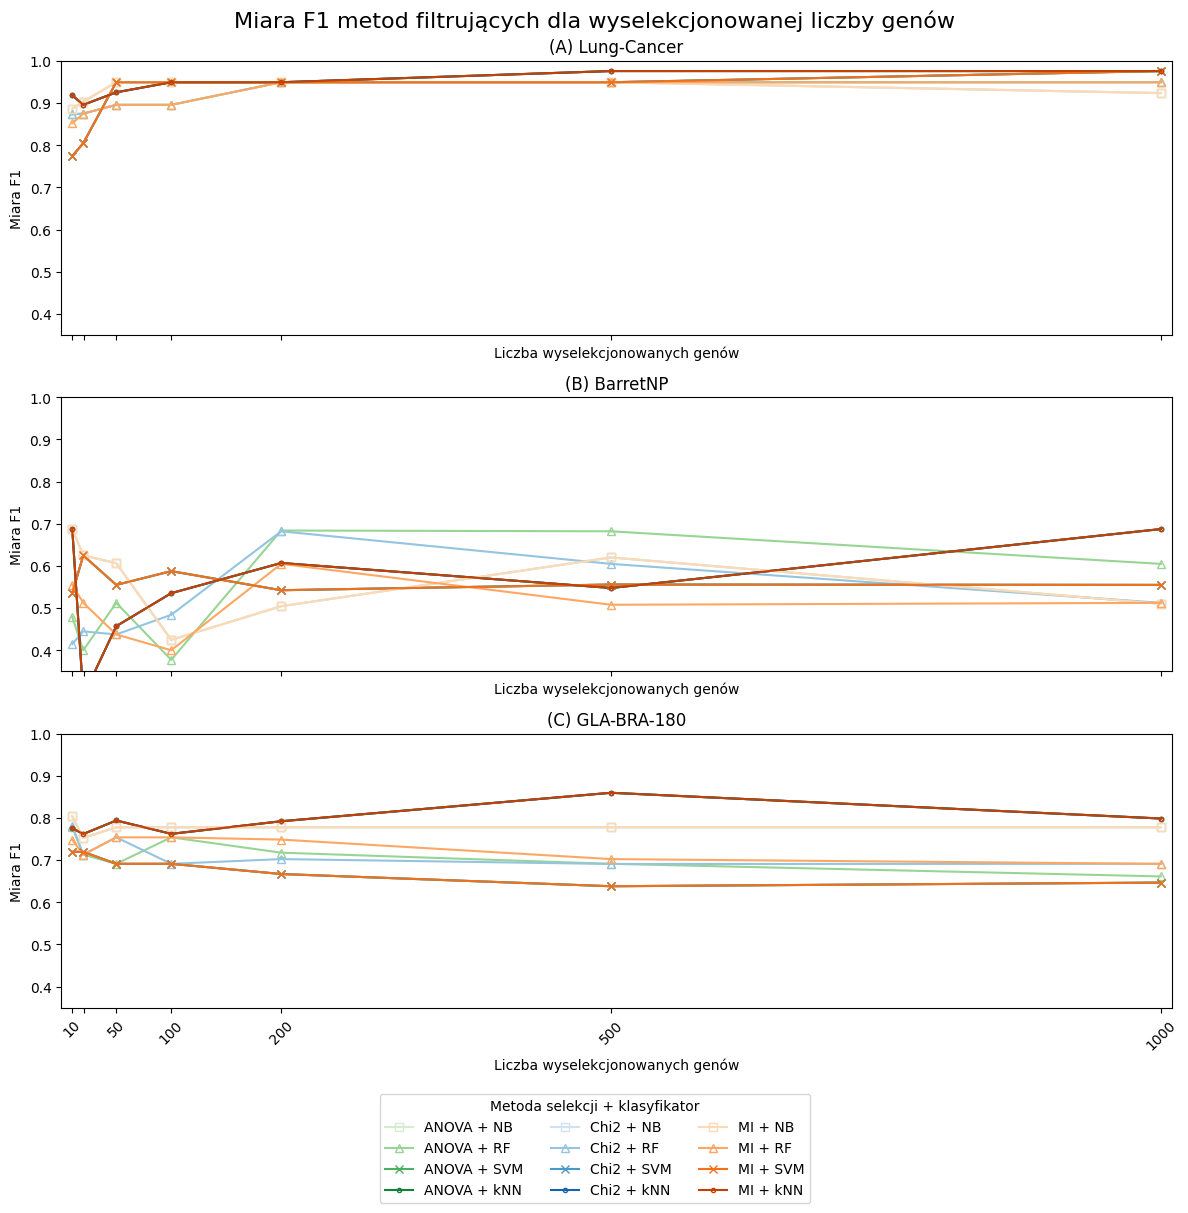

In [21]:
linesplot_results_No_selected_genes(filter_results_df, metrics_col='F-measure', metryka='Miara F1', metoda_fs='filtrujących')

C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\2377960939.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feature Selection method', y=data[metrics_col], data=subset, ax=ax, order=feature_methods_order, palette=custom_palette)
C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\2377960939.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feature Selection method', y=data[metrics_col], data=subset, ax=ax, order=feature_methods_order, palette=custom_palette)
C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\2377960939.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

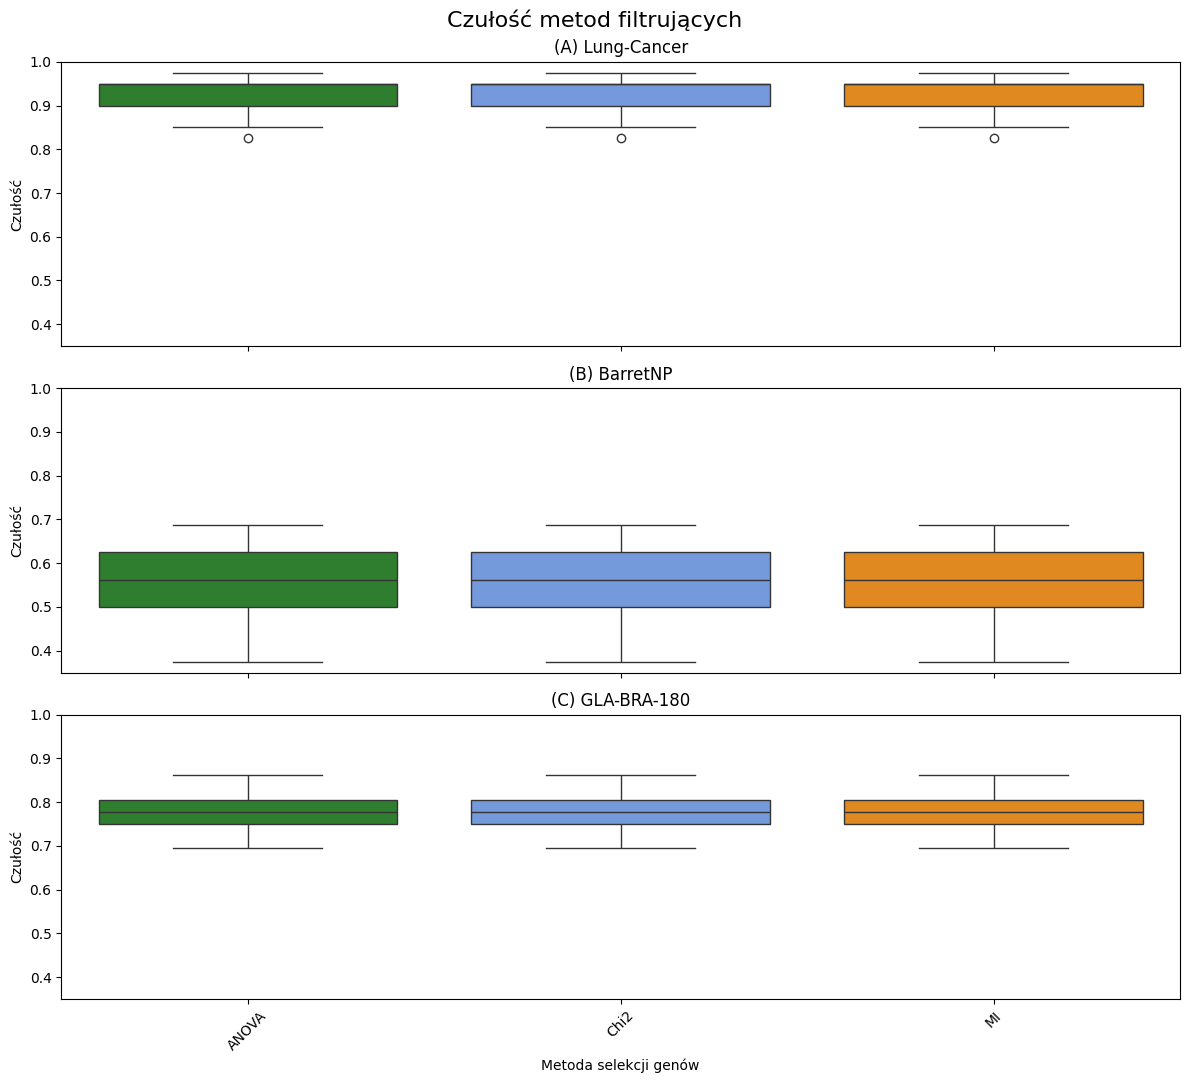

In [22]:
boxplot_results(filter_results_df, metrics_col='Sensitivity',metryka='Czułość', metoda_fs='filtrujących')
# Accuracy	Precision	Sensitivity	F-measure

### wrappers

#### GA

In [437]:
wrapper_GA_results_df1 = pd.read_csv('outputs/results_splitted_wrapper_GA-11_28_2023.csv')

In [438]:
wrapper_GA_results_df1

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. iterations,Accuracy,Precision,Sensitivity,F-measure
0,Wrapper approach,df_normalized_CLL_SUB_111,Genetic Algorithm,kNN,11341,5721,1000,0.695652,0.695652,0.695652,0.695652
1,Wrapper approach,df_normalized_CLL_SUB_111,Genetic Algorithm,Naive Bayes,11341,5721,1000,0.695652,0.695652,0.695652,0.695652
2,Wrapper approach,df_normalized_CLL_SUB_111,Genetic Algorithm,Random Forest,11341,5721,1000,0.869565,0.869565,0.869565,0.869565
3,Wrapper approach,df_normalized_CLL_SUB_111,Genetic Algorithm,SVM,11341,5721,1000,0.739130,0.739130,0.739130,0.739130
4,Wrapper approach,df_normalized_CLL_SUB_111,Genetic Algorithm,kNN,11341,5580,100,0.695652,0.695652,0.695652,0.695652
...,...,...,...,...,...,...,...,...,...,...,...
139,Wrapper approach,df_normalized_TOX_171,Genetic Algorithm,SVM,5749,2910,500,0.914286,0.914286,0.914286,0.914286
140,Wrapper approach,df_normalized_TOX_171,Genetic Algorithm,kNN,5749,2913,50,0.800000,0.800000,0.800000,0.800000
141,Wrapper approach,df_normalized_TOX_171,Genetic Algorithm,Naive Bayes,5749,2913,50,0.771429,0.771429,0.771429,0.771429
142,Wrapper approach,df_normalized_TOX_171,Genetic Algorithm,Random Forest,5749,2913,50,0.771429,0.771429,0.771429,0.771429


In [439]:
dict_fs = {'Genetic Algorithm' : 'GA'}

wrapper_GA_results_df1 = wrapper_GA_results_df1.replace({'Feature Selection method' : dict_fs})

dict_classif = {'Naive Bayes' : 'NB', 
                'Random Forest' : 'RF'}

wrapper_GA_results_df1 = wrapper_GA_results_df1.replace({'Classification method' : dict_classif})

dict = {'df_normalized_lung_cancer' : 'Lung-Cancer', 
        'df_normalized_SRBCT' : 'SRBCT', 
        'df_normalized_NablonekPlaski' : 'BarretNP', 
        'df_normalized_TOX_171' : 'TOX-171', 
        'df_normalized_GLA_BRA_180' : 'GLA-BRA-180', 
        'df_normalized_CLL_SUB_111' : 'CLL-SUB-111'}

wrapper_GA_results_df1 = wrapper_GA_results_df1.replace({'Dataset' : dict})

wrapper_GA_results_df1['Method'] = wrapper_GA_results_df1['Feature Selection method'] + ' + ' + wrapper_GA_results_df1['Classification method']

wrapper_GA_results_df1['Dataset'] = pd.Categorical(wrapper_GA_results_df1['Dataset'], ['Lung-Cancer', 'SRBCT', 'BarretNP', 'TOX-171', 'GLA-BRA-180', 'CLL-SUB-111'])

In [446]:
wrapper_GA_results_df1

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. iterations,Accuracy,Precision,Sensitivity,F-measure
0,GA + kNN,CLL-SUB-111,GA,kNN,11341,5721,1000,0.695652,0.695652,0.695652,0.695652
1,GA + NB,CLL-SUB-111,GA,NB,11341,5721,1000,0.695652,0.695652,0.695652,0.695652
2,GA + RF,CLL-SUB-111,GA,RF,11341,5721,1000,0.869565,0.869565,0.869565,0.869565
3,GA + SVM,CLL-SUB-111,GA,SVM,11341,5721,1000,0.739130,0.739130,0.739130,0.739130
4,GA + kNN,CLL-SUB-111,GA,kNN,11341,5580,100,0.695652,0.695652,0.695652,0.695652
...,...,...,...,...,...,...,...,...,...,...,...
139,GA + SVM,TOX-171,GA,SVM,5749,2910,500,0.914286,0.914286,0.914286,0.914286
140,GA + kNN,TOX-171,GA,kNN,5749,2913,50,0.800000,0.800000,0.800000,0.800000
141,GA + NB,TOX-171,GA,NB,5749,2913,50,0.771429,0.771429,0.771429,0.771429
142,GA + RF,TOX-171,GA,RF,5749,2913,50,0.771429,0.771429,0.771429,0.771429


In [449]:
wrapper_GA_results_df1 = wrapper_GA_results_df1.sort_values(by=['Dataset'])

In [593]:
wrapper_GA_results_df1.head()

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. iterations,Accuracy,Precision,Sensitivity,F-measure
71,GA + SVM,Lung-Cancer,GA,SVM,12601,6358,50,0.975610,0.975610,0.975610,0.975610
48,GA + kNN,Lung-Cancer,GA,kNN,12601,6311,1000,0.902439,0.902439,0.902439,0.902439
49,GA + NB,Lung-Cancer,GA,NB,12601,6311,1000,0.853659,0.853659,0.853659,0.853659
50,GA + RF,Lung-Cancer,GA,RF,12601,6311,1000,0.878049,0.878049,0.878049,0.878049
51,GA + SVM,Lung-Cancer,GA,SVM,12601,6311,1000,0.975610,0.975610,0.975610,0.975610


In [626]:
max_accuracy_row = wrapper_GA_results_df1[wrapper_GA_results_df1['Dataset'] == 'CLL-SUB-111']
max_accuracy_row = max_accuracy_row[max_accuracy_row['Accuracy'] == max_accuracy_row['Accuracy'].max()]
max_accuracy_row

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. iterations,Accuracy,Precision,Sensitivity,F-measure
2,GA + RF,CLL-SUB-111,GA,RF,11341,5721,1000,0.869565,0.869565,0.869565,0.869565


In [46]:
def linesplot_results(data, metric='Accuracy_mean', group_var='No. selected genes', group_var_name='genów', metoda_fs='lasu losowego', legend_cols=3):

    colors_hue = 4
    green_palette = sns.color_palette("Greens", n_colors=colors_hue)
    blue_palette = sns.color_palette("Blues", n_colors=colors_hue)
    red_palette = sns.color_palette("Oranges", n_colors=colors_hue)

    combined_palette = green_palette + blue_palette + red_palette

    markers = ['s', '^', 'x', '.']

    datasets = data['Dataset'].unique()
    num_datasets = len(datasets)

    fig, axes = plt.subplots(nrows=int(num_datasets), ncols=1, figsize=(12, 11), sharex=True)

    axes = axes.flatten()

    for idx, dataset in enumerate(datasets):
        ax = axes[idx]
        dataset_df = data[data['Dataset'] == dataset]

        dataset_df = dataset_df.sort_values(by=['Method', group_var])

        methods = dataset_df['Method'].unique()

        for i, (method, group) in enumerate(dataset_df.groupby('Method')):
            color = combined_palette[i % len(combined_palette)] 
            marker = markers[i % len(markers)]
            ax.plot(group[group_var], group[metric], marker=marker, markerfacecolor='none', label=method, color=color)

        label = f'({chr(ord("A") + idx)})'

        ax.set_title(f'{label} {dataset}')
        ax.set_xlabel('Liczba ' + str(group_var_name))
        ax.set_ylabel('Dokładność')
        ax.set_ylim(0.35, 1.0)

        if group_var_name == 'genów':
            ax.set_xticks([10, 20, 50, 100, 200, 500, 1000])
            ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000])
        elif group_var_name == 'drzew':
            ax.set_xticks([10, 20, 50, 100, 200, 500, 1000, 2000])
            ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000, 2000])
        elif group_var_name == 'lambda':
            ax.set_xticks([1.e-15, 1.e-10, 1.e-08, 1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00, 1.e+01, 2.e+01])
            ax.set_xticklabels([1.e-15, 1.e-10, 1.e-08, 1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00, 1.e+01, 2.e+01])
        elif group_var_name == 'iteracji':
            ax.set_xticks([50, 100, 200, 500, 1000, 2000])
            ax.set_xticklabels([50, 100, 200, 500, 1000, 2000])

        xticks_positions = ax.get_xticks()
        xticks_positions[1] += 1.1

        if group_var_name == 'genów':
            pass
        elif group_var_name == 'drzew':
            xticks_positions[2] += 1.1
        elif group_var_name == 'iteracji':
            xticks_positions[2] += 1.1        
        elif group_var_name == 'lambda':
            xticks_positions[2] += 1.1
            xticks_positions[3] += 1.1
            xticks_positions[4] += 1.1
            xticks_positions[5] += 1.1
            
        ax.set_xticks(xticks_positions)
        ax.tick_params(axis='x', rotation=45)

        handles, labels = ax.get_legend_handles_labels()

    fig.legend(handles, labels, title='Metoda selekcji + klasyfikator', loc='upper center', bbox_to_anchor=(0.5, 0), ncol=legend_cols)

    if group_var_name == 'drzew':
        plt.suptitle('Dokładność metody ' + str(metoda_fs) + ' dla określonej liczby ' + str(group_var_name), fontsize=16)
    elif group_var_name == 'lambda':
        plt.suptitle('Dokładność metody ' + str(metoda_fs) + ' dla określonej wartości ' + str(group_var_name), fontsize=16)
    elif group_var_name == 'iteracji':
        plt.suptitle('Dokładność metody ' + str(metoda_fs) + ' dla określonej liczby ' + str(group_var_name), fontsize=16)
    else:
        plt.suptitle('Dokładność metody ' + str(metoda_fs) + ' dla wyselekcjonowanej liczby ' + str(group_var_name), fontsize=16)

    # plt.suptitle('Dokładność metod ' + str(metoda_fs) + ' dla określonej liczby ' + str(group_var_name), fontsize=16)
    plt.tight_layout()
    plt.show()

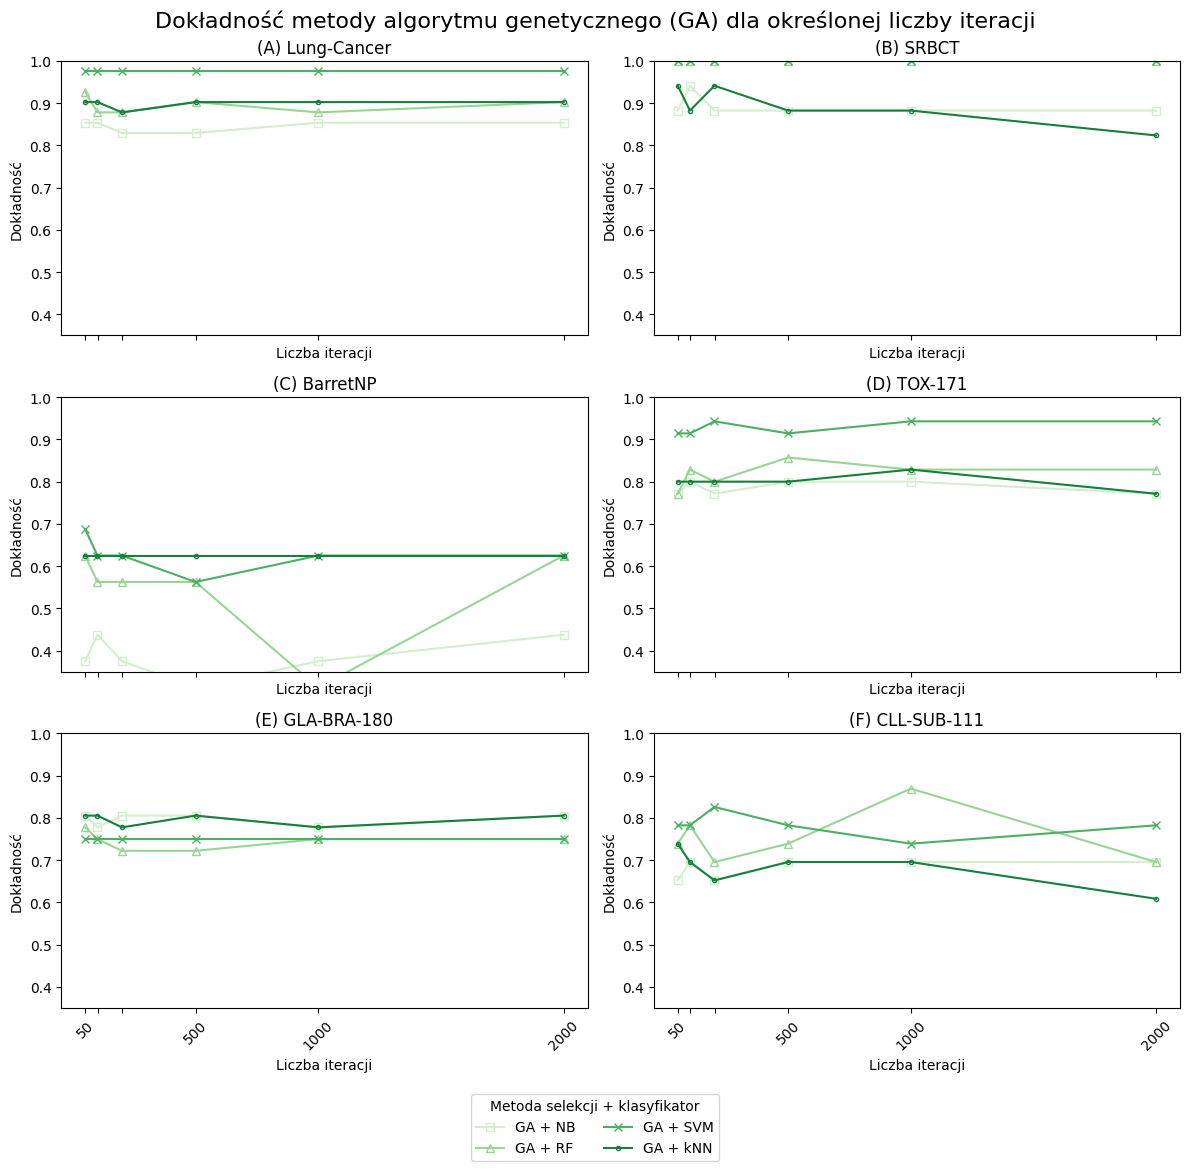

In [652]:

linesplot_results(wrapper_GA_results_df1, metric='Accuracy', group_var='No. iterations', group_var_name='iteracji', metoda_fs='algorytmu genetycznego (GA)', legend_cols=2)
# linesplot_results(wrapper_GA_results_df1, group_var='No. iterations', group_var_name='iteracji', metoda_fs='GA', legend_cols = 2)

#### ABC

In [629]:
wrapper_ABC_results_df1 = pd.read_csv('outputs/results_splitted_wrapper_ABC-12_18_2023-WUT.csv')

In [631]:
wrapper_ABC_results_df1.head()

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. iterations,No. particles,Accuracy,Precision,Sensitivity,F-measure
0,Wrapper approach,df_normalized_CLL_SUB_111,Artificial Bee Colony,kNN,11341,25,1000,1000,0.434783,0.434783,0.434783,0.434783
1,Wrapper approach,df_normalized_CLL_SUB_111,Artificial Bee Colony,Naive Bayes,11341,25,1000,1000,0.695652,0.695652,0.695652,0.695652
2,Wrapper approach,df_normalized_CLL_SUB_111,Artificial Bee Colony,Random Forest,11341,25,1000,1000,0.608696,0.608696,0.608696,0.608696
3,Wrapper approach,df_normalized_CLL_SUB_111,Artificial Bee Colony,SVM,11341,25,1000,1000,0.347826,0.347826,0.347826,0.347826
4,Wrapper approach,df_normalized_CLL_SUB_111,Artificial Bee Colony,kNN,11341,452,100,1000,0.434783,0.434783,0.434783,0.434783


In [632]:
dict_fs = {'Artificial Bee Colony' : 'ABC'}

wrapper_ABC_results_df1 = wrapper_ABC_results_df1.replace({'Feature Selection method' : dict_fs})

dict_classif = {'Naive Bayes' : 'NB', 
                'Random Forest' : 'RF'}

wrapper_ABC_results_df1 = wrapper_ABC_results_df1.replace({'Classification method' : dict_classif})

dict = {'df_normalized_lung_cancer' : 'Lung-Cancer', 
        'df_normalized_SRBCT' : 'SRBCT', 
        'df_normalized_NablonekPlaski' : 'BarretNP', 
        'df_normalized_TOX_171' : 'TOX-171', 
        'df_normalized_GLA_BRA_180' : 'GLA-BRA-180', 
        'df_normalized_CLL_SUB_111' : 'CLL-SUB-111'}

wrapper_ABC_results_df1 = wrapper_ABC_results_df1.replace({'Dataset' : dict})

wrapper_ABC_results_df1['Method'] = wrapper_ABC_results_df1['Feature Selection method'] + ' + ' + wrapper_ABC_results_df1['Classification method']

wrapper_ABC_results_df1['Dataset'] = pd.Categorical(wrapper_ABC_results_df1['Dataset'], ['Lung-Cancer', 'SRBCT', 'BarretNP', 'TOX-171', 'GLA-BRA-180', 'CLL-SUB-111'])

In [633]:
wrapper_ABC_results_df1.head()

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. iterations,No. particles,Accuracy,Precision,Sensitivity,F-measure
0,ABC + kNN,CLL-SUB-111,ABC,kNN,11341,25,1000,1000,0.434783,0.434783,0.434783,0.434783
1,ABC + NB,CLL-SUB-111,ABC,NB,11341,25,1000,1000,0.695652,0.695652,0.695652,0.695652
2,ABC + RF,CLL-SUB-111,ABC,RF,11341,25,1000,1000,0.608696,0.608696,0.608696,0.608696
3,ABC + SVM,CLL-SUB-111,ABC,SVM,11341,25,1000,1000,0.347826,0.347826,0.347826,0.347826
4,ABC + kNN,CLL-SUB-111,ABC,kNN,11341,452,100,1000,0.434783,0.434783,0.434783,0.434783


In [640]:
wrapper_ABC_results_df1 = wrapper_ABC_results_df1.sort_values(by=['Dataset', 'No. iterations', 'No. particles'])


In [642]:
wrapper_ABC_results_df1.head()

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. iterations,No. particles,Accuracy,Precision,Sensitivity,F-measure
391,ABC + SVM,Lung-Cancer,ABC,SVM,12601,7927,50,10,0.975610,0.975610,0.975610,0.975610
390,ABC + RF,Lung-Cancer,ABC,RF,12601,7927,50,10,0.902439,0.902439,0.902439,0.902439
389,ABC + NB,Lung-Cancer,ABC,NB,12601,7927,50,10,0.853659,0.853659,0.853659,0.853659
388,ABC + kNN,Lung-Cancer,ABC,kNN,12601,7927,50,10,0.902439,0.902439,0.902439,0.902439
452,ABC + kNN,Lung-Cancer,ABC,kNN,12601,2293,50,20,0.902439,0.902439,0.902439,0.902439


In [643]:
def prepare_df_by_groupby(dataset, groupby_var='No. iterations'):

    dataset_mean_acc = dataset.join(dataset.groupby(by=['Dataset', 'Feature Selection method', 'Classification method', groupby_var])['Accuracy'].mean(), on=['Dataset', 'Feature Selection method', 'Classification method', groupby_var], rsuffix='_mean')

    dataset_mean_acc = dataset_mean_acc.groupby(by=['Dataset', 'Feature Selection method', 'Classification method', groupby_var, 'Accuracy_mean'])[['Method', 'Dataset', 'Feature Selection method',
       'Classification method', groupby_var,
       'Accuracy', 'Accuracy_mean']].head(1)
    
    return dataset_mean_acc

In [662]:
def linesplot_results(data, metric='Accuracy_mean', group_var='No. selected genes', group_var_name='genów', metoda_fs='lasu losowego', legend_cols=3):

    colors_hue = 4
    green_palette = sns.color_palette("Greens", n_colors=colors_hue)
    blue_palette = sns.color_palette("Blues", n_colors=colors_hue)
    red_palette = sns.color_palette("Oranges", n_colors=colors_hue)

    combined_palette = green_palette + blue_palette + red_palette

    markers = ['s', '^', 'x', '.']

    datasets = data['Dataset'].unique()
    num_datasets = len(datasets)

    fig, axes = plt.subplots(nrows=int(num_datasets/2), ncols=2, figsize=(12, 11), sharex=True)

    axes = axes.flatten()

    for idx, dataset in enumerate(datasets):
        ax = axes[idx]
        dataset_df = data[data['Dataset'] == dataset]

        dataset_df = dataset_df.sort_values(by=['Method', group_var])

        methods = dataset_df['Method'].unique()

        for i, (method, group) in enumerate(dataset_df.groupby('Method')):
            color = combined_palette[i % len(combined_palette)] 
            marker = markers[i % len(markers)]
            ax.plot(group[group_var], group[metric], marker=marker, markerfacecolor='none', label=method, color=color)

        label = f'({chr(ord("A") + idx)})'

        ax.set_title(f'{label} {dataset}')
        if group_var_name == 'zainicjalizowanej populacji rozwiązań':
            ax.set_xlabel('Wielkość ' + str(group_var_name))
        else:
            ax.set_xlabel('Liczba ' + str(group_var_name))
        ax.set_ylabel('Dokładność')
        ax.set_ylim(0.35, 1.0)

        if group_var_name == 'genów':
            ax.set_xticks([10, 20, 50, 100, 200, 500, 1000])
            ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000])
        elif group_var_name == 'drzew':
            ax.set_xticks([10, 20, 50, 100, 200, 500, 1000, 2000])
            ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000, 2000])
        elif group_var_name == 'lambda':
            ax.set_xticks([1.e-15, 1.e-10, 1.e-08, 1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00, 1.e+01, 2.e+01])
            ax.set_xticklabels([1.e-15, 1.e-10, 1.e-08, 1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00, 1.e+01, 2.e+01])
        elif group_var_name == 'iteracji':
            ax.set_xticks([50, 100, 200, 500, 1000, 2000])
            ax.set_xticklabels([50, 100, 200, 500, 1000, 2000])
        elif group_var_name == 'zainicjalizowanej populacji rozwiązań':
            ax.set_xticks([10, 20, 50, 100, 200, 500, 1000, 2000])
            ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000, 2000])

        xticks_positions = ax.get_xticks()
        xticks_positions[1] += 1.1

        if group_var_name == 'genów':
            pass
        elif group_var_name == 'drzew':
            xticks_positions[2] += 1.1
        elif group_var_name == 'zainicjalizowanej populacji rozwiązań':
            xticks_positions[2] += 1.1
        elif group_var_name == 'iteracji':
            xticks_positions[2] += 1.1        
        elif group_var_name == 'lambda':
            xticks_positions[2] += 1.1
            xticks_positions[3] += 1.1
            xticks_positions[4] += 1.1
            xticks_positions[5] += 1.1
            
        ax.set_xticks(xticks_positions)
        ax.tick_params(axis='x', rotation=45)

        handles, labels = ax.get_legend_handles_labels()

    fig.legend(handles, labels, title='Metoda selekcji + klasyfikator', loc='upper center', bbox_to_anchor=(0.5, 0), ncol=legend_cols)

    if group_var_name == 'drzew':
        plt.suptitle('Dokładność metody ' + str(metoda_fs) + ' dla określonej liczby ' + str(group_var_name), fontsize=16)
    elif group_var_name == 'lambda':
        plt.suptitle('Dokładność metody ' + str(metoda_fs) + ' dla określonej wartości ' + str(group_var_name), fontsize=16)
    elif group_var_name == 'iteracji':
        plt.suptitle('Dokładność metody ' + str(metoda_fs) + ' dla określonej liczby ' + str(group_var_name), fontsize=16)
    elif group_var_name == 'zainicjalizowanej populacji rozwiązań':
        plt.suptitle('Dokładność metody ' + str(metoda_fs) + '\ndla określonej wielkości ' + str(group_var_name), fontsize=16)
    else:
        plt.suptitle('Dokładność metody ' + str(metoda_fs) + ' dla wyselekcjonowanej liczby ' + str(group_var_name), fontsize=16)

    # plt.suptitle('Dokładność metod ' + str(metoda_fs) + ' dla określonej liczby ' + str(group_var_name), fontsize=16)
    plt.tight_layout()
    plt.show()

##### Iterations

In [645]:
dataset_mean_acc_ABC_iter = prepare_df_by_groupby(wrapper_ABC_results_df1, groupby_var='No. iterations')

In [647]:
dataset_mean_acc_ABC_iter.head()

,Method,Dataset,Feature Selection method,Classification method,No. iterations,Accuracy,Accuracy_mean
391,ABC + SVM,Lung-Cancer,ABC,SVM,50,0.975610,0.975610
390,ABC + RF,Lung-Cancer,ABC,RF,50,0.902439,0.905488
389,ABC + NB,Lung-Cancer,ABC,NB,50,0.853659,0.826220
388,ABC + kNN,Lung-Cancer,ABC,kNN,50,0.902439,0.902439
375,ABC + SVM,Lung-Cancer,ABC,SVM,100,0.975610,0.972561


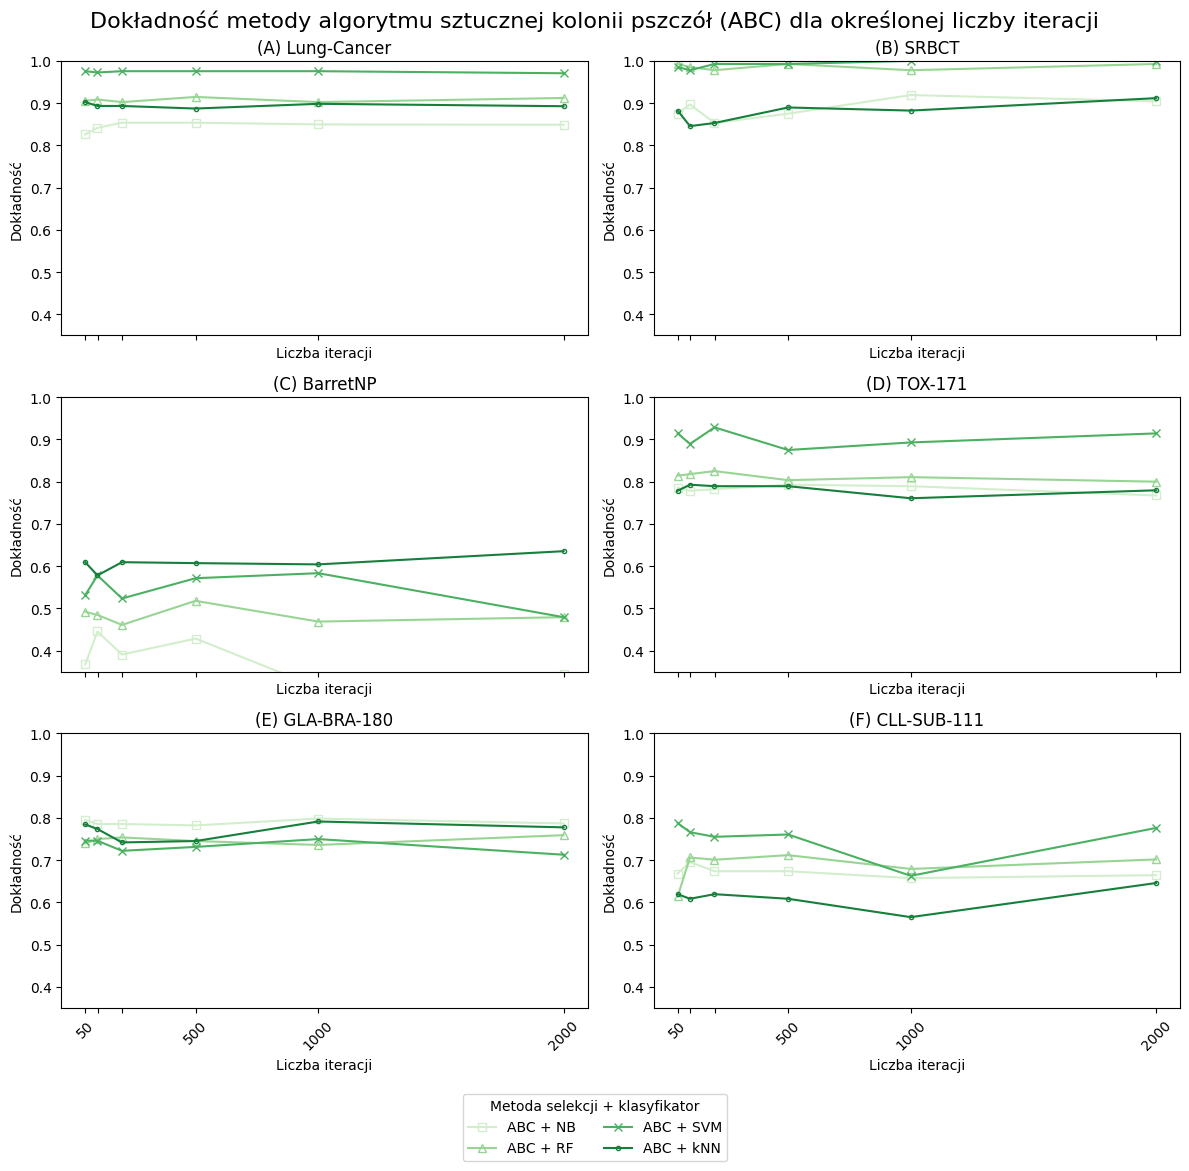

In [651]:
linesplot_results(dataset_mean_acc_ABC_iter, metric='Accuracy_mean', group_var='No. iterations', group_var_name='iteracji', metoda_fs='algorytmu sztucznej kolonii pszczół (ABC)', legend_cols=2)

##### Particles

In [653]:
dataset_mean_acc_ABC_particles = prepare_df_by_groupby(wrapper_ABC_results_df1, groupby_var='No. particles')	

In [654]:
dataset_mean_acc_ABC_particles.head()

,Method,Dataset,Feature Selection method,Classification method,No. particles,Accuracy,Accuracy_mean
391,ABC + SVM,Lung-Cancer,ABC,SVM,10,0.975610,0.975610
390,ABC + RF,Lung-Cancer,ABC,RF,10,0.902439,0.910569
389,ABC + NB,Lung-Cancer,ABC,NB,10,0.853659,0.849593
388,ABC + kNN,Lung-Cancer,ABC,kNN,10,0.902439,0.894309
452,ABC + kNN,Lung-Cancer,ABC,kNN,20,0.902439,0.898374


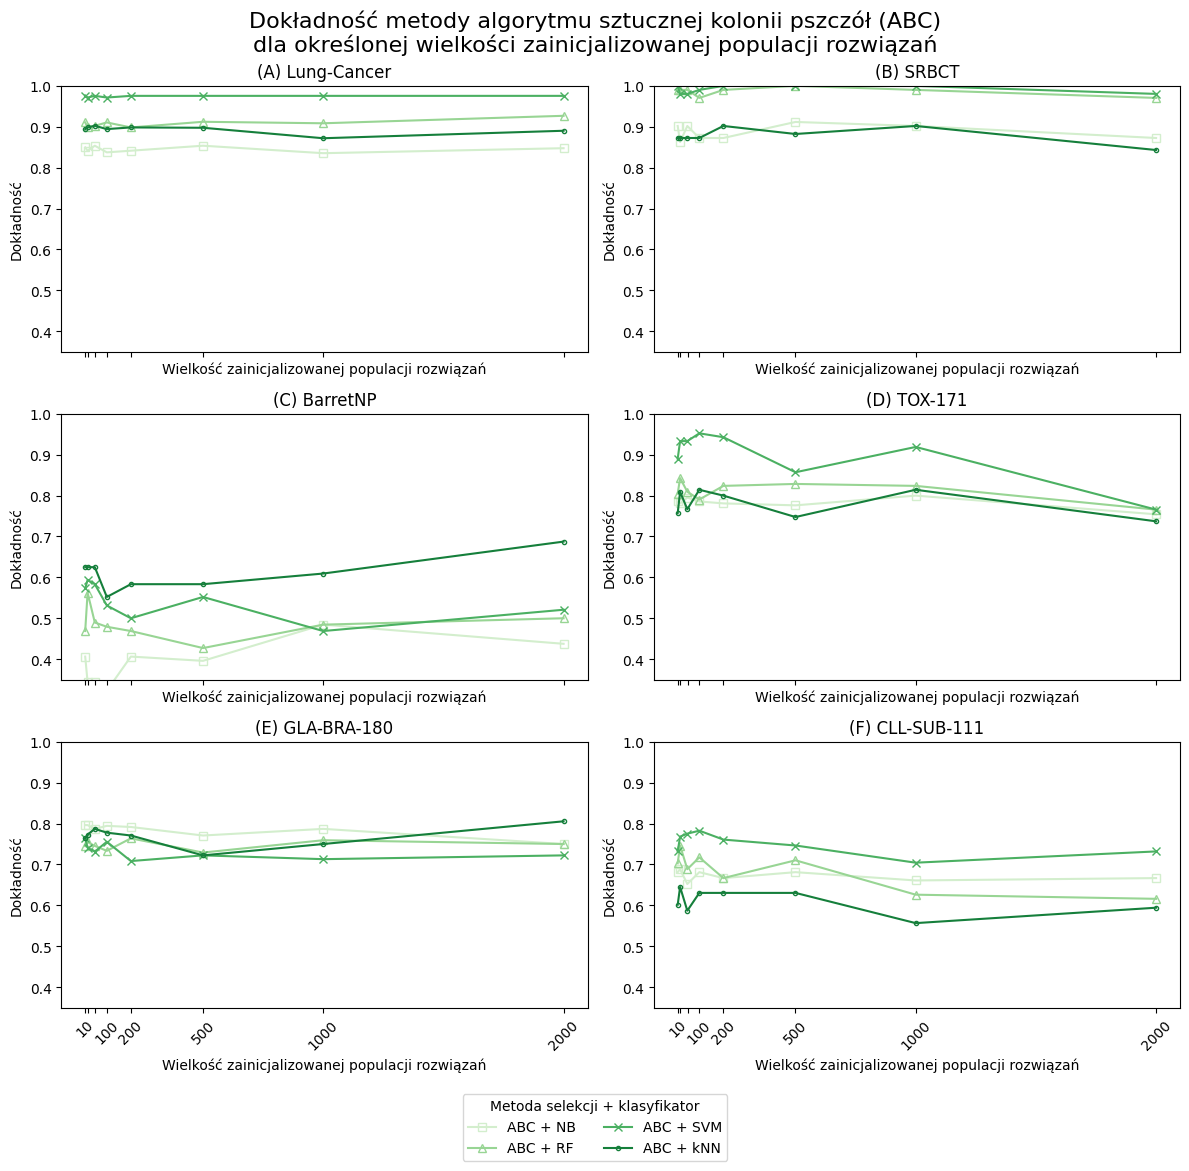

In [663]:

linesplot_results(dataset_mean_acc_ABC_particles, metric='Accuracy_mean', group_var='No. particles', group_var_name='zainicjalizowanej populacji rozwiązań', metoda_fs='algorytmu sztucznej kolonii pszczół (ABC)', legend_cols=2)

#### PSO

In [664]:
wrapper_PSO_results_df1 = pd.read_csv('outputs/results_splitted_wrapper_PSO-12_18_2023-WUT.csv')

In [665]:
wrapper_PSO_results_df1.head()

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. iterations,No. particles,Accuracy,Precision,Sensitivity,F-measure
0,Wrapper approach,df_normalized_CLL_SUB_111,Particle Swarm Optimization,kNN,11341,5717,1000,1000,0.608696,0.608696,0.608696,0.608696
1,Wrapper approach,df_normalized_CLL_SUB_111,Particle Swarm Optimization,Naive Bayes,11341,5717,1000,1000,0.695652,0.695652,0.695652,0.695652
2,Wrapper approach,df_normalized_CLL_SUB_111,Particle Swarm Optimization,Random Forest,11341,5717,1000,1000,0.782609,0.782609,0.782609,0.782609
3,Wrapper approach,df_normalized_CLL_SUB_111,Particle Swarm Optimization,SVM,11341,5717,1000,1000,0.739130,0.739130,0.739130,0.739130
4,Wrapper approach,df_normalized_CLL_SUB_111,Particle Swarm Optimization,kNN,11341,5762,100,1000,0.652174,0.652174,0.652174,0.652174


In [666]:
dict_fs = {'Particle Swarm Optimization' : 'PSO'}

wrapper_PSO_results_df1 = wrapper_PSO_results_df1.replace({'Feature Selection method' : dict_fs})

dict_classif = {'Naive Bayes' : 'NB', 
                'Random Forest' : 'RF'}

wrapper_PSO_results_df1 = wrapper_PSO_results_df1.replace({'Classification method' : dict_classif})

dict = {'df_normalized_lung_cancer' : 'Lung-Cancer', 
        'df_normalized_SRBCT' : 'SRBCT', 
        'df_normalized_NablonekPlaski' : 'BarretNP', 
        'df_normalized_TOX_171' : 'TOX-171', 
        'df_normalized_GLA_BRA_180' : 'GLA-BRA-180', 
        'df_normalized_CLL_SUB_111' : 'CLL-SUB-111'}

wrapper_PSO_results_df1 = wrapper_PSO_results_df1.replace({'Dataset' : dict})

wrapper_PSO_results_df1['Method'] = wrapper_PSO_results_df1['Feature Selection method'] + ' + ' + wrapper_PSO_results_df1['Classification method']

wrapper_PSO_results_df1['Dataset'] = pd.Categorical(wrapper_PSO_results_df1['Dataset'], ['Lung-Cancer', 'SRBCT', 'BarretNP', 'TOX-171', 'GLA-BRA-180', 'CLL-SUB-111'])

In [667]:
wrapper_PSO_results_df1.head()

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. iterations,No. particles,Accuracy,Precision,Sensitivity,F-measure
0,PSO + kNN,CLL-SUB-111,PSO,kNN,11341,5717,1000,1000,0.608696,0.608696,0.608696,0.608696
1,PSO + NB,CLL-SUB-111,PSO,NB,11341,5717,1000,1000,0.695652,0.695652,0.695652,0.695652
2,PSO + RF,CLL-SUB-111,PSO,RF,11341,5717,1000,1000,0.782609,0.782609,0.782609,0.782609
3,PSO + SVM,CLL-SUB-111,PSO,SVM,11341,5717,1000,1000,0.739130,0.739130,0.739130,0.739130
4,PSO + kNN,CLL-SUB-111,PSO,kNN,11341,5762,100,1000,0.652174,0.652174,0.652174,0.652174


In [668]:
wrapper_PSO_results_df1 = wrapper_PSO_results_df1.sort_values(by=['Dataset', 'No. iterations', 'No. particles'])


##### Iterations

In [669]:
dataset_mean_acc_PSO_iter = prepare_df_by_groupby(wrapper_PSO_results_df1, groupby_var='No. iterations')

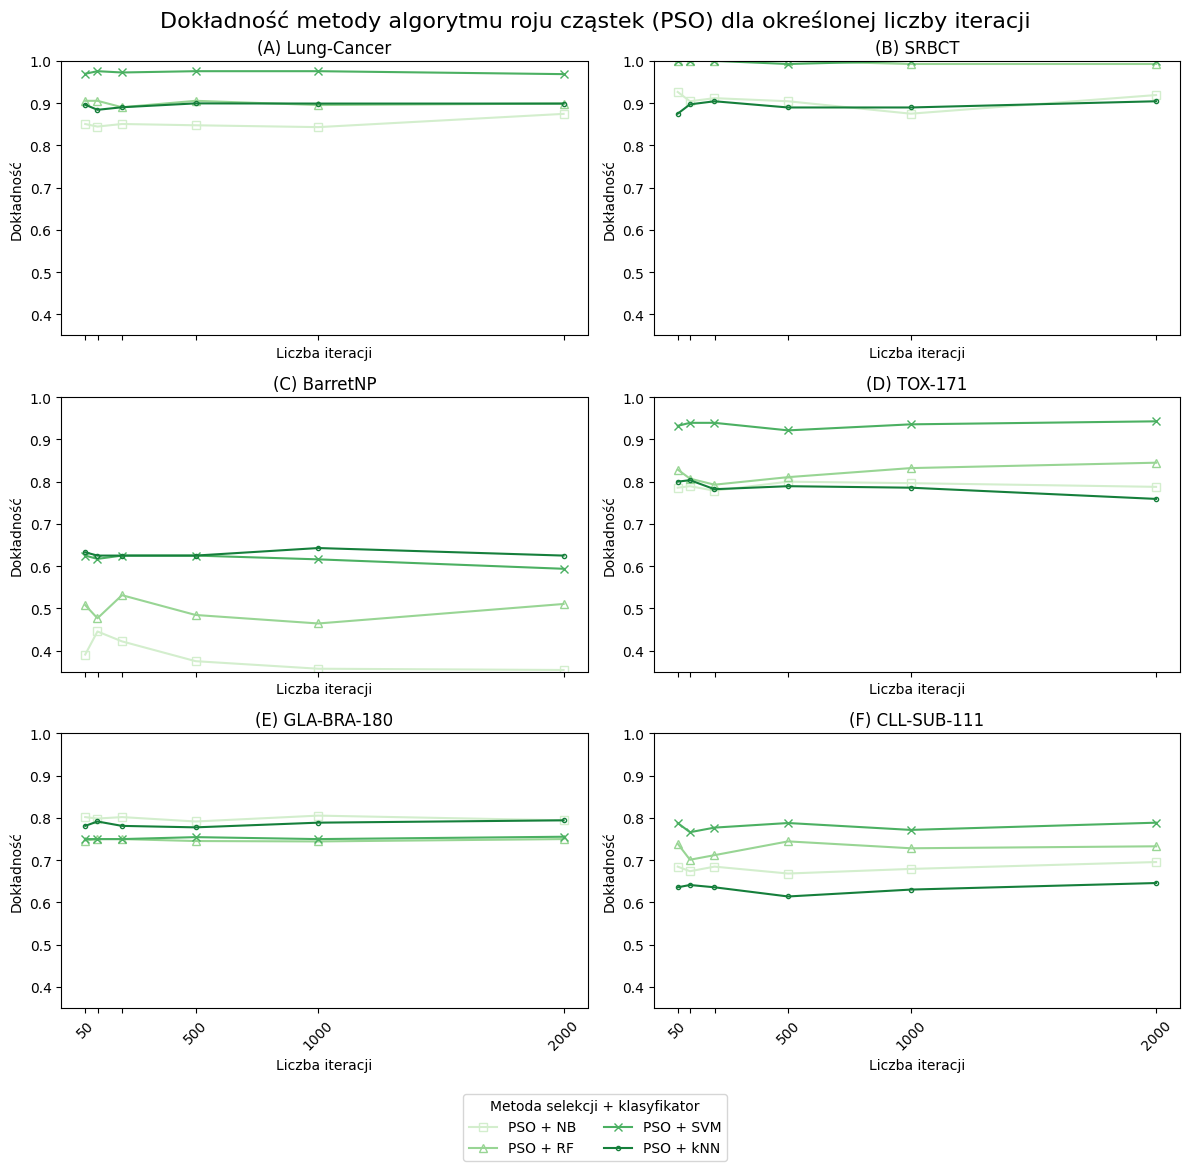

In [672]:
linesplot_results(dataset_mean_acc_PSO_iter, metric='Accuracy_mean', group_var='No. iterations', group_var_name='iteracji', metoda_fs='algorytmu roju cząstek (PSO)', legend_cols=2)

##### Particles

In [673]:
dataset_mean_acc_PSO_particles = prepare_df_by_groupby(wrapper_PSO_results_df1, groupby_var='No. particles')	

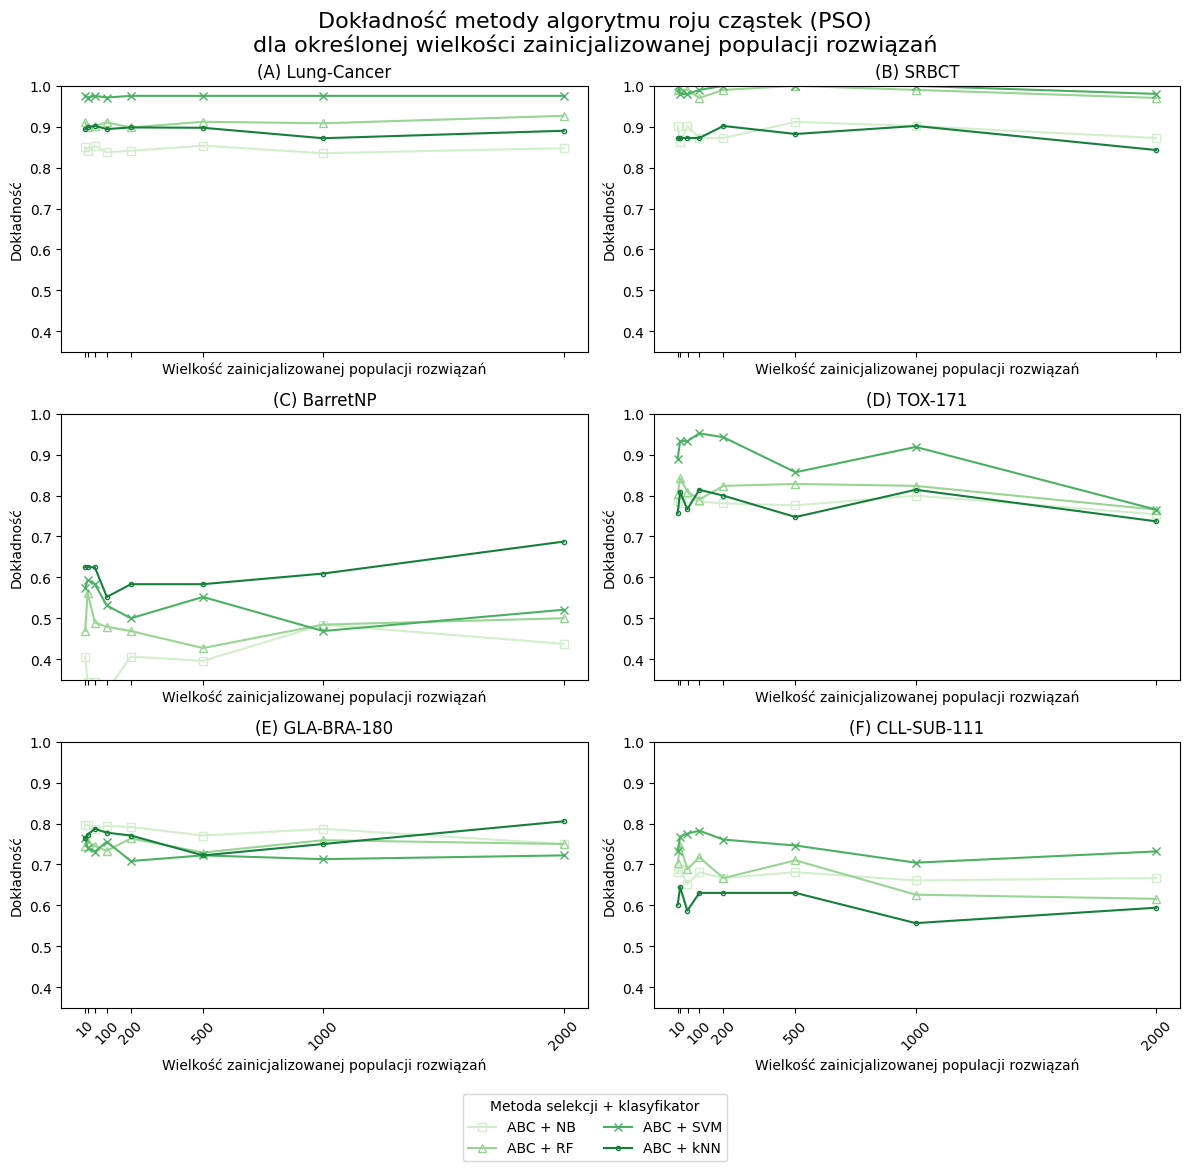

In [674]:

linesplot_results(dataset_mean_acc_ABC_particles, metric='Accuracy_mean', group_var='No. particles', group_var_name='zainicjalizowanej populacji rozwiązań', metoda_fs='algorytmu roju cząstek (PSO)', legend_cols=2)

### embedded

#### data processing 

In [293]:
embedded_results_df1 = pd.read_csv('outputs/results_splitted_embedded_RandomForest-weighted-metrics-01_04_2024.csv')
embedded_results_df2 = pd.read_csv('outputs/results_splitted_embedded_SVM-RFE-weighted_metrics-01_04_2024.csv')
embedded_results_df3 = pd.read_csv('outputs/results_splitted_embedded_Ridge-weighted_metrics-01_04_2024.csv')

embedded_results_df = pd.concat([embedded_results_df1, embedded_results_df2, embedded_results_df3])

In [294]:
dict_fs = {'Ridge regression' : 'Ridge', 
            'Random Forest' : 'RF'}

embedded_results_df = embedded_results_df.replace({'Feature Selection method' : dict_fs})

dict_classif = {'Naive Bayes' : 'NB', 
                'Random Forest' : 'RF'}

embedded_results_df = embedded_results_df.replace({'Classification method' : dict_classif})

dict = {'df_normalized_lung_cancer' : 'Lung-Cancer', 
        'df_normalized_SRBCT' : 'SRBCT', 
        'df_normalized_NablonekPlaski' : 'BarretNP', 
        'df_normalized_TOX_171' : 'TOX-171', 
        'df_normalized_GLA_BRA_180' : 'GLA-BRA-180', 
        'df_normalized_CLL_SUB_111' : 'CLL-SUB-111'}

embedded_results_df = embedded_results_df.replace({'Dataset' : dict})

embedded_results_df['Method'] = embedded_results_df['Feature Selection method'] + ' + ' + embedded_results_df['Classification method']

In [295]:
embedded_results_df_RF = embedded_results_df[embedded_results_df['Feature Selection method'] == 'RF']
embedded_results_df_SVM_RFE = embedded_results_df[embedded_results_df['Feature Selection method'] == 'SVM-RFE']
embedded_results_df_Ridge = embedded_results_df[embedded_results_df['Feature Selection method'] == 'Ridge']

In [44]:
max_accuracy_row = embedded_results_df_SVM_RFE[embedded_results_df_SVM_RFE['Dataset'] == 'GLA-BRA-180']
max_accuracy_row = max_accuracy_row[max_accuracy_row['F-measure'] == max_accuracy_row['F-measure'].max()]
max_accuracy_row

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. trees,Accuracy,Precision,Sensitivity,F-measure,Train set,Test set,Lambda
71,SVM-RFE + RF,GLA-BRA-180,SVM-RFE,RF,49152,100,NaN,0.777778,0.674951,0.777778,0.721861,144.0,36.0,NaN


In [30]:
embedded_results_df_Ridge[(embedded_results_df_Ridge['Dataset'] == 'BarretNP') & (embedded_results_df_Ridge['No. selected genes'] == 500)]

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. trees,Accuracy,Precision,Sensitivity,F-measure,Train set,Test set,Lambda
300,Ridge + NB,BarretNP,Ridge,NB,22278,500,NaN,0.4375,0.460938,0.4375,0.433120,NaN,NaN,1.000000e-15
301,Ridge + SVM,BarretNP,Ridge,SVM,22278,500,NaN,0.5000,0.473214,0.5000,0.478475,NaN,NaN,1.000000e-15
302,Ridge + kNN,BarretNP,Ridge,kNN,22278,500,NaN,0.6875,0.645833,0.6875,0.637987,NaN,NaN,1.000000e-15
303,Ridge + RF,BarretNP,Ridge,RF,22278,500,NaN,0.5000,0.505208,0.5000,0.486458,NaN,NaN,1.000000e-15
328,Ridge + NB,BarretNP,Ridge,NB,22278,500,NaN,0.4375,0.460938,0.4375,0.433120,NaN,NaN,1.000000e-10
329,Ridge + SVM,BarretNP,Ridge,SVM,22278,500,NaN,0.5000,0.473214,0.5000,0.478475,NaN,NaN,1.000000e-10
330,Ridge + kNN,BarretNP,Ridge,kNN,22278,500,NaN,0.6875,0.645833,0.6875,0.637987,NaN,NaN,1.000000e-10
331,Ridge + RF,BarretNP,Ridge,RF,22278,500,NaN,0.3750,0.306250,0.3750,0.326389,NaN,NaN,1.000000e-10
356,Ridge + NB,BarretNP,Ridge,NB,22278,500,NaN,0.4375,0.460938,0.4375,0.433120,NaN,NaN,1.000000e-08
357,Ridge + SVM,BarretNP,Ridge,SVM,22278,500,NaN,0.5000,0.473214,0.5000,0.478475,NaN,NaN,1.000000e-08


In [296]:
def prepare_df_by_groupby(dataset, groupby_var='No. selected genes'):

    dataset_mean_acc = dataset.join(dataset.groupby(by=['Dataset', 'Feature Selection method', 'Classification method', groupby_var])['Accuracy'].mean(), on=['Dataset', 'Feature Selection method', 'Classification method', groupby_var], rsuffix='_mean')

    dataset_mean_acc = dataset_mean_acc.groupby(by=['Dataset', 'Feature Selection method', 'Classification method', groupby_var, 'Accuracy_mean'])[['Method', 'Dataset', 'Feature Selection method',
       'Classification method', groupby_var,
       'Accuracy', 'Accuracy_mean']].head(1)
    
    dataset_mean_prec = dataset.join(dataset.groupby(by=['Dataset', 'Feature Selection method', 'Classification method', groupby_var])['Precision'].mean(), on=['Dataset', 'Feature Selection method', 'Classification method', groupby_var], rsuffix='_mean')

    dataset_mean_prec = dataset_mean_prec.groupby(by=['Dataset', 'Feature Selection method', 'Classification method', groupby_var, 'Precision_mean'])[['Method', 'Dataset', 'Feature Selection method',
       'Classification method', groupby_var,
       'Precision', 'Precision_mean']].head(1)
    
    dataset_mean_sens = dataset.join(dataset.groupby(by=['Dataset', 'Feature Selection method', 'Classification method', groupby_var])['Sensitivity'].mean(), on=['Dataset', 'Feature Selection method', 'Classification method', groupby_var], rsuffix='_mean')

    dataset_mean_sens = dataset_mean_sens.groupby(by=['Dataset', 'Feature Selection method', 'Classification method', groupby_var, 'Sensitivity_mean'])[['Method', 'Dataset', 'Feature Selection method',
       'Classification method', groupby_var,
       'Sensitivity', 'Sensitivity_mean']].head(1)
    
    dataset_mean_f1 = dataset.join(dataset.groupby(by=['Dataset', 'Feature Selection method', 'Classification method', groupby_var])['F-measure'].mean(), on=['Dataset', 'Feature Selection method', 'Classification method', groupby_var], rsuffix='_mean')

    dataset_mean_f1 = dataset_mean_f1.groupby(by=['Dataset', 'Feature Selection method', 'Classification method', groupby_var, 'F-measure_mean'])[['Method', 'Dataset', 'Feature Selection method',
       'Classification method', groupby_var,
       'F-measure', 'F-measure_mean']].head(1)
    
    return dataset_mean_acc, dataset_mean_prec, dataset_mean_sens, dataset_mean_f1

In [297]:
def linesplot_results(data, metric='Accuracy_mean', metryka='Dokładność', group_var='No. selected genes', group_var_name='genów', metoda_fs='lasu losowego', legend_cols=3):

    colors_hue = 4
    green_palette = sns.color_palette("Greens", n_colors=colors_hue)
    blue_palette = sns.color_palette("Blues", n_colors=colors_hue)
    red_palette = sns.color_palette("Oranges", n_colors=colors_hue)

    combined_palette = green_palette + blue_palette + red_palette

    markers = ['s', '^', 'x', '.']

    datasets = data['Dataset'].unique()
    num_datasets = len(datasets)

    fig, axes = plt.subplots(nrows=int(num_datasets), ncols=1, figsize=(12, 11), sharex=True)

    axes = axes.flatten()

    for idx, dataset in enumerate(datasets):
        ax = axes[idx]
        dataset_df = data[data['Dataset'] == dataset]

        dataset_df = dataset_df.sort_values(by=['Method', group_var])

        methods = dataset_df['Method'].unique()

        for i, (method, group) in enumerate(dataset_df.groupby('Method')):
            color = combined_palette[i % len(combined_palette)] 
            marker = markers[i % len(markers)]
            ax.plot(group[group_var], group[metric], marker=marker, markerfacecolor='none', label=method, color=color)

        label = f'({chr(ord("A") + idx)})'

        ax.set_title(f'{label} {dataset}')

        if group_var_name == 'lambda':
            ax.set_xlabel('Wartość ' + str(group_var_name))
        else: 
            ax.set_xlabel('Liczba ' + str(group_var_name))

        # ax.set_xlabel('Liczba ' + str(group_var_name))
        ax.set_ylabel(str(metryka))
        ax.set_ylim(0.35, 1.0)
        # ax.set_xlim(0, 1000)

        if group_var_name == 'genów':
            ax.set_xlim(0, 1010)
            ax.set_xticks([10, 20, 50, 100, 200, 500, 1000])
            ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000])
        elif group_var_name == 'drzew':
            ax.set_xlim(0, 2010)
            ax.set_xticks([10, 20, 50, 100, 200, 500, 1000, 2000])
            ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000, 2000])
        elif group_var_name == 'lambda':
            # ax.set_xlim(0, 21)
            ax.set_xscale('log')
            # ticks = [1.e-15, 1.e-10, 1.e-08, 1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00, 1.e+01, 2.e+01]
            # ax.set_xticks(ticks)
            # ax.set_xticklabels(["{:.0e}".format(t) for t in ticks])
            # 1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20
            ax.set_xticks([1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20])
            ax.set_xticklabels([1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20])
            # # ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

        xticks_positions = ax.get_xticks()
        # xticks_positions[1] += 1.1

        if group_var_name == 'genów':
            ax.set_xticks(xticks_positions)
        elif group_var_name == 'drzew':
            xticks_positions[2] += 1.1
            ax.set_xticks(xticks_positions)
        # elif group_var_name == 'lambda':
        #     xticks_positions[2] += 1.1
        #     xticks_positions[3] += 1.1
        #     xticks_positions[4] += 1.1
        #     xticks_positions[5] += 1.1
            
        # ax.set_xticks(xticks_positions)
        ax.tick_params(axis='x', rotation=45)

        handles, labels = ax.get_legend_handles_labels()

    fig.legend(handles, labels, title='Metoda selekcji + klasyfikator', loc='upper center', bbox_to_anchor=(0.5, 0), ncol=legend_cols)

    if group_var_name == 'drzew':
        plt.suptitle(str(metryka) + ' metody ' + str(metoda_fs) + ' dla określonej liczby ' + str(group_var_name), fontsize=16)
    elif group_var_name == 'lambda':
        plt.suptitle(str(metryka) + ' metody ' + str(metoda_fs) + ' dla określonej wartości ' + str(group_var_name), fontsize=16)
    else:
        plt.suptitle(str(metryka) + ' metody ' + str(metoda_fs) + ' dla wyselekcjonowanej liczby ' + str(group_var_name), fontsize=16)

    # plt.suptitle('Dokładność metod ' + str(metoda_fs) + ' dla określonej liczby ' + str(group_var_name), fontsize=16)
    plt.tight_layout()
    plt.show()

##### RF

In [298]:
embedded_results_df_RF.head()

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. trees,Accuracy,Precision,Sensitivity,F-measure,Train set,Test set,Lambda,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,RF + NB,Lung-Cancer,RF,NB,12601,10,10.0,0.775,0.790000,0.775,0.780159,NaN,NaN,NaN,NaN,NaN,NaN
1,RF + SVM,Lung-Cancer,RF,SVM,12601,10,10.0,0.700,0.490000,0.700,0.576471,NaN,NaN,NaN,NaN,NaN,NaN
2,RF + kNN,Lung-Cancer,RF,kNN,12601,10,10.0,0.725,0.710000,0.725,0.712644,NaN,NaN,NaN,NaN,NaN,NaN
3,RF + RF,Lung-Cancer,RF,RF,12601,10,10.0,0.800,0.793750,0.800,0.781667,NaN,NaN,NaN,NaN,NaN,NaN
4,RF + NB,Lung-Cancer,RF,NB,12601,20,10.0,0.825,0.830115,0.825,0.823559,NaN,NaN,NaN,NaN,NaN,NaN


###### No. trees

In [62]:
dataset_mean_acc_RF_trees, dataset_mean_prec_RF_trees, dataset_mean_sens_RF_trees, dataset_mean_f1_RF_trees = prepare_df_by_groupby(embedded_results_df_RF, groupby_var='No. trees')

In [63]:
dataset_mean_acc_RF_trees.head()

,Method,Dataset,Feature Selection method,Classification method,No. trees,Accuracy,Accuracy_mean
0,RF + NB,Lung-Cancer,RF,NB,10.0,0.775,0.853571
1,RF + SVM,Lung-Cancer,RF,SVM,10.0,0.700,0.846429
2,RF + kNN,Lung-Cancer,RF,kNN,10.0,0.725,0.871429
3,RF + RF,Lung-Cancer,RF,RF,10.0,0.800,0.864286
28,RF + NB,Lung-Cancer,RF,NB,20.0,0.875,0.878571


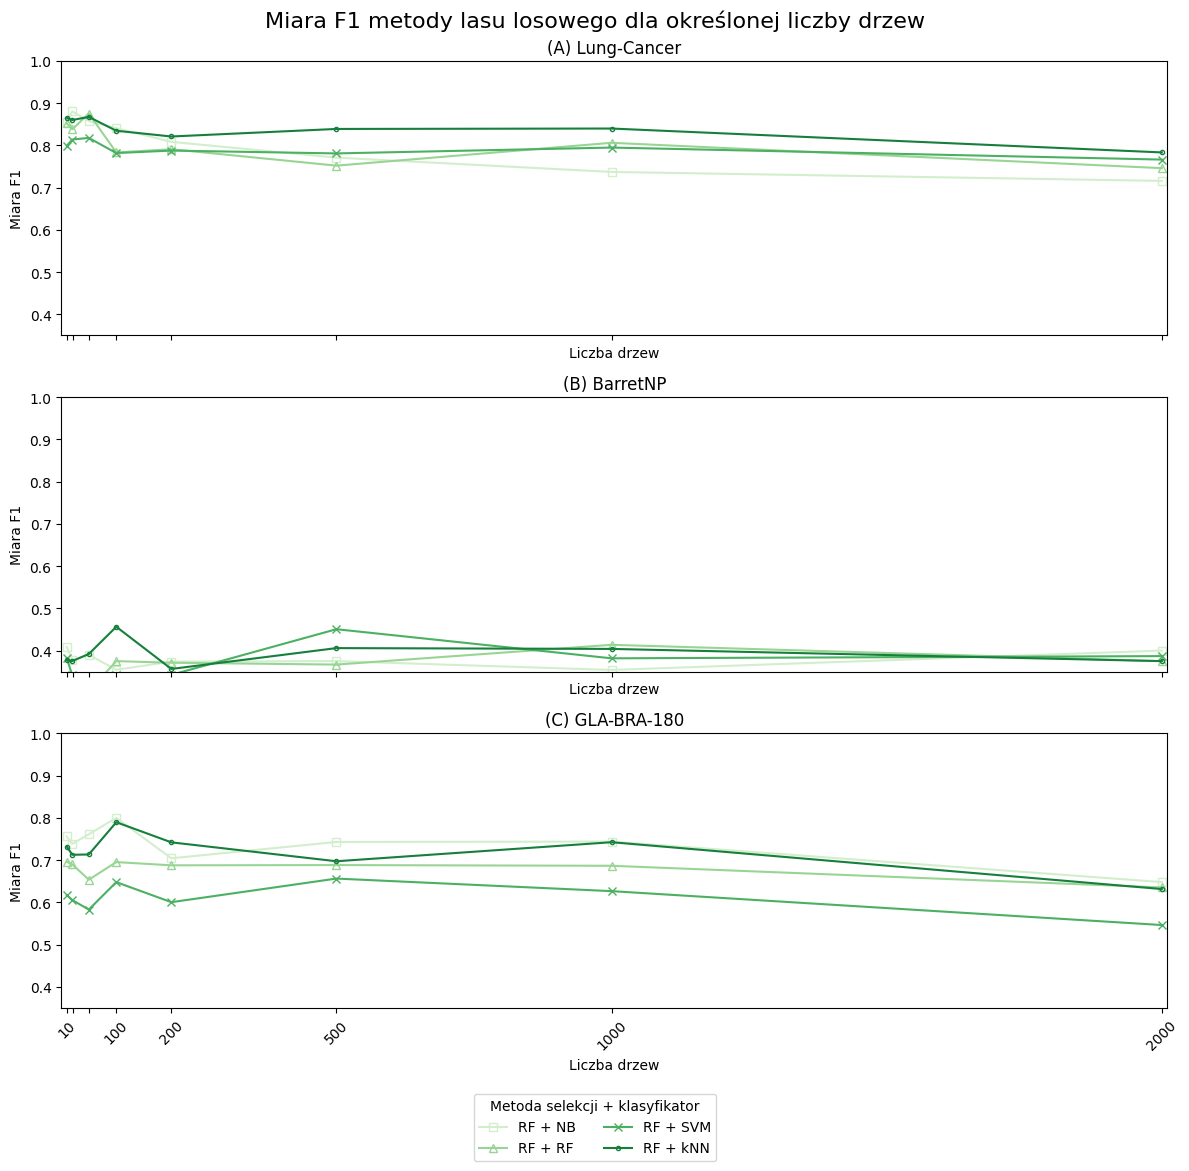

In [72]:
linesplot_results(dataset_mean_f1_RF_trees, metric='F-measure_mean', metryka='Miara F1', group_var='No. trees', group_var_name='drzew', metoda_fs='lasu losowego', legend_cols = 2)

###### No. selected genes

In [75]:
# dataset_mean_acc_RF_genes = prepare_df_by_groupby(embedded_results_df_RF, groupby_var='No. selected genes')
dataset_mean_acc_RF_genes, dataset_mean_prec_RF_genes, dataset_mean_sens_RF_genes, dataset_mean_f1_RF_genes = prepare_df_by_groupby(embedded_results_df_RF, groupby_var='No. selected genes')

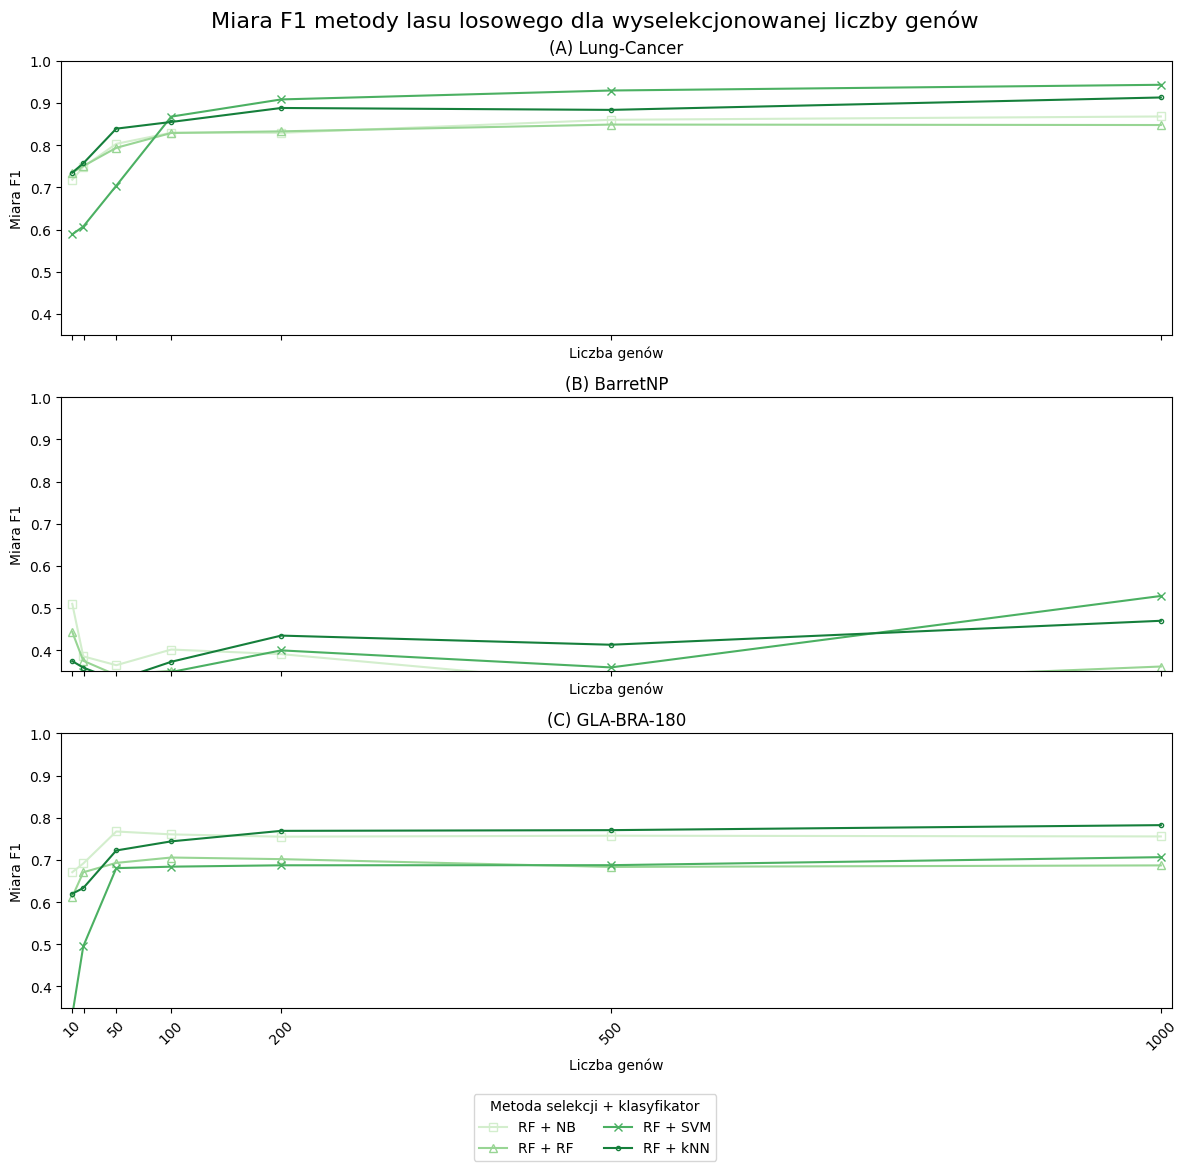

In [80]:
# linesplot_results(dataset_mean_acc_RF_genes, group_var='No. selected genes', group_var_name='genów', metoda_fs='lasu losowego', legend_cols = 2)
linesplot_results(dataset_mean_f1_RF_genes, metric='F-measure_mean', metryka='Miara F1', group_var='No. selected genes', group_var_name='genów', metoda_fs='lasu losowego', legend_cols = 2)

#### Ridge

In [81]:
# embedded_results_df_Ridge_lambda20 = embedded_results_df_Ridge[embedded_results_df_Ridge['Lambda'] == 2.000000e+01]
# embedded_results_df_Ridge = embedded_results_df_Ridge[embedded_results_df_Ridge['Lambda'] != 20]
embedded_results_df_Ridge

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. trees,Accuracy,Precision,Sensitivity,F-measure,Train set,Test set,Lambda
0,Ridge + NB,Lung-Cancer,Ridge,NB,12601,10,NaN,0.575000,0.660357,0.575000,0.593434,NaN,NaN,1.000000e-15
1,Ridge + SVM,Lung-Cancer,Ridge,SVM,12601,10,NaN,0.700000,0.490000,0.700000,0.576471,NaN,NaN,1.000000e-15
2,Ridge + kNN,Lung-Cancer,Ridge,kNN,12601,10,NaN,0.700000,0.547368,0.700000,0.606061,NaN,NaN,1.000000e-15
3,Ridge + RF,Lung-Cancer,Ridge,RF,12601,10,NaN,0.750000,0.768627,0.750000,0.722335,NaN,NaN,1.000000e-15
4,Ridge + NB,Lung-Cancer,Ridge,NB,12601,20,NaN,0.550000,0.685042,0.550000,0.574776,NaN,NaN,1.000000e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Ridge + RF,GLA-BRA-180,Ridge,RF,49152,500,NaN,0.750000,0.648589,0.750000,0.690789,NaN,NaN,2.000000e+01
836,Ridge + NB,GLA-BRA-180,Ridge,NB,49152,1000,NaN,0.777778,0.671597,0.777778,0.719538,NaN,NaN,2.000000e+01
837,Ridge + SVM,GLA-BRA-180,Ridge,SVM,49152,1000,NaN,0.750000,0.644528,0.750000,0.691138,NaN,NaN,2.000000e+01
838,Ridge + kNN,GLA-BRA-180,Ridge,kNN,49152,1000,NaN,0.750000,0.773914,0.750000,0.741358,NaN,NaN,2.000000e+01


##### Lambda

In [82]:
# dataset_mean_acc_Ridge_lambda = prepare_df_by_groupby(embedded_results_df_Ridge, groupby_var='Lambda')

dataset_mean_acc_Ridge_lambda, dataset_mean_prec_Ridge_lambda, dataset_mean_sens_Ridge_lambda, dataset_mean_f1_Ridge_lambda = prepare_df_by_groupby(embedded_results_df_Ridge, groupby_var='Lambda')

In [104]:
dataset_mean_f1_Ridge_lambda.head()

,Method,Dataset,Feature Selection method,Classification method,Lambda,F-measure,F-measure_mean
0,Ridge + NB,Lung-Cancer,Ridge,NB,1.000000e-15,0.593434,0.693425
1,Ridge + SVM,Lung-Cancer,Ridge,SVM,1.000000e-15,0.576471,0.726820
2,Ridge + kNN,Lung-Cancer,Ridge,kNN,1.000000e-15,0.606061,0.704584
3,Ridge + RF,Lung-Cancer,Ridge,RF,1.000000e-15,0.722335,0.742845
28,Ridge + NB,Lung-Cancer,Ridge,NB,1.000000e-10,0.593434,0.693425


In [172]:
dataset_mean_f1_Ridge_lambda[dataset_mean_f1_Ridge_lambda['Dataset'] == 'Lung-Cancer'].sort_values(by='F-measure', ascending=False).head()

,Method,Dataset,Feature Selection method,Classification method,Lambda,F-measure,F-measure_mean
171,Ridge + RF,Lung-Cancer,Ridge,RF,1.000000e+00,0.740000,0.743932
31,Ridge + RF,Lung-Cancer,Ridge,RF,1.000000e-10,0.722335,0.761918
3,Ridge + RF,Lung-Cancer,Ridge,RF,1.000000e-15,0.722335,0.742845
115,Ridge + RF,Lung-Cancer,Ridge,RF,1.000000e-03,0.705437,0.753881
87,Ridge + RF,Lung-Cancer,Ridge,RF,1.000000e-04,0.699485,0.766630


In [158]:
dataset_mean_f1_Ridge_lambda[dataset_mean_f1_Ridge_lambda['Dataset'] == 'Lung-Cancer'].sort_values(by='F-measure_mean', ascending=False).head()

,Method,Dataset,Feature Selection method,Classification method,Lambda,F-measure,F-measure_mean
143,Ridge + RF,Lung-Cancer,Ridge,RF,1.000000e-02,0.682143,0.768003
87,Ridge + RF,Lung-Cancer,Ridge,RF,1.000000e-04,0.699485,0.766630
255,Ridge + RF,Lung-Cancer,Ridge,RF,2.000000e+01,0.681396,0.763367
31,Ridge + RF,Lung-Cancer,Ridge,RF,1.000000e-10,0.722335,0.761918
199,Ridge + RF,Lung-Cancer,Ridge,RF,5.000000e+00,0.677778,0.759760


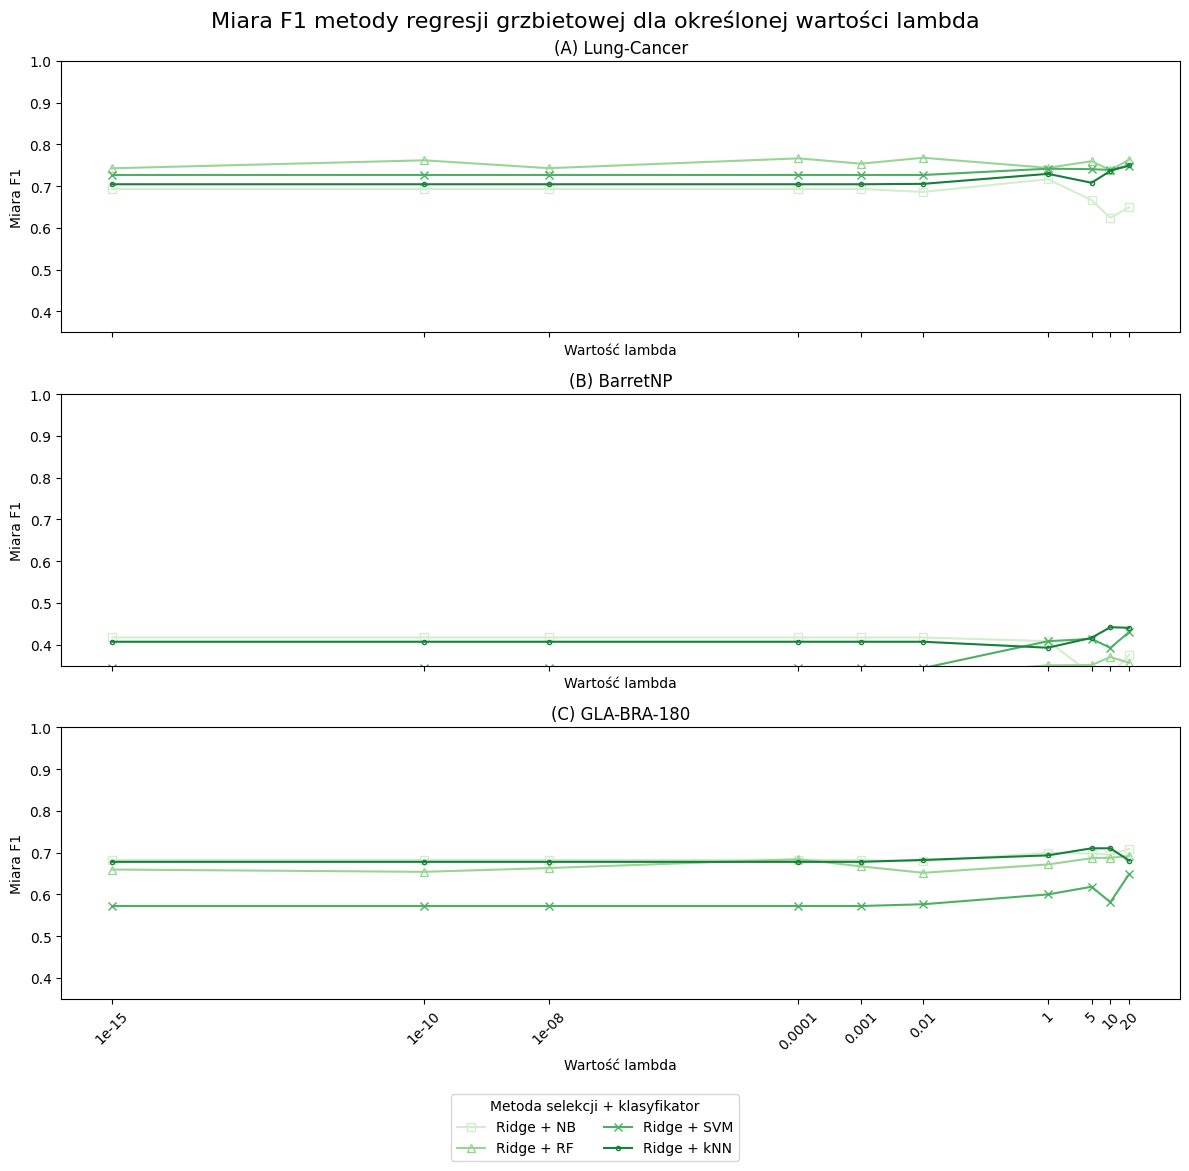

In [170]:
# linesplot_results(dataset_mean_acc_Ridge_lambda, group_var='Lambda', group_var_name='lambda', metoda_fs='regresji grzbietowej', legend_cols = 2)

linesplot_results(dataset_mean_f1_Ridge_lambda, metric='F-measure_mean', metryka='Miara F1', group_var='Lambda', group_var_name='lambda', metoda_fs='regresji grzbietowej', legend_cols = 2)

##### No. selected genes

In [94]:
# dataset_mean_acc_Ridge_genes = prepare_df_by_groupby(embedded_results_df_Ridge, groupby_var='No. selected genes')

dataset_mean_acc_Ridge_genes, dataset_mean_prec_Ridge_genes, dataset_mean_sens_Ridge_genes, dataset_mean_f1_Ridge_genes = prepare_df_by_groupby(embedded_results_df_Ridge, groupby_var='No. selected genes')

In [174]:
dataset_mean_f1_Ridge_genes[dataset_mean_f1_Ridge_genes['Dataset'] == 'Lung-Cancer'].sort_values(by='F-measure_mean', ascending=False).head()

,Method,Dataset,Feature Selection method,Classification method,No. selected genes,F-measure,F-measure_mean
25,Ridge + SVM,Lung-Cancer,Ridge,SVM,1000,0.903148,0.915130
21,Ridge + SVM,Lung-Cancer,Ridge,SVM,500,0.893391,0.905992
17,Ridge + SVM,Lung-Cancer,Ridge,SVM,200,0.849290,0.843642
27,Ridge + RF,Lung-Cancer,Ridge,RF,1000,0.778810,0.835818
19,Ridge + RF,Lung-Cancer,Ridge,RF,200,0.870343,0.820621


In [175]:
dataset_mean_f1_Ridge_genes[dataset_mean_f1_Ridge_genes['Dataset'] == 'BarretNP'].sort_values(by='F-measure_mean', ascending=False).head()

,Method,Dataset,Feature Selection method,Classification method,No. selected genes,F-measure,F-measure_mean
302,Ridge + kNN,BarretNP,Ridge,kNN,500,0.637987,0.573407
298,Ridge + kNN,BarretNP,Ridge,kNN,200,0.614292,0.561830
305,Ridge + SVM,BarretNP,Ridge,SVM,1000,0.545455,0.541477
288,Ridge + NB,BarretNP,Ridge,NB,50,0.551768,0.487251
301,Ridge + SVM,BarretNP,Ridge,SVM,500,0.478475,0.464587


In [176]:
dataset_mean_f1_Ridge_genes[dataset_mean_f1_Ridge_genes['Dataset'] == 'GLA-BRA-180'].sort_values(by='F-measure_mean', ascending=False).head()

,Method,Dataset,Feature Selection method,Classification method,No. selected genes,F-measure,F-measure_mean
586,Ridge + kNN,GLA-BRA-180,Ridge,kNN,1000,0.794234,0.786473
578,Ridge + kNN,GLA-BRA-180,Ridge,kNN,200,0.736383,0.747903
580,Ridge + NB,GLA-BRA-180,Ridge,NB,500,0.721801,0.724391
568,Ridge + NB,GLA-BRA-180,Ridge,NB,50,0.728175,0.713790
582,Ridge + kNN,GLA-BRA-180,Ridge,kNN,500,0.724747,0.710705


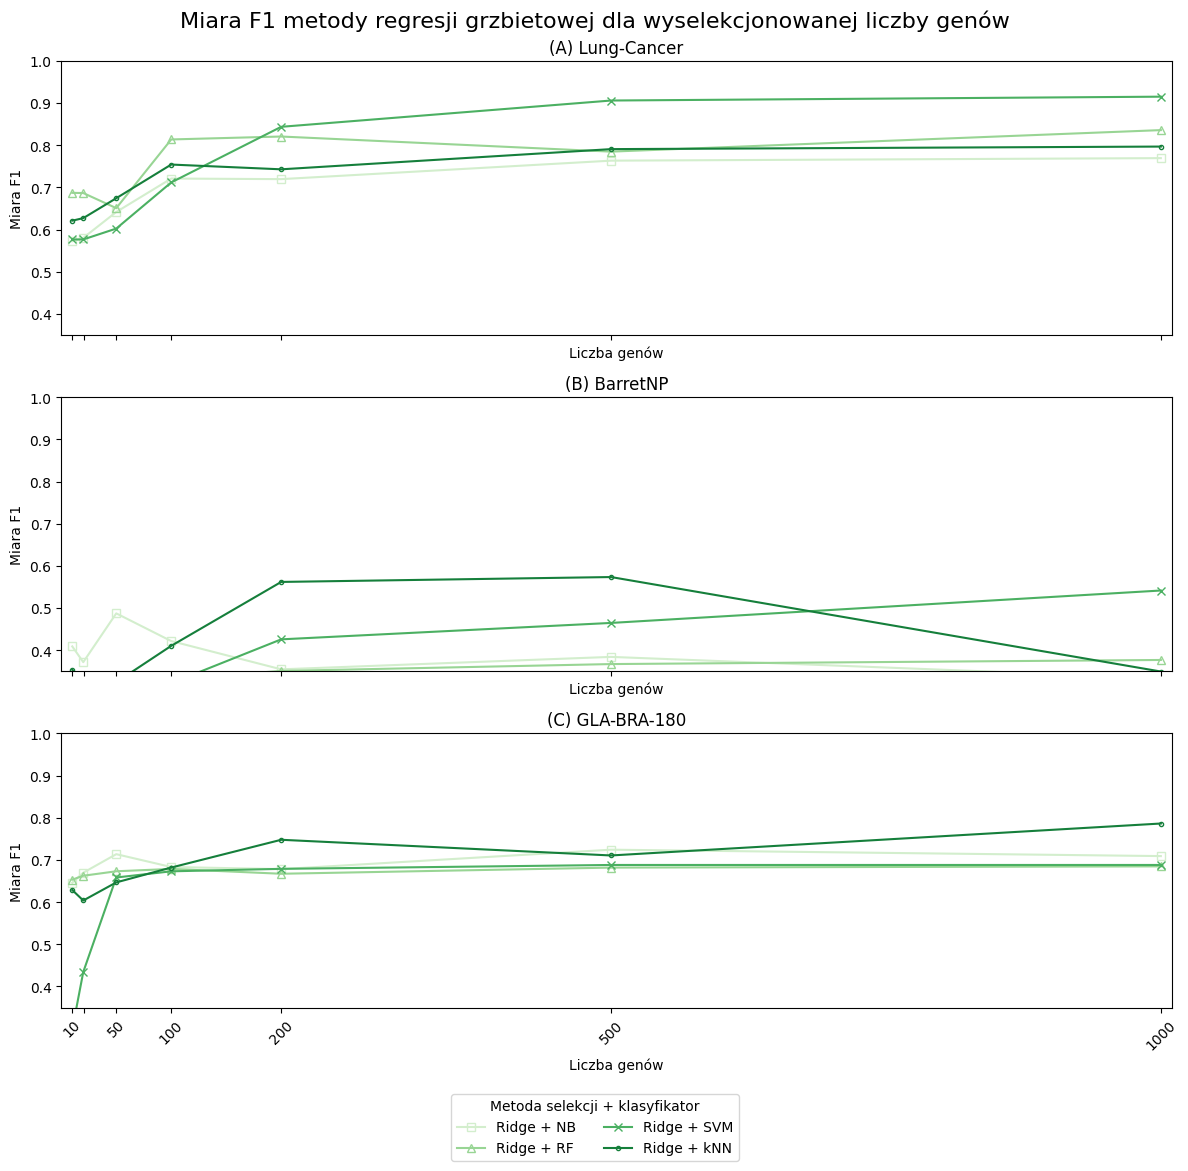

In [98]:
# linesplot_results(dataset_mean_acc_Ridge_genes, group_var='No. selected genes', group_var_name='genów', metoda_fs='regresji grzbietowej', legend_cols = 2)

linesplot_results(dataset_mean_f1_Ridge_genes, metric='F-measure_mean', metryka='Miara F1', group_var='No. selected genes', group_var_name='genów', metoda_fs='regresji grzbietowej', legend_cols = 2)

#### SVM-RFE

In [99]:
embedded_results_df_SVM_RFE

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. trees,Accuracy,Precision,Sensitivity,F-measure,Train set,Test set,Lambda
0,SVM-RFE + NB,Lung-Cancer,SVM-RFE,NB,12601,1000,NaN,0.975000,0.980000,0.975000,0.976162,157.0,40.0,NaN
1,SVM-RFE + SVM,Lung-Cancer,SVM-RFE,SVM,12601,1000,NaN,0.975000,0.980000,0.975000,0.976162,157.0,40.0,NaN
2,SVM-RFE + kNN,Lung-Cancer,SVM-RFE,kNN,12601,1000,NaN,0.925000,0.931724,0.925000,0.918713,157.0,40.0,NaN
3,SVM-RFE + RF,Lung-Cancer,SVM-RFE,RF,12601,1000,NaN,0.950000,0.955000,0.950000,0.949603,157.0,40.0,NaN
4,SVM-RFE + NB,Lung-Cancer,SVM-RFE,NB,12601,500,NaN,0.950000,0.955000,0.950000,0.949603,157.0,40.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,SVM-RFE + RF,GLA-BRA-180,SVM-RFE,RF,49152,20,NaN,0.750000,0.648990,0.750000,0.694444,144.0,36.0,NaN
80,SVM-RFE + NB,GLA-BRA-180,SVM-RFE,NB,49152,10,NaN,0.694444,0.626697,0.694444,0.657298,144.0,36.0,NaN
81,SVM-RFE + SVM,GLA-BRA-180,SVM-RFE,SVM,49152,10,NaN,0.722222,0.621759,0.722222,0.664422,144.0,36.0,NaN
82,SVM-RFE + kNN,GLA-BRA-180,SVM-RFE,kNN,49152,10,NaN,0.694444,0.602469,0.694444,0.642271,144.0,36.0,NaN


In [181]:
embedded_results_df_SVM_RFE[embedded_results_df_SVM_RFE['Dataset'] == 'BarretNP'].sort_values(by='F-measure', ascending=False).head(10)

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. trees,Accuracy,Precision,Sensitivity,F-measure,Train set,Test set,Lambda
47,SVM-RFE + RF,BarretNP,SVM-RFE,RF,22278,50,NaN,0.6875,0.683036,0.6875,0.682158,60.0,16.0,NaN
36,SVM-RFE + NB,BarretNP,SVM-RFE,NB,22278,200,NaN,0.6875,0.672917,0.6875,0.676136,60.0,16.0,NaN
33,SVM-RFE + SVM,BarretNP,SVM-RFE,SVM,22278,500,NaN,0.6875,0.677083,0.6875,0.651786,60.0,16.0,NaN
30,SVM-RFE + kNN,BarretNP,SVM-RFE,kNN,22278,1000,NaN,0.6250,0.604167,0.6250,0.604911,60.0,16.0,NaN
54,SVM-RFE + kNN,BarretNP,SVM-RFE,kNN,22278,10,NaN,0.6250,0.604167,0.6250,0.604911,60.0,16.0,NaN
34,SVM-RFE + kNN,BarretNP,SVM-RFE,kNN,22278,500,NaN,0.6250,0.604167,0.6250,0.604911,60.0,16.0,NaN
51,SVM-RFE + RF,BarretNP,SVM-RFE,RF,22278,20,NaN,0.6250,0.604167,0.6250,0.604911,60.0,16.0,NaN
46,SVM-RFE + kNN,BarretNP,SVM-RFE,kNN,22278,50,NaN,0.6250,0.604167,0.6250,0.604911,60.0,16.0,NaN
37,SVM-RFE + SVM,BarretNP,SVM-RFE,SVM,22278,200,NaN,0.6250,0.604167,0.6250,0.604911,60.0,16.0,NaN
38,SVM-RFE + kNN,BarretNP,SVM-RFE,kNN,22278,200,NaN,0.6250,0.604167,0.6250,0.604911,60.0,16.0,NaN


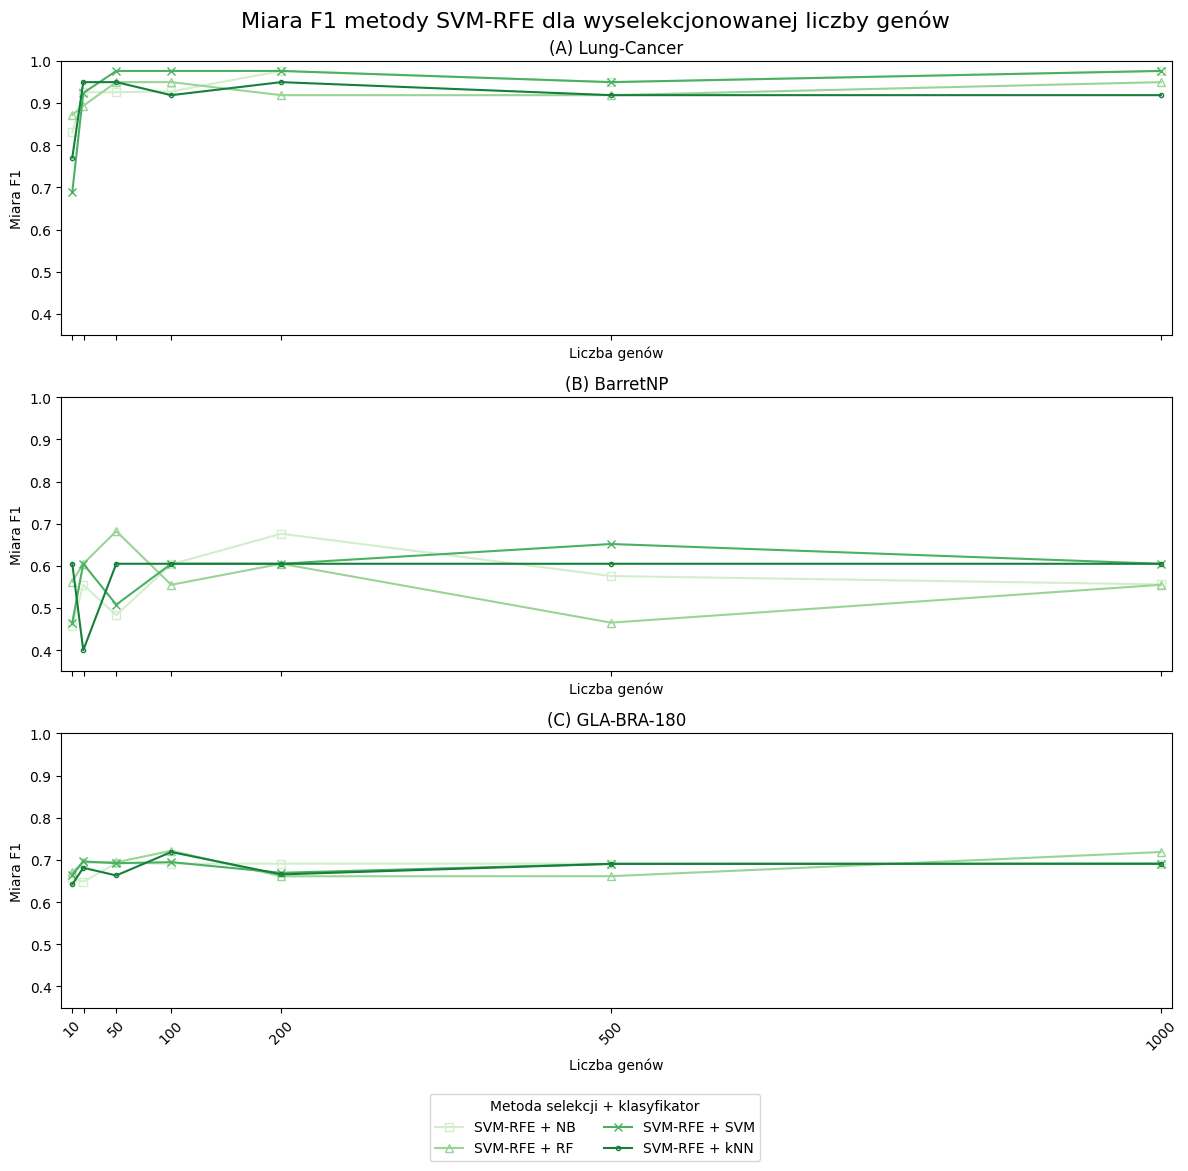

In [103]:
# linesplot_results(embedded_results_df_SVM_RFE, metric='Accuracy', group_var='No. selected genes', group_var_name='genów', metoda_fs='SVM-RFE', legend_cols = 2)

linesplot_results(embedded_results_df_SVM_RFE, metric='F-measure', metryka='Miara F1', group_var='No. selected genes', group_var_name='genów', metoda_fs='SVM-RFE', legend_cols = 2)

In [ ]:
# select best option for each method and then create df in order to plot boxplot 

In [183]:
embedded_results_df_RF[(embedded_results_df_RF['Dataset'] == 'Lung-Cancer')]

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. trees,Accuracy,Precision,Sensitivity,F-measure,Train set,Test set,Lambda
0,RF + NB,Lung-Cancer,RF,NB,12601,10,10.0,0.775,0.790000,0.775,0.780159,NaN,NaN,NaN
1,RF + SVM,Lung-Cancer,RF,SVM,12601,10,10.0,0.700,0.490000,0.700,0.576471,NaN,NaN,NaN
2,RF + kNN,Lung-Cancer,RF,kNN,12601,10,10.0,0.725,0.710000,0.725,0.712644,NaN,NaN,NaN
3,RF + RF,Lung-Cancer,RF,RF,12601,10,10.0,0.800,0.793750,0.800,0.781667,NaN,NaN,NaN
4,RF + NB,Lung-Cancer,RF,NB,12601,20,10.0,0.825,0.830115,0.825,0.823559,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,RF + RF,Lung-Cancer,RF,RF,12601,500,2000.0,0.775,0.790000,0.775,0.740000,NaN,NaN,NaN
220,RF + NB,Lung-Cancer,RF,NB,12601,1000,2000.0,0.825,0.849000,0.825,0.831436,NaN,NaN,NaN
221,RF + SVM,Lung-Cancer,RF,SVM,12601,1000,2000.0,0.950,0.950000,0.950,0.950000,NaN,NaN,NaN
222,RF + kNN,Lung-Cancer,RF,kNN,12601,1000,2000.0,0.875,0.882586,0.875,0.869152,NaN,NaN,NaN


In [184]:
embedded_results_df_Ridge_lung = embedded_results_df_Ridge[(embedded_results_df_Ridge['Dataset'] == 'Lung-Cancer') & (embedded_results_df_Ridge['No. selected genes'] == 1000)]
# embedded_results_df_Ridge_SRBCT = embedded_results_df_Ridge[(embedded_results_df_Ridge['Dataset'] == 'SRBCT') & (embedded_results_df_Ridge['Lambda'] == 1.000000e-4)]
embedded_results_df_Ridge_BarretNP = embedded_results_df_Ridge[(embedded_results_df_Ridge['Dataset'] == 'BarretNP') & (embedded_results_df_Ridge['No. selected genes'] == 500)]
# embedded_results_df_Ridge_TOX = embedded_results_df_Ridge[(embedded_results_df_Ridge['Dataset'] == 'TOX-171') & (embedded_results_df_Ridge['Lambda'] == 1)]
embedded_results_df_Ridge_GLA = embedded_results_df_Ridge[(embedded_results_df_Ridge['Dataset'] == 'GLA-BRA-180') & (embedded_results_df_Ridge['No. selected genes'] == 1000)]
# embedded_results_df_Ridge_CLL = embedded_results_df_Ridge[(embedded_results_df_Ridge['Dataset'] == 'CLL-SUB-111') & (embedded_results_df_Ridge['Lambda'] == 5)]

# embedded_results_df_Ridge_combined = pd.concat([embedded_results_df_Ridge_lung, embedded_results_df_Ridge_SRBCT, embedded_results_df_Ridge_BarretNP, 
#                                                 embedded_results_df_Ridge_TOX, embedded_results_df_Ridge_GLA, embedded_results_df_Ridge_CLL])

embedded_results_df_Ridge_combined = pd.concat([embedded_results_df_Ridge_lung, embedded_results_df_Ridge_BarretNP, embedded_results_df_Ridge_GLA])

embedded_results_df_RF_lung = embedded_results_df_RF[(embedded_results_df_RF['Dataset'] == 'Lung-Cancer') & (embedded_results_df_RF['No. selected genes'] == 1000)]
# embedded_results_df_RF_SRBCT = embedded_results_df_RF[(embedded_results_df_RF['Dataset'] == 'SRBCT') & (embedded_results_df_RF['No. trees'] == 20)]
embedded_results_df_RF_BarretNP = embedded_results_df_RF[(embedded_results_df_RF['Dataset'] == 'BarretNP') & (embedded_results_df_RF['No. selected genes'] == 1000)]
# embedded_results_df_RF_TOX = embedded_results_df_RF[(embedded_results_df_RF['Dataset'] == 'TOX-171') & (embedded_results_df_RF['No. trees'] == 200)]
embedded_results_df_RF_GLA = embedded_results_df_RF[(embedded_results_df_RF['Dataset'] == 'GLA-BRA-180') & (embedded_results_df_RF['No. selected genes'] == 1000)]
# embedded_results_df_RF_CLL = embedded_results_df_RF[(embedded_results_df_RF['Dataset'] == 'CLL-SUB-111') & (embedded_results_df_RF['No. trees'] == 200)]

# embedded_results_df_RF_combined = pd.concat([embedded_results_df_RF_lung, embedded_results_df_RF_SRBCT, embedded_results_df_RF_BarretNP, 
#                                                 embedded_results_df_RF_TOX, embedded_results_df_RF_GLA, embedded_results_df_RF_CLL])

embedded_results_df_RF_combined = pd.concat([embedded_results_df_RF_lung, embedded_results_df_RF_BarretNP, embedded_results_df_RF_GLA])



In [185]:
# boxplot dopiero dla najlepszego zestawu parametrów, będę musiał wyselekcjonowac odpowiedni df w oparciu o optyamalizacje 
embedded_results_concated = pd.concat([embedded_results_df_Ridge_combined, embedded_results_df_RF_combined, embedded_results_df_SVM_RFE], ignore_index=True)


In [299]:
embedded_results_df_RF.head(2)

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. trees,Accuracy,Precision,Sensitivity,F-measure,Train set,Test set,Lambda,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,RF + NB,Lung-Cancer,RF,NB,12601,10,10.0,0.775,0.79,0.775,0.780159,NaN,NaN,NaN,NaN,NaN,NaN
1,RF + SVM,Lung-Cancer,RF,SVM,12601,10,10.0,0.700,0.49,0.700,0.576471,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
embedded_results_df_RF_selected = embedded_results_df_RF[['Method', 'Dataset', 'Feature Selection method', 'F-measure']]
embedded_results_df_SVM_RFE_selected = embedded_results_df_SVM_RFE[['Method', 'Dataset', 'Feature Selection method', 'F-measure']]
embedded_results_df_Ridge_selected = embedded_results_df_Ridge[['Method', 'Dataset', 'Feature Selection method', 'F-measure']]

embedded_results_df_all = pd.concat([embedded_results_df_RF_selected, embedded_results_df_SVM_RFE_selected, embedded_results_df_Ridge_selected], ignore_index=True)

In [305]:
def boxplot_results_embedded(data, metrics_col='',metryka='', metoda_fs=''):

    datasets = data['Dataset'].unique()

    num_datasets = len(datasets)
    fig, axes = plt.subplots(nrows=int(num_datasets), ncols=1, figsize=(12, 11), sharex=True)

    axes = axes.flatten()

    data = data.sort_values(by=['Feature Selection method'])

    feature_methods_order = data['Feature Selection method'].unique()

    custom_palette = ['forestgreen', 'cornflowerblue', 'darkorange']

    for i, dataset in enumerate(datasets):
        subset = data[data['Dataset'] == dataset]
        ax = axes[i]
        sns.boxplot(x='Feature Selection method', y=data[metrics_col], data=subset, ax=ax, order=feature_methods_order, palette=custom_palette)
        ax.set_xticks(range(len(feature_methods_order)))
        ax.set_xticklabels(feature_methods_order, rotation=45)
        ax.set_ylim(0.35, 1.0)
        ax.set_xlabel('Metoda selekcji genów')
        ax.set_ylabel(str(metryka))

        label = f'({chr(ord("A") + i)})'

        ax.set_title(f'{label} {dataset}')

    plt.suptitle(str(metryka) + ' metod ' + str(metoda_fs), fontsize=16)

    plt.tight_layout()
    plt.show()

C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\1616864597.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feature Selection method', y=data[metrics_col], data=subset, ax=ax, order=feature_methods_order, palette=custom_palette)
C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\1616864597.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feature Selection method', y=data[metrics_col], data=subset, ax=ax, order=feature_methods_order, palette=custom_palette)
C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\1616864597.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

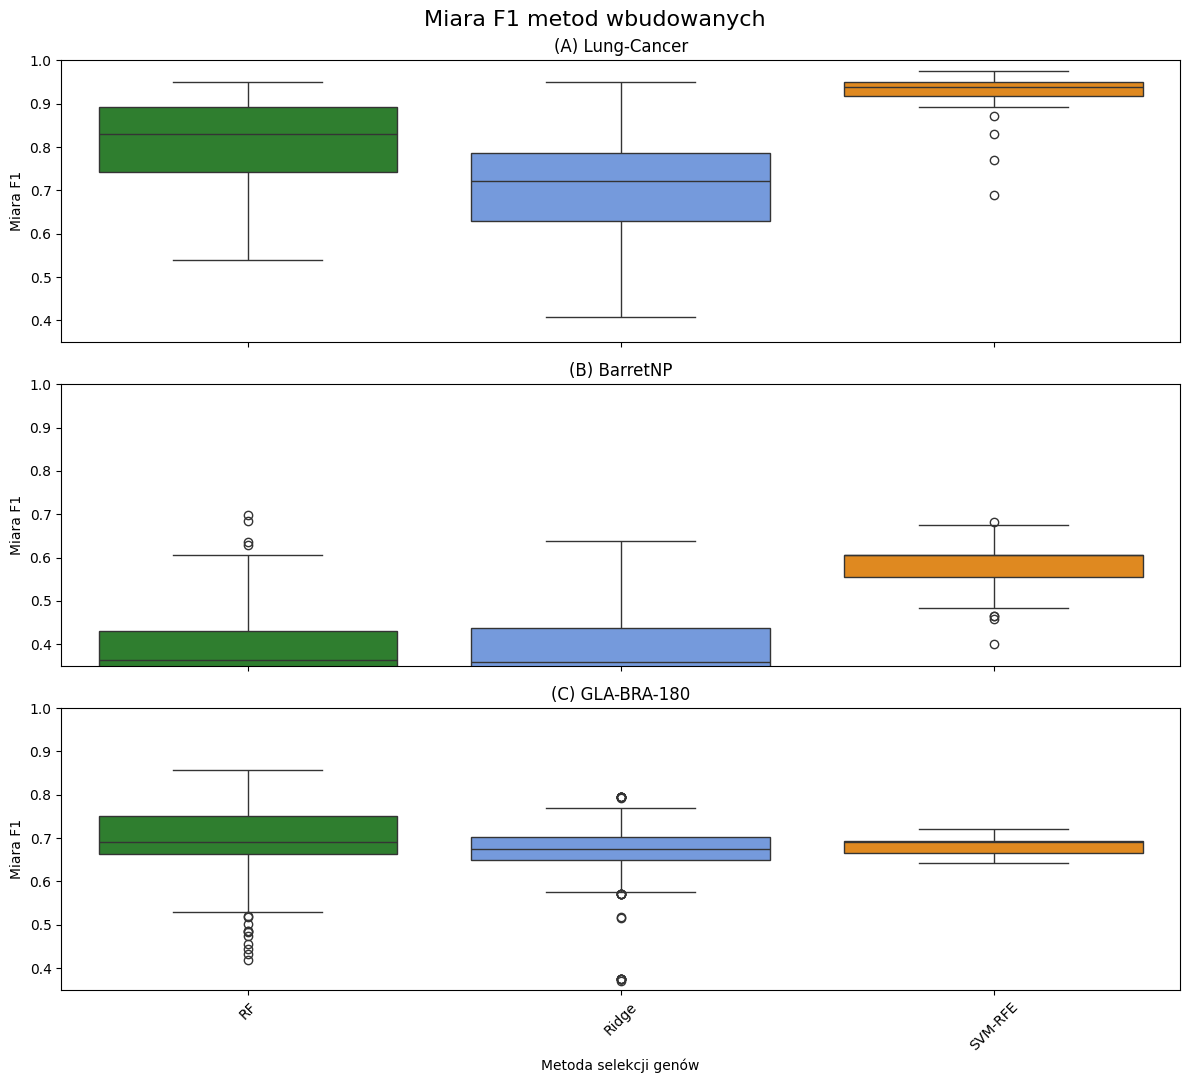

In [306]:

boxplot_results_embedded(embedded_results_df_all, metrics_col='F-measure',metryka='Miara F1', metoda_fs='wbudowanych')

## Hybrid 

In [224]:
GA_filters_selected = pd.read_csv('outputs/hybrid_df/split/selected_classif/results_splitted_hybrid_GA-weighted_metrics-fixed_subsets-01_17_2024-combined-split_filters_selected.csv')
GA_embedded_selected = pd.read_csv('outputs/hybrid_df/split/selected_classif/results_splitted_hybrid_GA-weighted_metrics-fixed_subsets-01_17_2024-combined-split_embedded_selected.csv')

ABC_filters_selected = pd.read_csv('outputs/hybrid_df/split/selected_classif/results_splitted_wrapper_ABC-fixed_subsets-01_20_2024-combined-split_filters_selected.csv')
ABC_embedded_selected = pd.read_csv('outputs/hybrid_df/split/selected_classif/results_splitted_wrapper_ABC-fixed_subsets-01_20_2024-combined-split_embedded_selected.csv')

PSO_filters_selected = pd.read_csv('outputs/hybrid_df/split/selected_classif/results_splitted_wrapper_PSO-fixed_subsets-01_20_2024-combined-split_filters_selected.csv')
PSO_embedded_selected = pd.read_csv('outputs/hybrid_df/split/selected_classif/results_splitted_wrapper_PSO-fixed_subsets-01_20_2024-combined-split_embedded_selected.csv')

In [225]:
GA_filters_selected[['First method', 'Dataset']] = GA_filters_selected['Dataset'].str.split('_', 1, expand=True)
GA_embedded_selected[['First method', 'Dataset']] = GA_embedded_selected['Dataset'].str.split('_', 1, expand=True)

ABC_filters_selected[['First method', 'Dataset']] = ABC_filters_selected['Dataset'].str.split('_', 1, expand=True)
ABC_embedded_selected[['First method', 'Dataset']] = ABC_embedded_selected['Dataset'].str.split('_', 1, expand=True)

PSO_filters_selected[['First method', 'Dataset']] = PSO_filters_selected['Dataset'].str.split('_', 1, expand=True)
PSO_embedded_selected[['First method', 'Dataset']] = PSO_embedded_selected['Dataset'].str.split('_', 1, expand=True)


C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\3938465819.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  GA_filters_selected[['First method', 'Dataset']] = GA_filters_selected['Dataset'].str.split('_', 1, expand=True)
C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\3938465819.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  GA_embedded_selected[['First method', 'Dataset']] = GA_embedded_selected['Dataset'].str.split('_', 1, expand=True)
C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\3938465819.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  ABC_filters_selected[['First method', 'Dataset']] = ABC_filters_selected['Dataset'].str.split('_', 1, expand=True)
C:\Users\Kacper\AppData\Local\Temp\ipykernel_

In [226]:
dict_fs = {'Genetic Algorithm' : 'GA', 
           'Artificial_Bee_Colony' : 'ABC', 
           'Particle_Swarm_Optimization' : 'PSO'}

GA_filters_selected = GA_filters_selected.replace({'Feature Selection method' : dict_fs})
GA_embedded_selected = GA_embedded_selected.replace({'Feature Selection method' : dict_fs})

ABC_filters_selected = ABC_filters_selected.replace({'Feature Selection method' : dict_fs})
ABC_embedded_selected = ABC_embedded_selected.replace({'Feature Selection method' : dict_fs})

PSO_filters_selected = PSO_filters_selected.replace({'Feature Selection method' : dict_fs})
PSO_embedded_selected = PSO_embedded_selected.replace({'Feature Selection method' : dict_fs})

# dataset name 
dataset_dict_name = {
    'lung_cancer_df': 'Lung-Cancer',
    'barretNP_df_1000' : 'BarretNP', 
    'barretNP_df' : 'BarretNP',
    'GLA_BRA_180_df' : 'GLA-BRA-180', 
    'RFE_lung_cancer_df' : 'Lung-Cancer', 
    'RFE_barretNP_df' : 'BarretNP', 
    'RFE_GLA_BRA_180_df' : 'GLA-BRA-180'}

GA_filters_selected = GA_filters_selected.replace({'Dataset' : dataset_dict_name})
GA_embedded_selected = GA_embedded_selected.replace({'Dataset' : dataset_dict_name})

ABC_filters_selected = ABC_filters_selected.replace({'Dataset' : dataset_dict_name})
ABC_embedded_selected = ABC_embedded_selected.replace({'Dataset' : dataset_dict_name})

PSO_filters_selected = PSO_filters_selected.replace({'Dataset' : dataset_dict_name})
PSO_embedded_selected = PSO_embedded_selected.replace({'Dataset' : dataset_dict_name})

# First method name 
first_method_dict = {
    'chi2' : 'Chi2', 
    'SVM' : 'SVM-RFE'}

GA_filters_selected = GA_filters_selected.replace({'First method' : first_method_dict})
GA_embedded_selected = GA_embedded_selected.replace({'First method' : first_method_dict})

ABC_filters_selected = ABC_filters_selected.replace({'First method' : first_method_dict})
ABC_embedded_selected = ABC_embedded_selected.replace({'First method' : first_method_dict})

PSO_filters_selected = PSO_filters_selected.replace({'First method' : first_method_dict})
PSO_embedded_selected = PSO_embedded_selected.replace({'First method' : first_method_dict})


In [227]:

GA_filters_selected['Dataset'] = pd.Categorical(GA_filters_selected['Dataset'], ['Lung-Cancer', 'BarretNP', 'GLA-BRA-180'])
GA_embedded_selected['Dataset'] = pd.Categorical(GA_embedded_selected['Dataset'], ['Lung-Cancer', 'BarretNP', 'GLA-BRA-180'])

ABC_filters_selected['Dataset'] = pd.Categorical(ABC_filters_selected['Dataset'], ['Lung-Cancer', 'BarretNP', 'GLA-BRA-180'])
ABC_embedded_selected['Dataset'] = pd.Categorical(ABC_embedded_selected['Dataset'], ['Lung-Cancer', 'BarretNP', 'GLA-BRA-180'])

PSO_filters_selected['Dataset'] = pd.Categorical(PSO_filters_selected['Dataset'], ['Lung-Cancer', 'BarretNP', 'GLA-BRA-180'])
PSO_embedded_selected['Dataset'] = pd.Categorical(PSO_embedded_selected['Dataset'], ['Lung-Cancer', 'BarretNP', 'GLA-BRA-180'])

GA_filters_selected = GA_filters_selected.sort_values(by=['Dataset'])
GA_embedded_selected = GA_embedded_selected.sort_values(by=['Dataset'])

ABC_filters_selected = ABC_filters_selected.sort_values(by=['Dataset'])
ABC_embedded_selected = ABC_embedded_selected.sort_values(by=['Dataset'])

PSO_filters_selected = PSO_filters_selected.sort_values(by=['Dataset'])
PSO_embedded_selected = PSO_embedded_selected.sort_values(by=['Dataset'])

In [228]:
PSO_embedded_selected.head()

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,Iterations,Initialized particles,Accuracy,Precision,Sensitivity,F-measure,First method
161,Hybrid approach,Lung-Cancer,PSO,SVM,501,242.0,200,200,0.900,0.905000,0.900,0.893391,Ridge
92,Hybrid approach,Lung-Cancer,PSO,SVM,501,258.0,200,50,0.925,0.929074,0.925,0.925707,RF
93,Hybrid approach,Lung-Cancer,PSO,SVM,501,253.0,500,1000,0.925,0.929074,0.925,0.925707,RF
94,Hybrid approach,Lung-Cancer,PSO,SVM,501,247.0,500,100,0.900,0.905000,0.900,0.893391,RF
95,Hybrid approach,Lung-Cancer,PSO,SVM,501,251.0,500,10,0.925,0.926724,0.925,0.923872,RF


In [229]:
GA_filters_selected['Hybrid method'] = GA_filters_selected['First method'] + ' + ' + GA_filters_selected['Feature Selection method']
GA_embedded_selected['Hybrid method'] = GA_embedded_selected['First method'] + ' + ' + GA_embedded_selected['Feature Selection method']

ABC_filters_selected['Hybrid method'] = ABC_filters_selected['First method'] + ' + ' + ABC_filters_selected['Feature Selection method']
ABC_embedded_selected['Hybrid method'] = ABC_embedded_selected['First method'] + ' + ' + ABC_embedded_selected['Feature Selection method']

PSO_filters_selected['Hybrid method'] = PSO_filters_selected['First method'] + ' + ' + PSO_filters_selected['Feature Selection method']
PSO_embedded_selected['Hybrid method'] = PSO_embedded_selected['First method'] + ' + ' + PSO_embedded_selected['Feature Selection method']

In [230]:
GA_filters_selected = GA_filters_selected[GA_filters_selected['No. iterations'] < 2000]
GA_embedded_selected = GA_embedded_selected[GA_embedded_selected['No. iterations'] < 2000]

### filters 

In [231]:
def linesplot_results_hybrid(data, metric='F-measure', metryka='Miara F1', group_var='No. iterations', group_var_name='iteracji', metoda_fs='hybrydowej', legend_cols=2, metoda='GA', color='niebieski'):

    colors_hue = 3
    if color == 'zielony':
        green_palette = sns.color_palette("Greens", n_colors=colors_hue)
        combined_palette = green_palette 
    elif color == 'niebieski':
        blue_palette = sns.color_palette("Blues", n_colors=colors_hue)
        combined_palette = blue_palette 
    elif color == 'pomarańczowy':
        red_palette = sns.color_palette("Oranges", n_colors=colors_hue)
        combined_palette = red_palette 
    else: 
        green_palette = sns.color_palette("Greens", n_colors=colors_hue)
        blue_palette = sns.color_palette("Blues", n_colors=colors_hue)
        red_palette = sns.color_palette("Oranges", n_colors=colors_hue)
        combined_palette = green_palette + blue_palette + red_palette
        # combined_palette = blue_palette 

    # markers = ['s', '^', 'x', '.']
    markers = ['s', '^', 'x']

    datasets = data['Dataset'].unique()
    num_datasets = len(datasets)

    fig, axes = plt.subplots(nrows=int(num_datasets), ncols=1, figsize=(12, 11), sharex=True)

    axes = axes.flatten()

    for idx, dataset in enumerate(datasets):
        ax = axes[idx]
        dataset_df = data[data['Dataset'] == dataset]

        dataset_df = dataset_df.sort_values(by=['Hybrid method', group_var])

        methods = dataset_df['Hybrid method'].unique()

        for i, (method, group) in enumerate(dataset_df.groupby('Hybrid method')):
            color = combined_palette[i % len(combined_palette)] 
            marker = markers[i % len(markers)]
            ax.plot(group[group_var], group[metric], marker=marker, markerfacecolor='none', label=method, color=color)

        label = f'({chr(ord("A") + idx)})'

        ax.set_title(f'{label} {dataset}')

        if group_var_name == 'lambda':
            ax.set_xlabel('Wartość ' + str(group_var_name))
        elif group_var_name == 'init_pop':
            ax.set_xlabel('Wielkość zainicjalizowanej populacji rozwiązań')
        else: 
            ax.set_xlabel('Liczba ' + str(group_var_name))

        # ax.set_xlabel('Liczba ' + str(group_var_name))
        ax.set_ylabel(str(metryka))
        ax.set_ylim(0.35, 1.0)
        # ax.set_xlim(0, 1000)

        if group_var_name == 'genów':
            ax.set_xlim(0, 1010)
            ax.set_xticks([10, 20, 50, 100, 200, 500, 1000])
            ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000])
        elif group_var_name == 'drzew':
            ax.set_xlim(0, 2010)
            ax.set_xticks([10, 20, 50, 100, 200, 500, 1000, 2000])
            ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000, 2000])
        elif group_var_name == 'lambda':
            ax.set_xscale('log')
            ax.set_xticks([1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20])
            ax.set_xticklabels([1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20])
        elif group_var_name == 'iteracji':
            ax.set_xlim(-10, 1010)
            ax.set_xticks([0, 50, 100, 200, 500, 1000])
            ax.set_xticklabels([0, 50, 100, 200, 500, 1000])
        elif group_var_name == 'init_pop':
            ax.set_xlim(-10, 1010)
            ax.set_xticks([0, 10, 20, 50, 100, 200, 500, 1000])
            ax.set_xticklabels([0, 10, 20, 50, 100, 200, 500, 1000])

        xticks_positions = ax.get_xticks()
        # xticks_positions[1] += 1.1

        if group_var_name == 'genów':
            ax.set_xticks(xticks_positions)
        elif group_var_name == 'drzew':
            xticks_positions[2] += 1.1
            ax.set_xticks(xticks_positions)
        elif group_var_name == 'init_pop':
            xticks_positions[1] += 1.1
            ax.set_xticks(xticks_positions)
        # elif group_var_name == 'lambda':
        #     xticks_positions[2] += 1.1
        #     xticks_positions[3] += 1.1
        #     xticks_positions[4] += 1.1
        #     xticks_positions[5] += 1.1
            
        # ax.set_xticks(xticks_positions)
        ax.tick_params(axis='x', rotation=45)

        handles, labels = ax.get_legend_handles_labels()

    fig.legend(handles, labels, title='Hybrydowa metoda selekcji (filtrująca + opakowująca)', loc='upper center', bbox_to_anchor=(0.5, 0), ncol=legend_cols)

    if group_var_name == 'iteracji':
        plt.suptitle(str(metryka) + ' metod ' + str(metoda_fs) + ' wykorzystujących metodę opakowującą ' + str(metoda) + '\n dla określonej liczby ' + str(group_var_name), fontsize=16)
    elif group_var_name == 'init_pop':
        plt.suptitle(str(metryka) + ' metod ' + str(metoda_fs) + ' wykorzystujących metodę opakowującą ' + str(metoda) + '\n dla określonej wielkości zainicjalizowanej populacji rozwiązań', fontsize=16)
    elif group_var_name == 'lambda':
        plt.suptitle(str(metryka) + ' metody ' + str(metoda_fs) + ' dla określonej wartości ' + str(group_var_name), fontsize=16)
    else:
        plt.suptitle(str(metryka) + ' metody ' + str(metoda_fs) + ' dla wyselekcjonowanej liczby ' + str(group_var_name), fontsize=16)

    # plt.suptitle('Dokładność metod ' + str(metoda_fs) + ' dla określonej liczby ' + str(group_var_name), fontsize=16)
    plt.tight_layout()
    plt.show()

### GA 

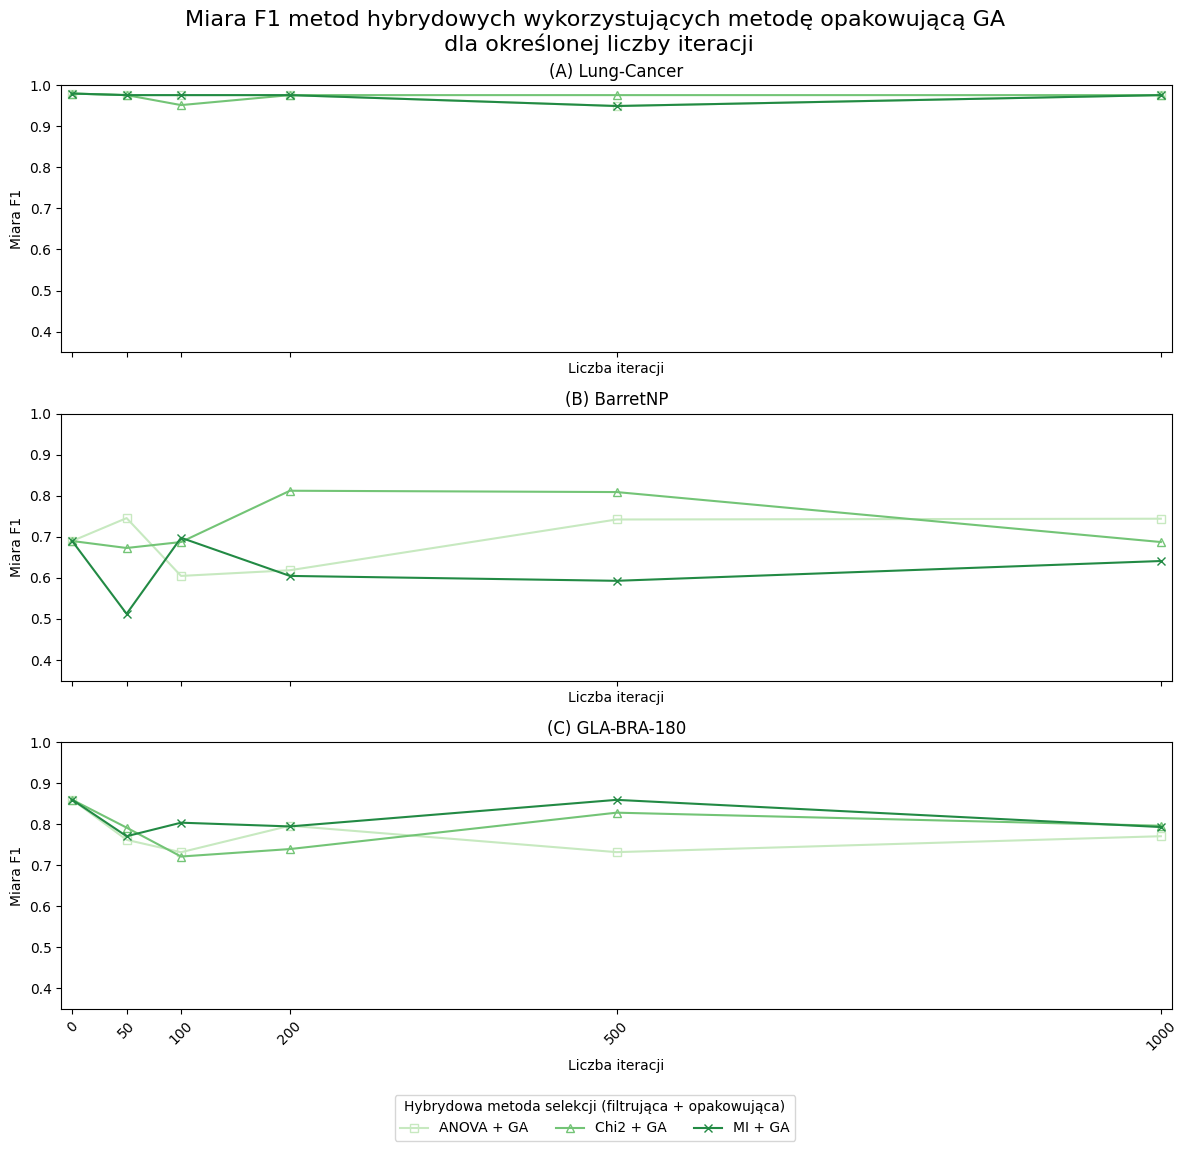

In [232]:
linesplot_results_hybrid(GA_filters_selected, metric='F-measure', metryka='Miara F1', group_var='No. iterations', group_var_name='iteracji', metoda_fs='hybrydowych', legend_cols=3, metoda='GA', color='zielony')

In [233]:
GA_filters_selected.head(2)

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. iterations,Accuracy,Precision,Sensitivity,F-measure,First method,Hybrid method
23,Hybrid approach,Lung-Cancer,GA,kNN,501,282.0,200,0.975,0.98,0.975,0.976162,ANOVA,ANOVA + GA
49,Hybrid approach,Lung-Cancer,GA,kNN,501,258.0,50,0.975,0.98,0.975,0.976162,MI,MI + GA


### ABC

In [234]:
def prepare_df_by_groupby(dataset, groupby_var='No. iterations'):
    
    dataset_mean_f1 = dataset.join(dataset.groupby(by=['Dataset', 'Hybrid method', groupby_var])['F-measure'].mean(), on=['Dataset', 'Hybrid method', groupby_var], rsuffix='_mean')

    dataset_mean_f1 = dataset_mean_f1.groupby(by=['Dataset', 'Hybrid method', groupby_var, 'F-measure_mean'])[['Method', 'Dataset', 'Hybrid method', groupby_var, 'F-measure', 'F-measure_mean', 'Feature Selection method']].head(1)
    
    return dataset_mean_f1

In [235]:
ABC_filters_selected.head()

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,Iterations,Initialized particles,Accuracy,Precision,Sensitivity,F-measure,First method,Hybrid method
322,Hybrid approach,Lung-Cancer,ABC,kNN,501,NaN,0,0,NaN,NaN,NaN,0.980000,MI,MI + ABC
137,Hybrid approach,Lung-Cancer,ABC,kNN,501,437.0,50,100,0.975,0.980000,0.975,0.976162,ANOVA,ANOVA + ABC
138,Hybrid approach,Lung-Cancer,ABC,kNN,501,493.0,50,10,0.975,0.980000,0.975,0.976162,ANOVA,ANOVA + ABC
139,Hybrid approach,Lung-Cancer,ABC,kNN,501,25.0,50,200,0.875,0.884677,0.875,0.855678,ANOVA,ANOVA + ABC
140,Hybrid approach,Lung-Cancer,ABC,kNN,501,368.0,50,20,0.950,0.955000,0.950,0.949603,ANOVA,ANOVA + ABC


#### No. iters

In [236]:
ABC_filters_selected_iters = prepare_df_by_groupby(ABC_filters_selected, groupby_var='Iterations')

In [237]:
ABC_filters_selected_iters

,Method,Dataset,Hybrid method,Iterations,F-measure,F-measure_mean,Feature Selection method
322,Hybrid approach,Lung-Cancer,MI + ABC,0,0.980000,0.980000,ABC
137,Hybrid approach,Lung-Cancer,ANOVA + ABC,50,0.976162,0.913701,ABC
143,Hybrid approach,Lung-Cancer,ANOVA + ABC,0,0.980000,0.980000,ABC
321,Hybrid approach,Lung-Cancer,MI + ABC,50,0.976162,0.868220,ABC
216,Hybrid approach,Lung-Cancer,Chi2 + ABC,1000,0.838333,0.890306,ABC
...,...,...,...,...,...,...,...
180,Hybrid approach,GLA-BRA-180,Chi2 + ABC,1000,0.696875,0.731248,ABC
199,Hybrid approach,GLA-BRA-180,Chi2 + ABC,200,0.693096,0.751108,ABC
201,Hybrid approach,GLA-BRA-180,Chi2 + ABC,500,0.749950,0.748324,ABC
179,Hybrid approach,GLA-BRA-180,ANOVA + ABC,0,0.860000,0.860000,ABC


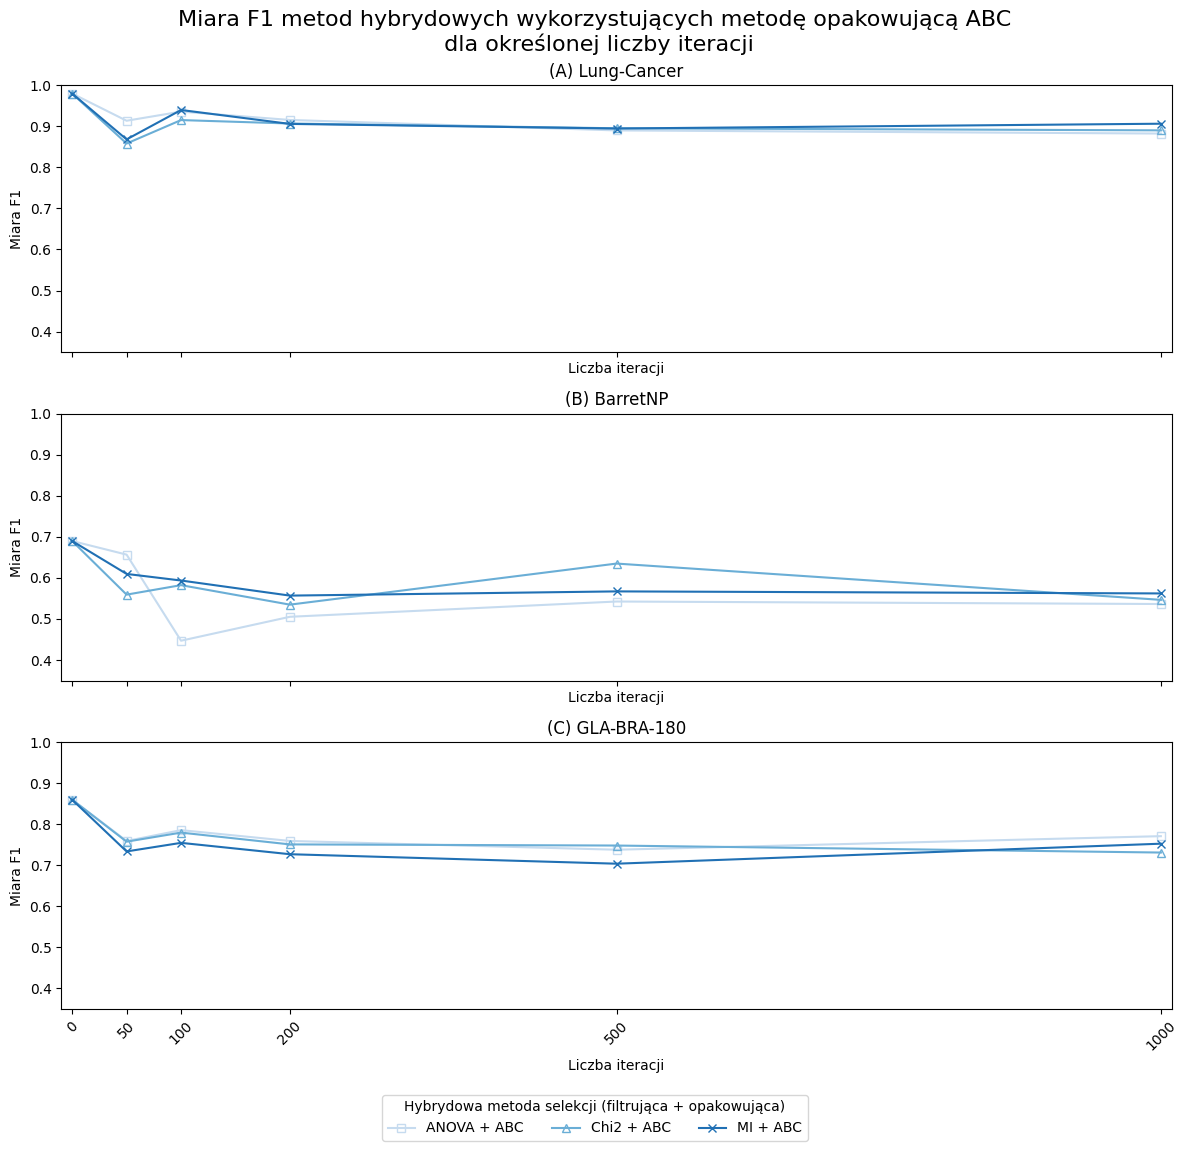

In [238]:
linesplot_results_hybrid(ABC_filters_selected_iters, metric='F-measure_mean', metryka='Miara F1', group_var='Iterations', group_var_name='iteracji', metoda_fs='hybrydowych', legend_cols=3, metoda='ABC', color='niebieski')

#### No. init particles

In [239]:
ABC_filters_selected_init = prepare_df_by_groupby(ABC_filters_selected, groupby_var='Initialized particles')

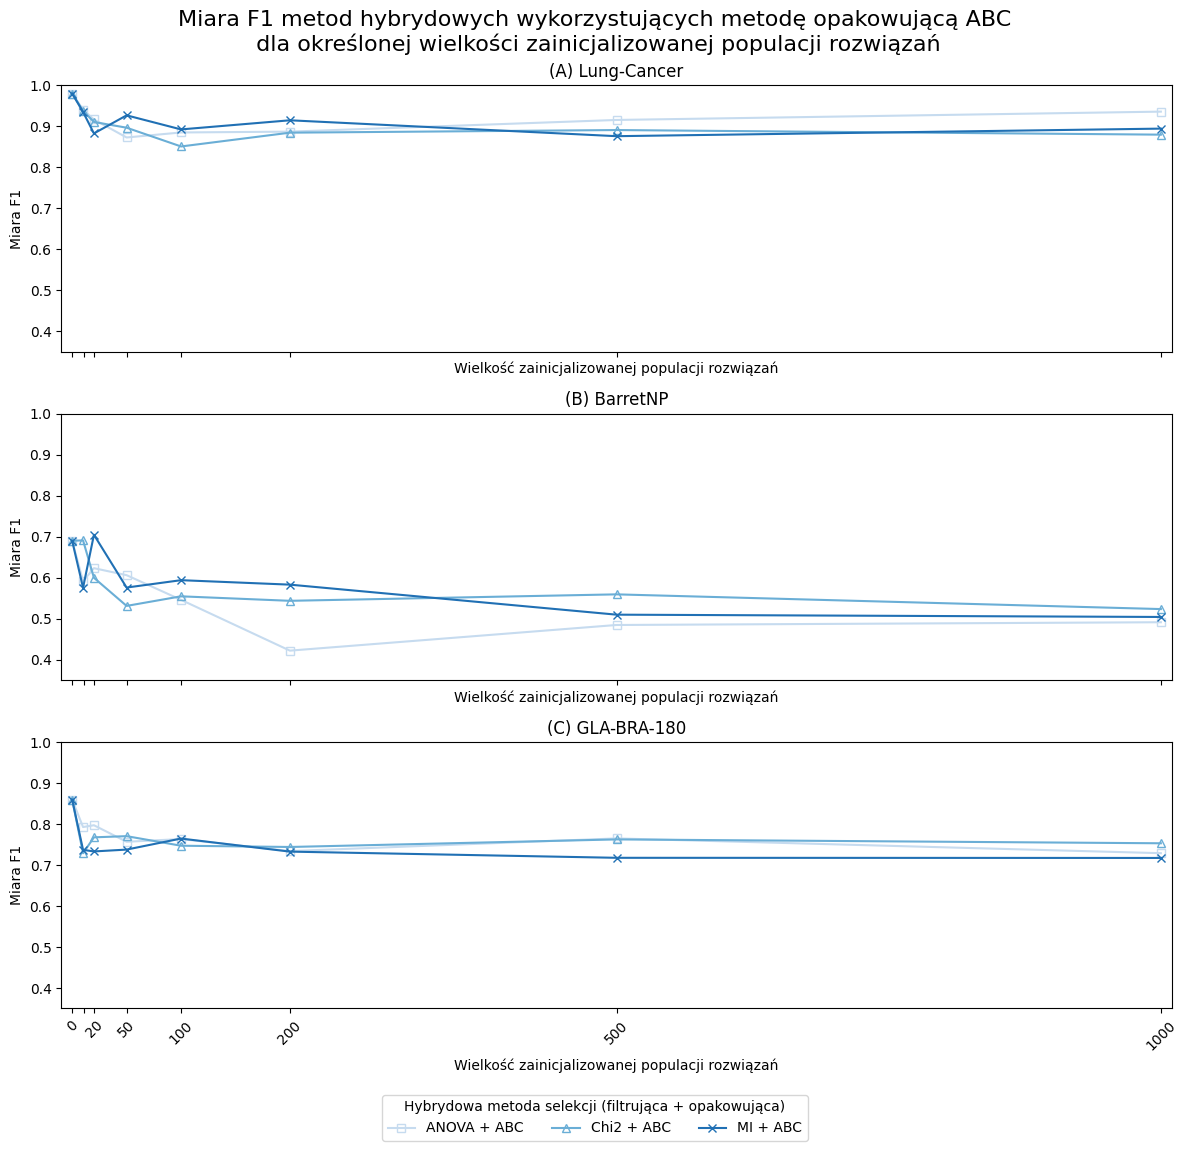

In [240]:
linesplot_results_hybrid(ABC_filters_selected_init, metric='F-measure_mean', metryka='Miara F1', group_var='Initialized particles', group_var_name='init_pop', metoda_fs='hybrydowych', legend_cols=3, metoda='ABC', color='niebieski')

### PSO

#### No. iters

In [241]:
PSO_filters_selected_iters = prepare_df_by_groupby(PSO_filters_selected, groupby_var='Iterations')

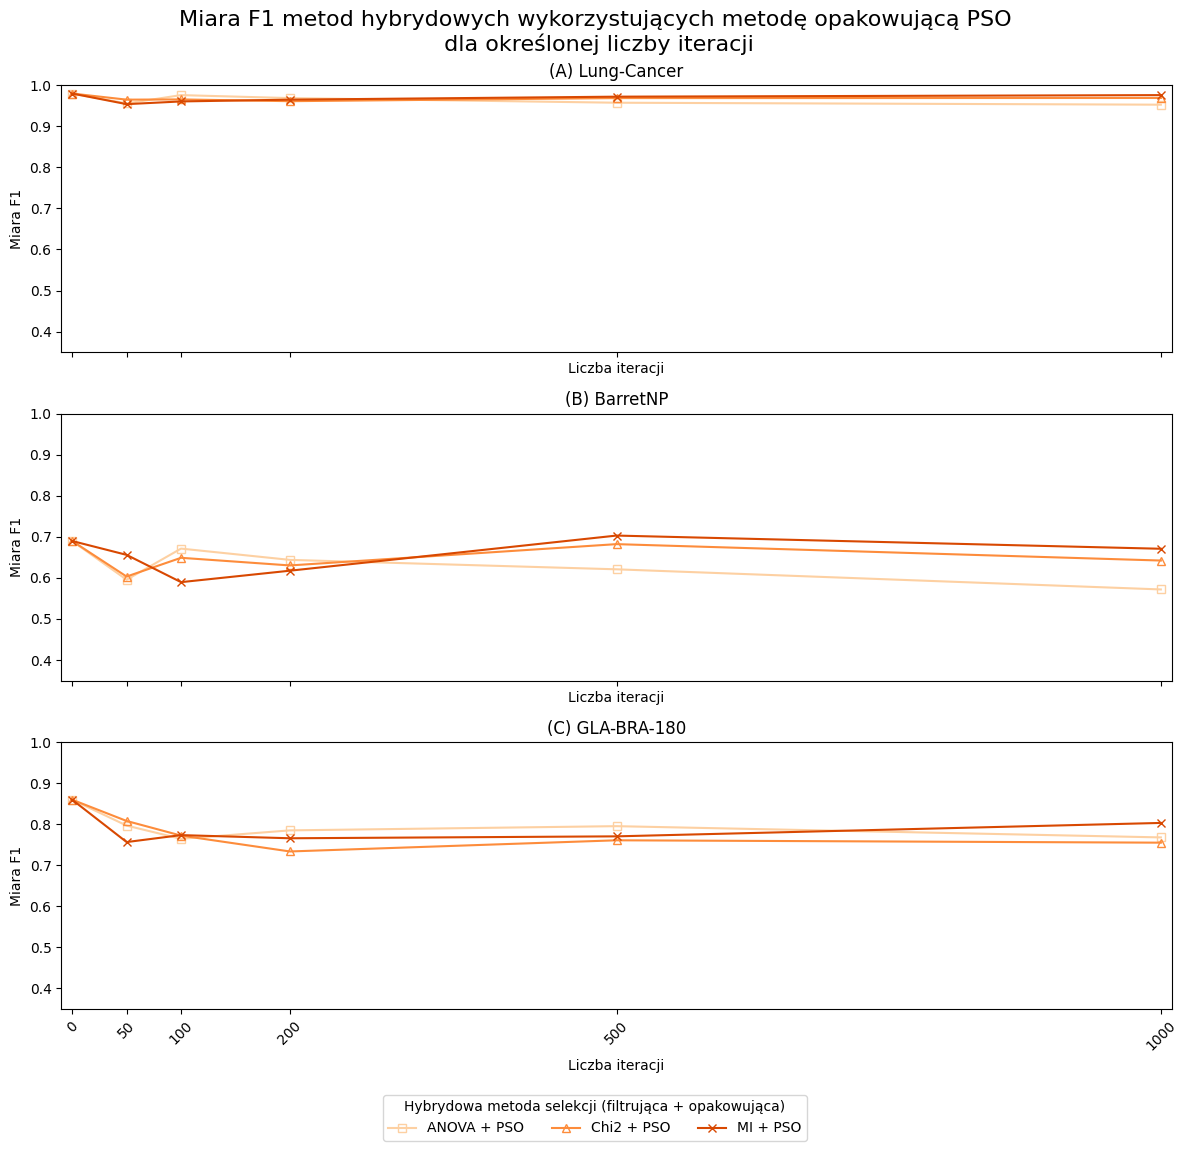

In [242]:
linesplot_results_hybrid(PSO_filters_selected_iters, metric='F-measure_mean', metryka='Miara F1', group_var='Iterations', group_var_name='iteracji', metoda_fs='hybrydowych', legend_cols=3, metoda='PSO', color='pomarańczowy')

#### No. init particles

In [243]:
PSO_filters_selected_init = prepare_df_by_groupby(PSO_filters_selected, groupby_var='Initialized particles')

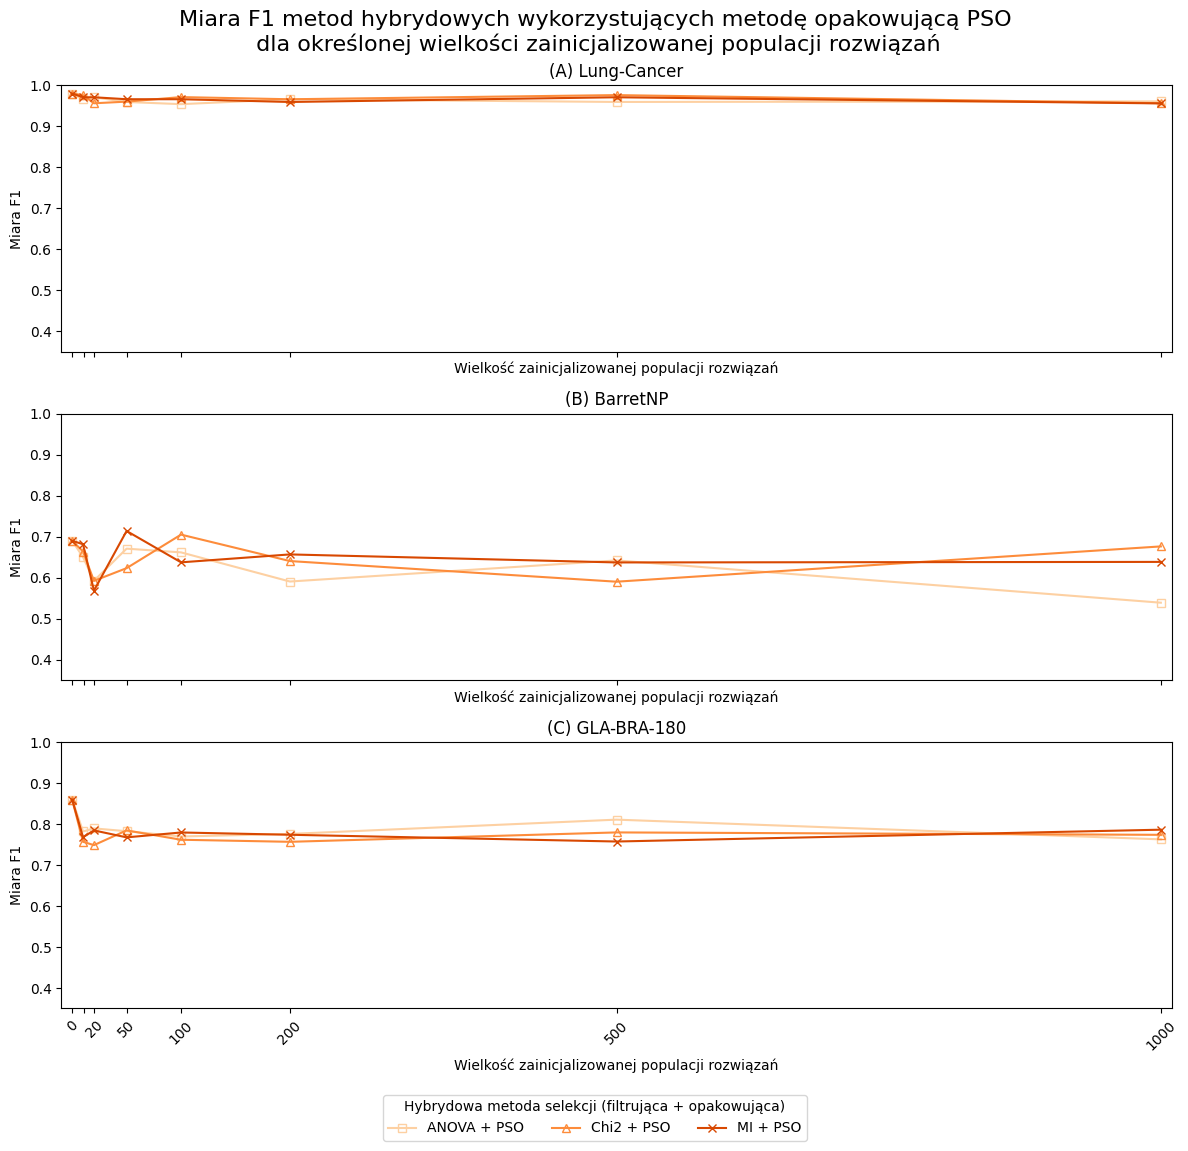

In [244]:
linesplot_results_hybrid(PSO_filters_selected_init, metric='F-measure_mean', metryka='Miara F1', group_var='Initialized particles', group_var_name='init_pop', metoda_fs='hybrydowych', legend_cols=3, metoda='PSO', color='pomarańczowy')

### Hybrid filter comaprision 

In [277]:
GA_filters_selected

,Method,Dataset,Feature Selection method,Classification method,No. genes,No. selected genes,No. iterations,Accuracy,Precision,Sensitivity,F-measure,First method,Hybrid method
23,Hybrid approach,Lung-Cancer,GA,kNN,501,282.0,200,0.975000,0.980000,0.975000,0.976162,ANOVA,ANOVA + GA
49,Hybrid approach,Lung-Cancer,GA,kNN,501,258.0,50,0.975000,0.980000,0.975000,0.976162,MI,MI + GA
24,Hybrid approach,Lung-Cancer,GA,kNN,501,295.0,1000,0.975000,0.980000,0.975000,0.976162,ANOVA,ANOVA + GA
25,Hybrid approach,Lung-Cancer,GA,kNN,501,290.0,500,0.950000,0.955000,0.950000,0.949603,ANOVA,ANOVA + GA
27,Hybrid approach,Lung-Cancer,GA,kNN,501,NaN,0,NaN,NaN,NaN,0.980000,ANOVA,ANOVA + GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Hybrid approach,GLA-BRA-180,GA,kNN,501,251.0,1000,0.777778,0.773589,0.777778,0.771036,ANOVA,ANOVA + GA
30,Hybrid approach,GLA-BRA-180,GA,kNN,501,259.0,200,0.805556,0.811839,0.805556,0.796569,ANOVA,ANOVA + GA
29,Hybrid approach,GLA-BRA-180,GA,kNN,501,264.0,100,0.750000,0.751009,0.750000,0.732033,ANOVA,ANOVA + GA
28,Hybrid approach,GLA-BRA-180,GA,kNN,501,259.0,50,0.777778,0.780771,0.777778,0.762216,ANOVA,ANOVA + GA


In [280]:
GA_filters_selected_info = GA_filters_selected[GA_filters_selected['No. iterations'] != 0]
GA_filters_selected_info = GA_filters_selected_info[['Hybrid method', 'Dataset', 'F-measure']]
GA_filters_selected_info

,Hybrid method,Dataset,F-measure
23,ANOVA + GA,Lung-Cancer,0.976162
49,MI + GA,Lung-Cancer,0.976162
24,ANOVA + GA,Lung-Cancer,0.976162
25,ANOVA + GA,Lung-Cancer,0.949603
35,Chi2 + GA,Lung-Cancer,0.976162
22,ANOVA + GA,Lung-Cancer,0.976162
36,Chi2 + GA,Lung-Cancer,0.951852
38,Chi2 + GA,Lung-Cancer,0.976162
39,Chi2 + GA,Lung-Cancer,0.976162
53,MI + GA,Lung-Cancer,0.976162


In [284]:
GA_filters_selected_info = GA_filters_selected[GA_filters_selected['No. iterations'] != 0]
GA_filters_selected_info = GA_filters_selected_info[['Hybrid method', 'Dataset', 'F-measure']]
# GA_embedded_selected_info = GA_embedded_selected[['Hybrid method', 'Dataset', 'F-measure']]

ABC_filters_selected_info = ABC_filters_selected[ABC_filters_selected['Iterations'] != 0]
ABC_filters_selected_info = ABC_filters_selected_info[['Hybrid method', 'Dataset', 'F-measure']]
# ABC_embedded_selected_info = ABC_embedded_selected[['Hybrid method', 'Dataset', 'F-measure']]

PSO_filters_selected_info = PSO_filters_selected[PSO_filters_selected['Iterations'] != 0]
PSO_filters_selected_info = PSO_filters_selected_info[['Hybrid method', 'Dataset', 'F-measure']]
# PSO_embedded_selected_info = PSO_embedded_selected[['Hybrid method', 'Dataset', 'F-measure']]

hybrid_filters_all = pd.concat([GA_filters_selected_info, ABC_filters_selected_info, PSO_filters_selected_info], ignore_index=True)

In [285]:
hybrid_filters_all

,Hybrid method,Dataset,F-measure
0,ANOVA + GA,Lung-Cancer,0.976162
1,MI + GA,Lung-Cancer,0.976162
2,ANOVA + GA,Lung-Cancer,0.976162
3,ANOVA + GA,Lung-Cancer,0.949603
4,Chi2 + GA,Lung-Cancer,0.976162
...,...,...,...
669,Chi2 + PSO,GLA-BRA-180,0.727805
670,Chi2 + PSO,GLA-BRA-180,0.752259
671,Chi2 + PSO,GLA-BRA-180,0.799193
672,Chi2 + PSO,GLA-BRA-180,0.717593


In [286]:
def boxplot_results_hybrid_filters(data, metrics_col='',metryka='', metoda_fs=''):

    colors_hue = 3
    green_palette = sns.color_palette("Greens", n_colors=colors_hue)
    blue_palette = sns.color_palette("Blues", n_colors=colors_hue)
    red_palette = sns.color_palette("Oranges", n_colors=colors_hue)
    combined_palette = green_palette + blue_palette + red_palette


    datasets = data['Dataset'].unique()

    num_datasets = len(datasets)
    fig, axes = plt.subplots(nrows=int(num_datasets), ncols=1, figsize=(12, 11), sharex=True)

    axes = axes.flatten()

    feature_methods_order = ['ANOVA + GA', 'Chi2 + GA', 'MI + GA', 'ANOVA + ABC', 'Chi2 + ABC', 'MI + ABC', 'ANOVA + PSO', 'Chi2 + PSO', 'MI + PSO']

    custom_palette = ['forestgreen', 'cornflowerblue', 'darkorange']

    for i, dataset in enumerate(datasets):
        subset = data[data['Dataset'] == dataset]
        ax = axes[i]
        sns.boxplot(x='Hybrid method', y=data[metrics_col], data=subset, ax=ax, order=feature_methods_order, palette=combined_palette)
        ax.set_xticks(range(len(feature_methods_order)))
        ax.set_xticklabels(feature_methods_order, rotation=45)
        ax.set_ylim(0.35, 1.0)
        ax.set_xlabel('Metoda selekcji genów')
        ax.set_ylabel(str(metryka))

        label = f'({chr(ord("A") + i)})'

        ax.set_title(f'{label} {dataset}')

    plt.suptitle(str(metryka) + ' metod ' + str(metoda_fs), fontsize=16)

    plt.tight_layout()
    plt.show()

C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\2947163587.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hybrid method', y=data[metrics_col], data=subset, ax=ax, order=feature_methods_order, palette=combined_palette)
C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\2947163587.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hybrid method', y=data[metrics_col], data=subset, ax=ax, order=feature_methods_order, palette=combined_palette)
C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\2947163587.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

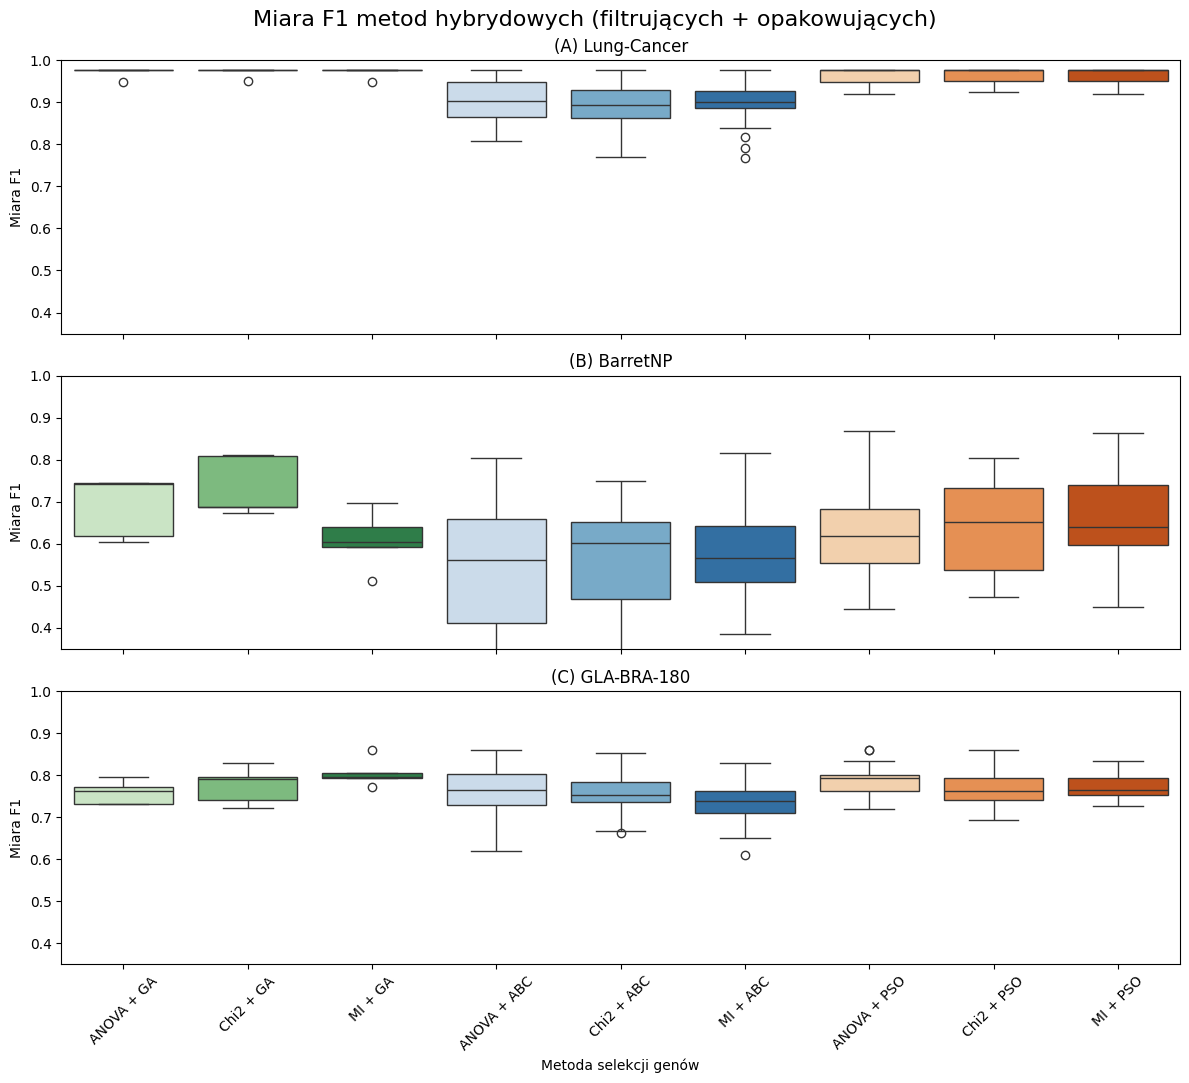

In [287]:
boxplot_results_hybrid_filters(hybrid_filters_all, metrics_col='F-measure',metryka='Miara F1', metoda_fs='hybrydowych (filtrujących + opakowujących)')

In [276]:
hybrid_filters_all[hybrid_filters_all['Dataset'] == 'Lung-Cancer']['F-measure'].max()

0.98

### Embedded 

In [246]:
def linesplot_results_hybrid(data, metric='F-measure', metryka='Miara F1', group_var='No. iterations', group_var_name='iteracji', metoda_fs='hybrydowej', legend_cols=2, metoda='GA', color='niebieski'):

    colors_hue = 3
    if color == 'zielony':
        green_palette = sns.color_palette("Greens", n_colors=colors_hue)
        combined_palette = green_palette 
    elif color == 'niebieski':
        blue_palette = sns.color_palette("Blues", n_colors=colors_hue)
        combined_palette = blue_palette 
    elif color == 'pomarańczowy':
        red_palette = sns.color_palette("Oranges", n_colors=colors_hue)
        combined_palette = red_palette 
    else: 
        green_palette = sns.color_palette("Greens", n_colors=colors_hue)
        blue_palette = sns.color_palette("Blues", n_colors=colors_hue)
        red_palette = sns.color_palette("Oranges", n_colors=colors_hue)
        combined_palette = green_palette + blue_palette + red_palette
        # combined_palette = blue_palette 

    # markers = ['s', '^', 'x', '.']
    markers = ['s', '^', 'x']

    datasets = data['Dataset'].unique()
    num_datasets = len(datasets)

    fig, axes = plt.subplots(nrows=int(num_datasets), ncols=1, figsize=(12, 11), sharex=True)

    axes = axes.flatten()

    for idx, dataset in enumerate(datasets):
        ax = axes[idx]
        dataset_df = data[data['Dataset'] == dataset]

        dataset_df = dataset_df.sort_values(by=['Hybrid method', group_var])

        methods = dataset_df['Hybrid method'].unique()

        for i, (method, group) in enumerate(dataset_df.groupby('Hybrid method')):
            color = combined_palette[i % len(combined_palette)] 
            marker = markers[i % len(markers)]
            ax.plot(group[group_var], group[metric], marker=marker, markerfacecolor='none', label=method, color=color)

        label = f'({chr(ord("A") + idx)})'

        ax.set_title(f'{label} {dataset}')

        if group_var_name == 'lambda':
            ax.set_xlabel('Wartość ' + str(group_var_name))
        elif group_var_name == 'init_pop':
            ax.set_xlabel('Wielkość zainicjalizowanej populacji rozwiązań')
        else: 
            ax.set_xlabel('Liczba ' + str(group_var_name))

        # ax.set_xlabel('Liczba ' + str(group_var_name))
        ax.set_ylabel(str(metryka))
        ax.set_ylim(0.35, 1.0)
        # ax.set_xlim(0, 1000)

        if group_var_name == 'genów':
            ax.set_xlim(0, 1010)
            ax.set_xticks([10, 20, 50, 100, 200, 500, 1000])
            ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000])
        elif group_var_name == 'drzew':
            ax.set_xlim(0, 2010)
            ax.set_xticks([10, 20, 50, 100, 200, 500, 1000, 2000])
            ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000, 2000])
        elif group_var_name == 'lambda':
            ax.set_xscale('log')
            ax.set_xticks([1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20])
            ax.set_xticklabels([1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20])
        elif group_var_name == 'iteracji':
            ax.set_xlim(-10, 1010)
            ax.set_xticks([0, 50, 100, 200, 500, 1000])
            ax.set_xticklabels([0, 50, 100, 200, 500, 1000])
        elif group_var_name == 'init_pop':
            ax.set_xlim(-10, 1010)
            ax.set_xticks([0, 10, 20, 50, 100, 200, 500, 1000])
            ax.set_xticklabels([0, 10, 20, 50, 100, 200, 500, 1000])

        xticks_positions = ax.get_xticks()
        # xticks_positions[1] += 1.1

        if group_var_name == 'genów':
            ax.set_xticks(xticks_positions)
        elif group_var_name == 'drzew':
            xticks_positions[2] += 1.1
            ax.set_xticks(xticks_positions)
        elif group_var_name == 'init_pop':
            xticks_positions[1] += 1.1
            ax.set_xticks(xticks_positions)
        # elif group_var_name == 'lambda':
        #     xticks_positions[2] += 1.1
        #     xticks_positions[3] += 1.1
        #     xticks_positions[4] += 1.1
        #     xticks_positions[5] += 1.1
            
        # ax.set_xticks(xticks_positions)
        ax.tick_params(axis='x', rotation=45)

        handles, labels = ax.get_legend_handles_labels()

    fig.legend(handles, labels, title='Hybrydowa metoda selekcji (wbudowana + opakowująca)', loc='upper center', bbox_to_anchor=(0.5, 0), ncol=legend_cols)

    if group_var_name == 'iteracji':
        plt.suptitle(str(metryka) + ' metod ' + str(metoda_fs) + ' wykorzystujących metodę opakowującą ' + str(metoda) + '\n dla określonej liczby ' + str(group_var_name), fontsize=16)
    elif group_var_name == 'init_pop':
        plt.suptitle(str(metryka) + ' metod ' + str(metoda_fs) + ' wykorzystujących metodę opakowującą ' + str(metoda) + '\n dla określonej wielkości zainicjalizowanej populacji rozwiązań', fontsize=16)
    elif group_var_name == 'lambda':
        plt.suptitle(str(metryka) + ' metody ' + str(metoda_fs) + ' dla określonej wartości ' + str(group_var_name), fontsize=16)
    else:
        plt.suptitle(str(metryka) + ' metody ' + str(metoda_fs) + ' dla wyselekcjonowanej liczby ' + str(group_var_name), fontsize=16)

    # plt.suptitle('Dokładność metod ' + str(metoda_fs) + ' dla określonej liczby ' + str(group_var_name), fontsize=16)
    plt.tight_layout()
    plt.show()

#### GA

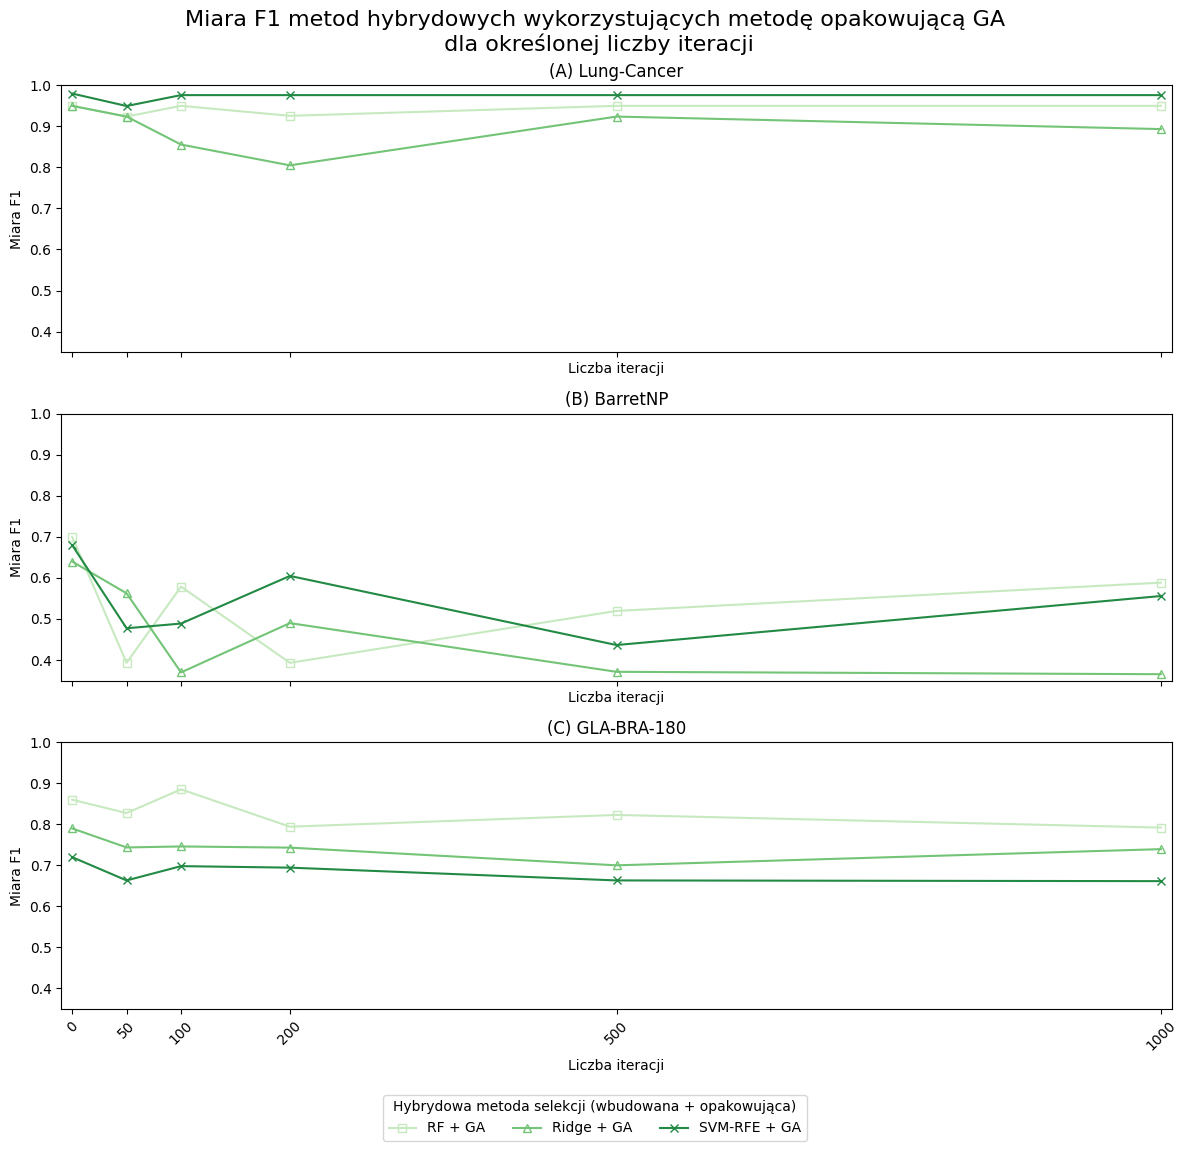

In [247]:
linesplot_results_hybrid(GA_embedded_selected, metric='F-measure', metryka='Miara F1', group_var='No. iterations', group_var_name='iteracji', metoda_fs='hybrydowych', legend_cols=3, metoda='GA', color='zielony')

#### ABC

##### No. iters

In [248]:
ABC_embedded_selected_iters = prepare_df_by_groupby(ABC_embedded_selected, groupby_var='Iterations')

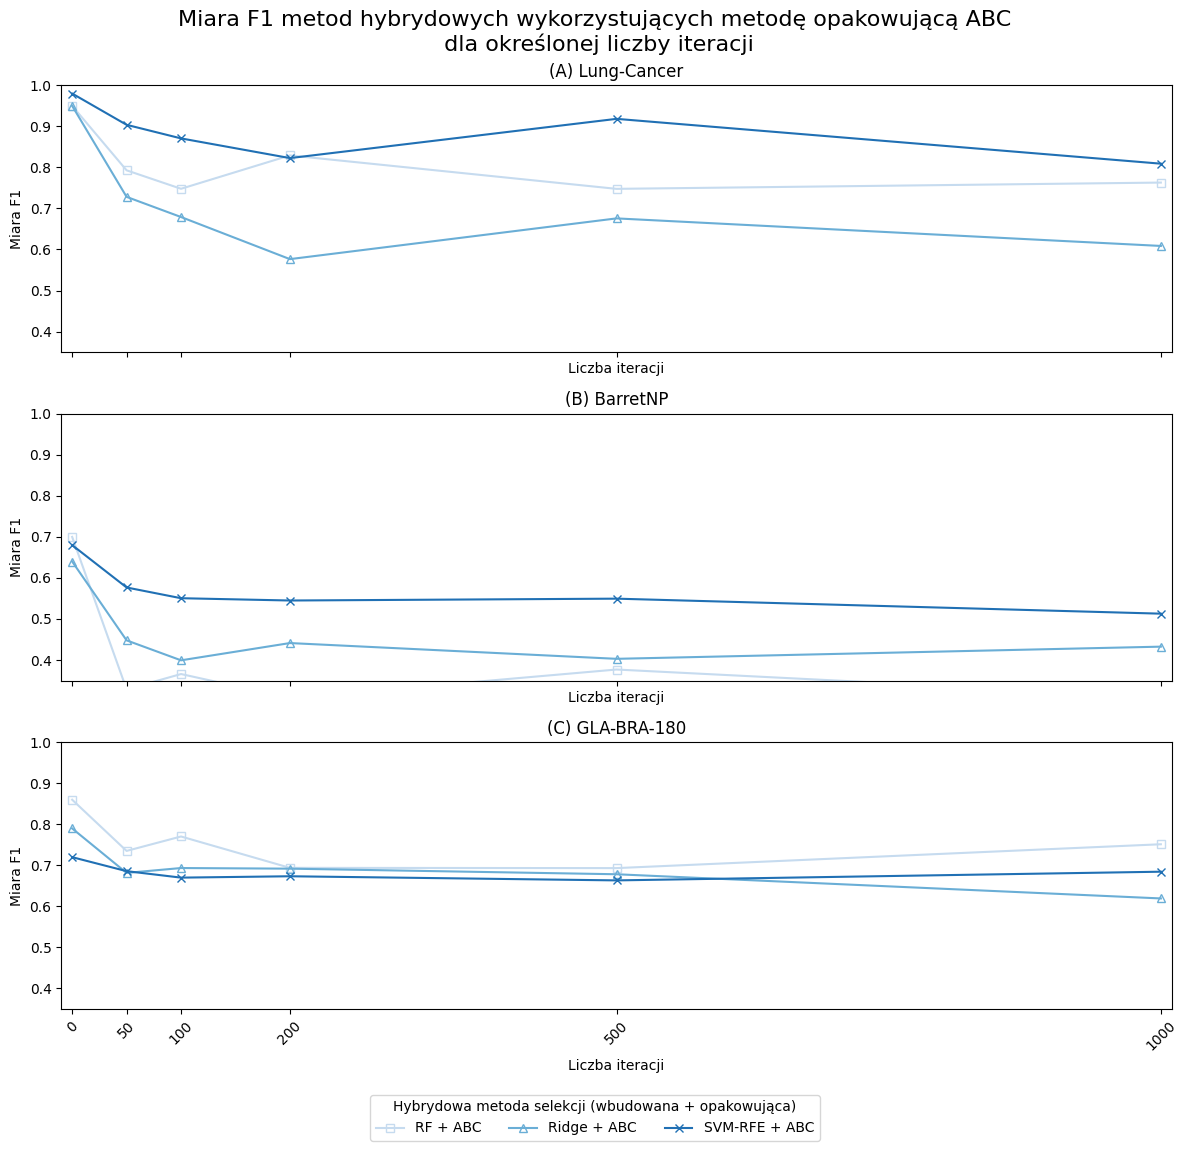

In [249]:
linesplot_results_hybrid(ABC_embedded_selected_iters, metric='F-measure_mean', metryka='Miara F1', group_var='Iterations', group_var_name='iteracji', metoda_fs='hybrydowych', legend_cols=3, metoda='ABC', color='niebieski')

##### No. init particles

In [250]:
ABC_embedded_selected_init = prepare_df_by_groupby(ABC_embedded_selected, groupby_var='Initialized particles')

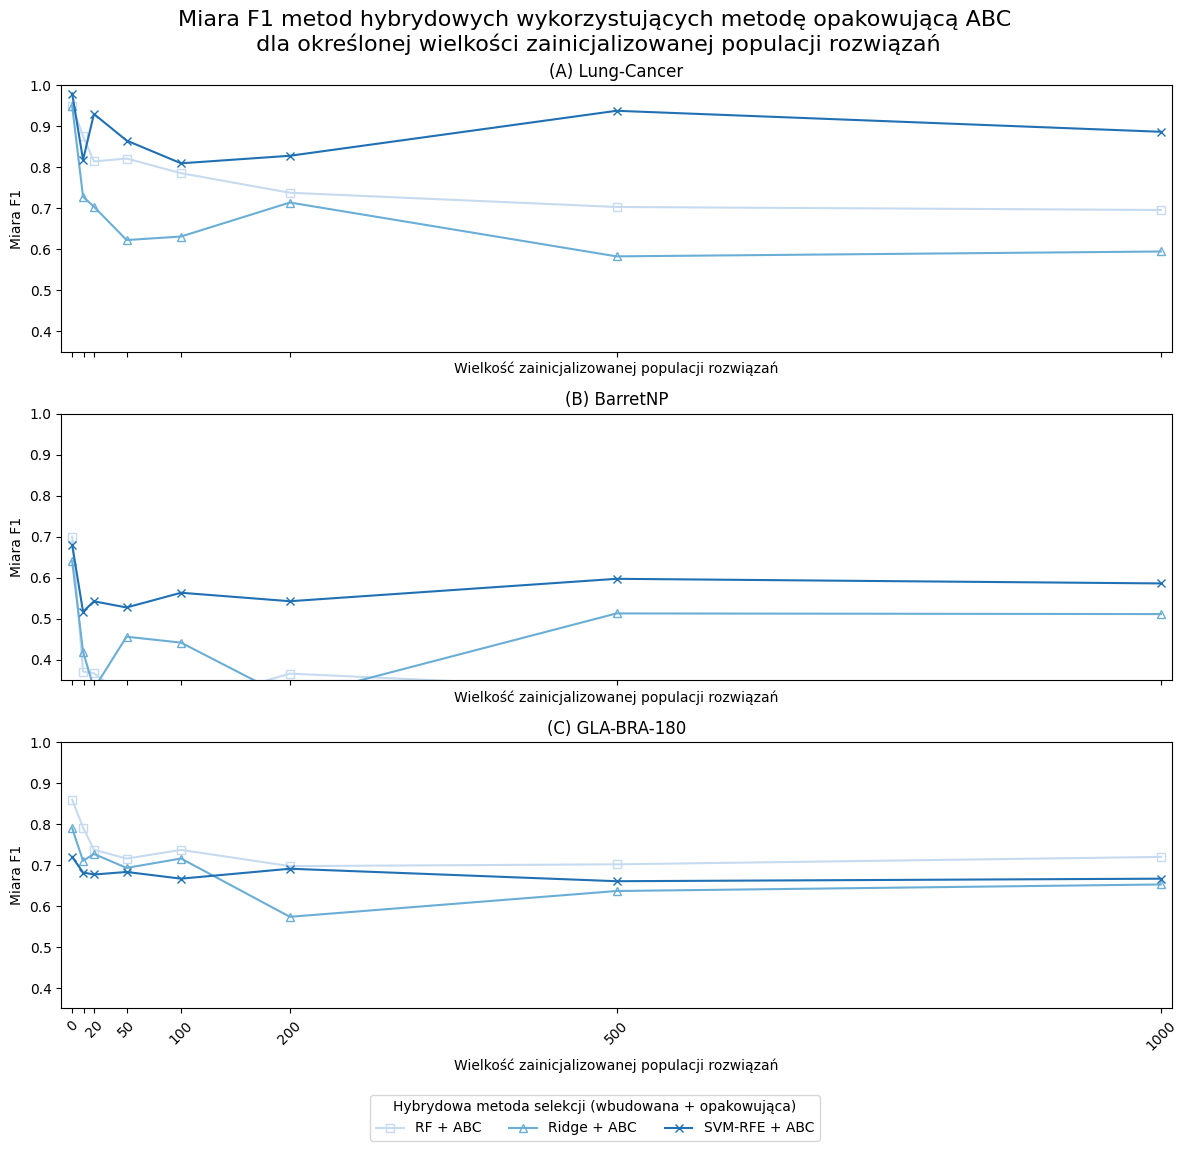

In [251]:
linesplot_results_hybrid(ABC_embedded_selected_init, metric='F-measure_mean', metryka='Miara F1', group_var='Initialized particles', group_var_name='init_pop', metoda_fs='hybrydowych', legend_cols=3, metoda='ABC', color='niebieski')

#### PSO

##### No. iters

In [252]:
PSO_embedded_selected_iters = prepare_df_by_groupby(PSO_embedded_selected, groupby_var='Iterations')

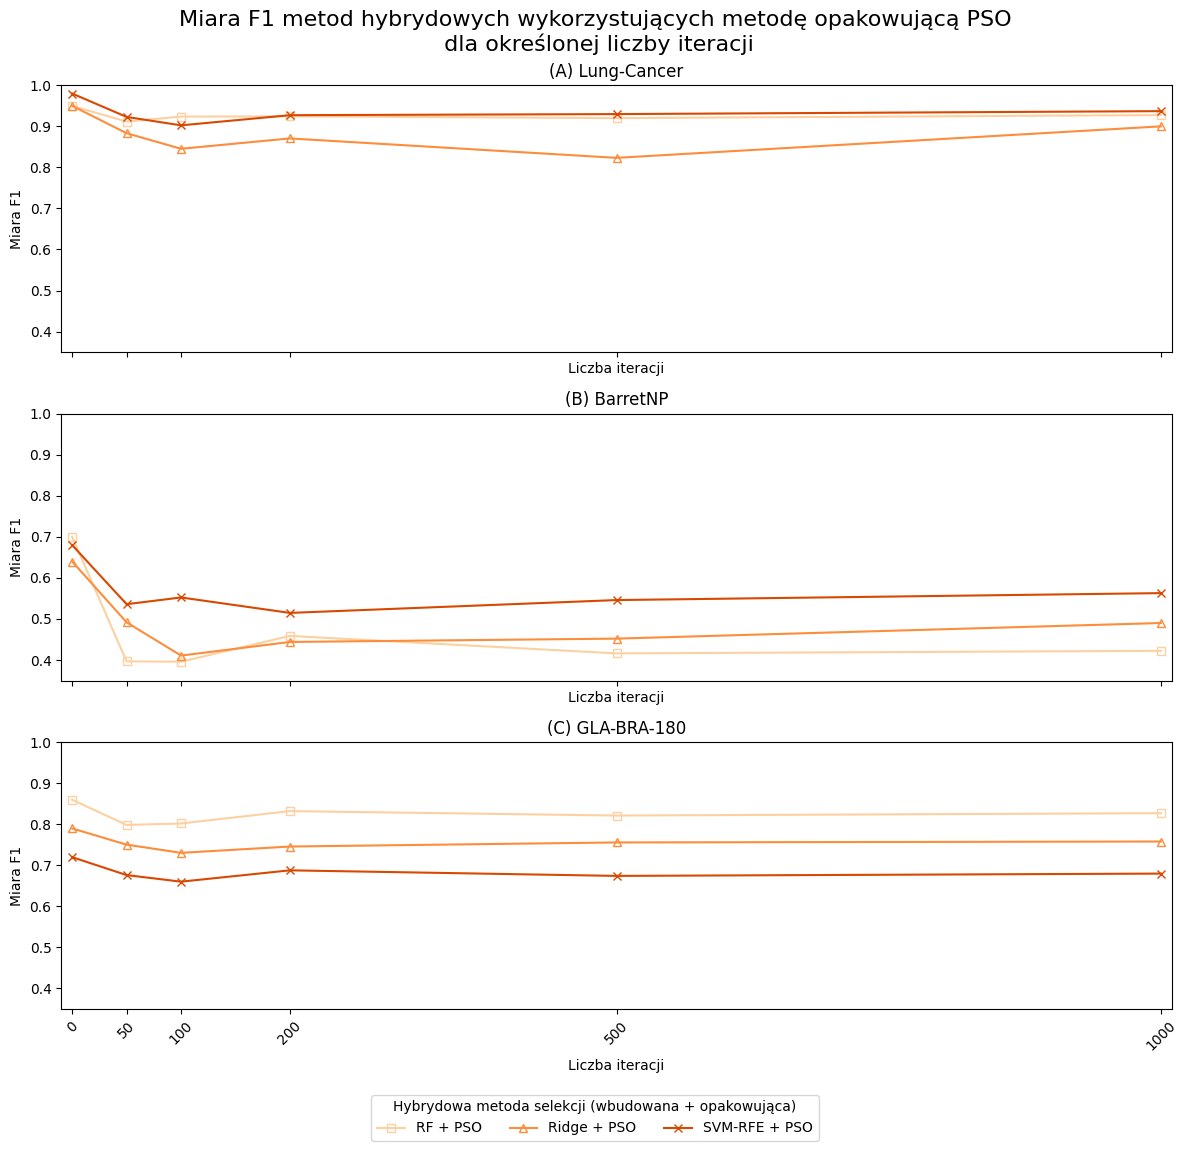

In [253]:
linesplot_results_hybrid(PSO_embedded_selected_iters, metric='F-measure_mean', metryka='Miara F1', group_var='Iterations', group_var_name='iteracji', metoda_fs='hybrydowych', legend_cols=3, metoda='PSO', color='pomarańczowy')

##### No. init particles

In [255]:
PSO_embedded_selected_init = prepare_df_by_groupby(PSO_embedded_selected, groupby_var='Initialized particles')

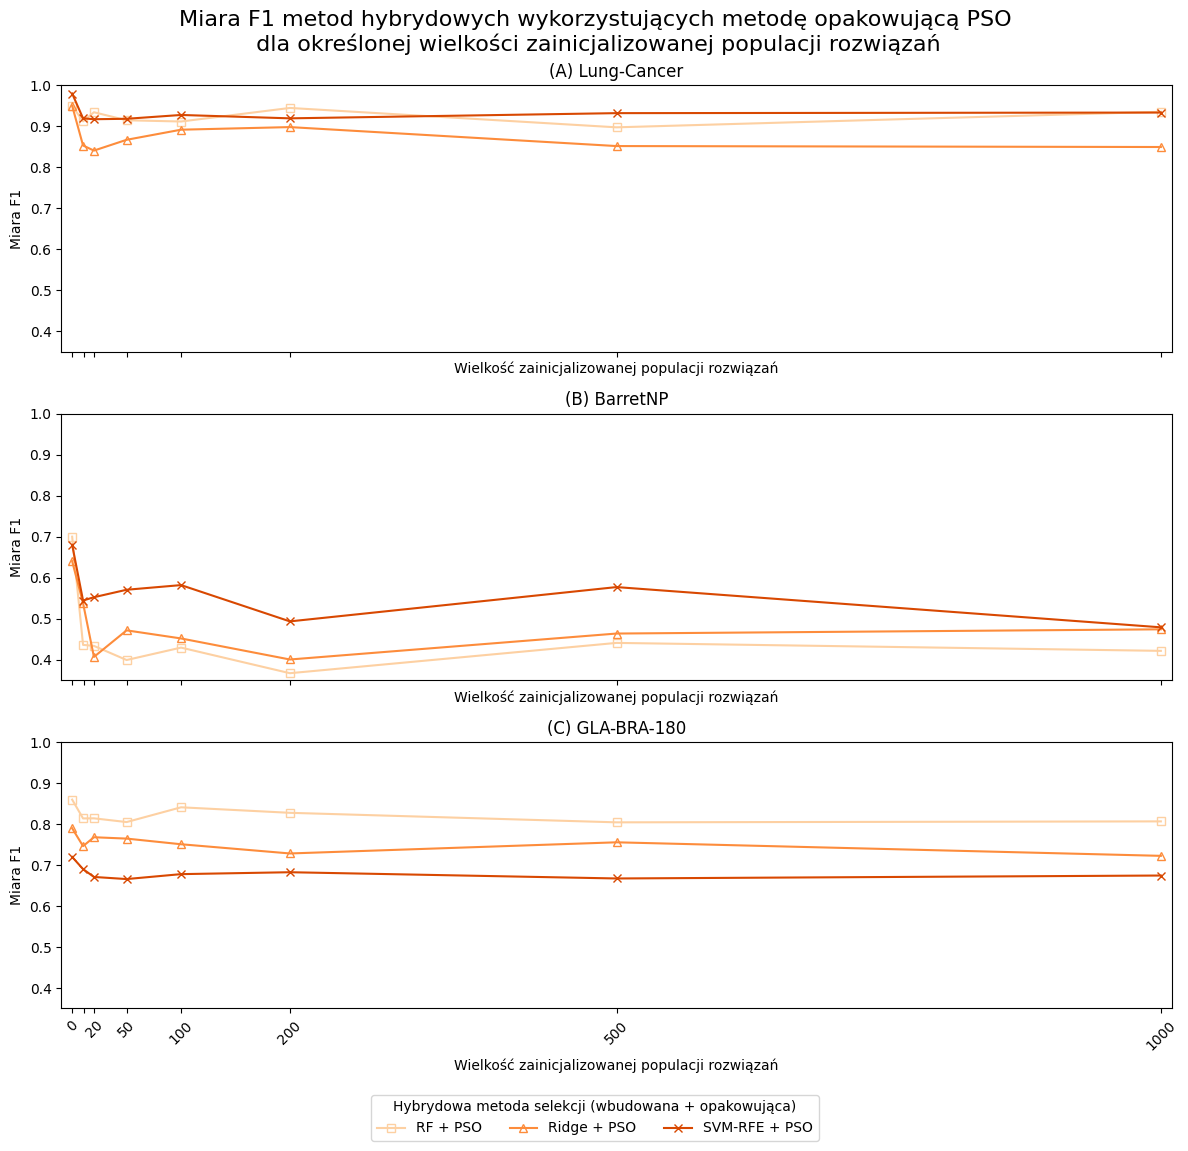

In [256]:
linesplot_results_hybrid(PSO_embedded_selected_init, metric='F-measure_mean', metryka='Miara F1', group_var='Initialized particles', group_var_name='init_pop', metoda_fs='hybrydowych', legend_cols=3, metoda='PSO', color='pomarańczowy')

### Hybrid embedded comaprision 

In [289]:
# GA_filters_selected_info = GA_filters_selected[['Hybrid method', 'Dataset', 'F-measure']]
GA_embedded_selected_info = GA_embedded_selected[GA_embedded_selected['No. iterations'] != 0]
GA_embedded_selected_info = GA_embedded_selected_info[['Hybrid method', 'Dataset', 'F-measure']]

# ABC_filters_selected_info = ABC_filters_selected[['Hybrid method', 'Dataset', 'F-measure']]
ABC_embedded_selected_info = ABC_embedded_selected[ABC_embedded_selected['Iterations'] != 0]
ABC_embedded_selected_info = ABC_embedded_selected_info[['Hybrid method', 'Dataset', 'F-measure']]

# PSO_filters_selected_info = PSO_filters_selected[['Hybrid method', 'Dataset', 'F-measure']]
PSO_embedded_selected_info = PSO_embedded_selected[PSO_embedded_selected['Iterations'] != 0]
PSO_embedded_selected_info = PSO_embedded_selected_info[['Hybrid method', 'Dataset', 'F-measure']]

hybrid_filters_all = pd.concat([GA_embedded_selected_info, ABC_embedded_selected_info, PSO_embedded_selected_info], ignore_index=True)

In [290]:
hybrid_filters_all['Hybrid method'].unique()

array(['Ridge + GA', 'SVM-RFE + GA', 'RF + GA', 'Ridge + ABC', 'RF + ABC',
       'SVM-RFE + ABC', 'Ridge + PSO', 'RF + PSO', 'SVM-RFE + PSO'],
      dtype=object)

In [291]:
def boxplot_results_hybrid_embedded(data, metrics_col='',metryka='', metoda_fs=''):

    colors_hue = 3
    green_palette = sns.color_palette("Greens", n_colors=colors_hue)
    blue_palette = sns.color_palette("Blues", n_colors=colors_hue)
    red_palette = sns.color_palette("Oranges", n_colors=colors_hue)
    combined_palette = green_palette + blue_palette + red_palette


    datasets = data['Dataset'].unique()

    num_datasets = len(datasets)
    fig, axes = plt.subplots(nrows=int(num_datasets), ncols=1, figsize=(12, 11), sharex=True)

    axes = axes.flatten()

    feature_methods_order = ['RF + GA', 'Ridge + GA', 'SVM-RFE + GA', 'RF + ABC', 'Ridge + ABC', 'SVM-RFE + ABC', 'RF + PSO', 'Ridge + PSO', 'SVM-RFE + PSO']

    custom_palette = ['forestgreen', 'cornflowerblue', 'darkorange']

    for i, dataset in enumerate(datasets):
        subset = data[data['Dataset'] == dataset]
        ax = axes[i]
        sns.boxplot(x='Hybrid method', y=data[metrics_col], data=subset, ax=ax, order=feature_methods_order, palette=combined_palette)
        ax.set_xticks(range(len(feature_methods_order)))
        ax.set_xticklabels(feature_methods_order, rotation=45)
        ax.set_ylim(0.35, 1.0)
        ax.set_xlabel('Metoda selekcji genów')
        ax.set_ylabel(str(metryka))

        label = f'({chr(ord("A") + i)})'

        ax.set_title(f'{label} {dataset}')

    plt.suptitle(str(metryka) + ' metod ' + str(metoda_fs), fontsize=16)

    plt.tight_layout()
    plt.show()

C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\1263870586.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hybrid method', y=data[metrics_col], data=subset, ax=ax, order=feature_methods_order, palette=combined_palette)
C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\1263870586.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hybrid method', y=data[metrics_col], data=subset, ax=ax, order=feature_methods_order, palette=combined_palette)
C:\Users\Kacper\AppData\Local\Temp\ipykernel_21180\1263870586.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

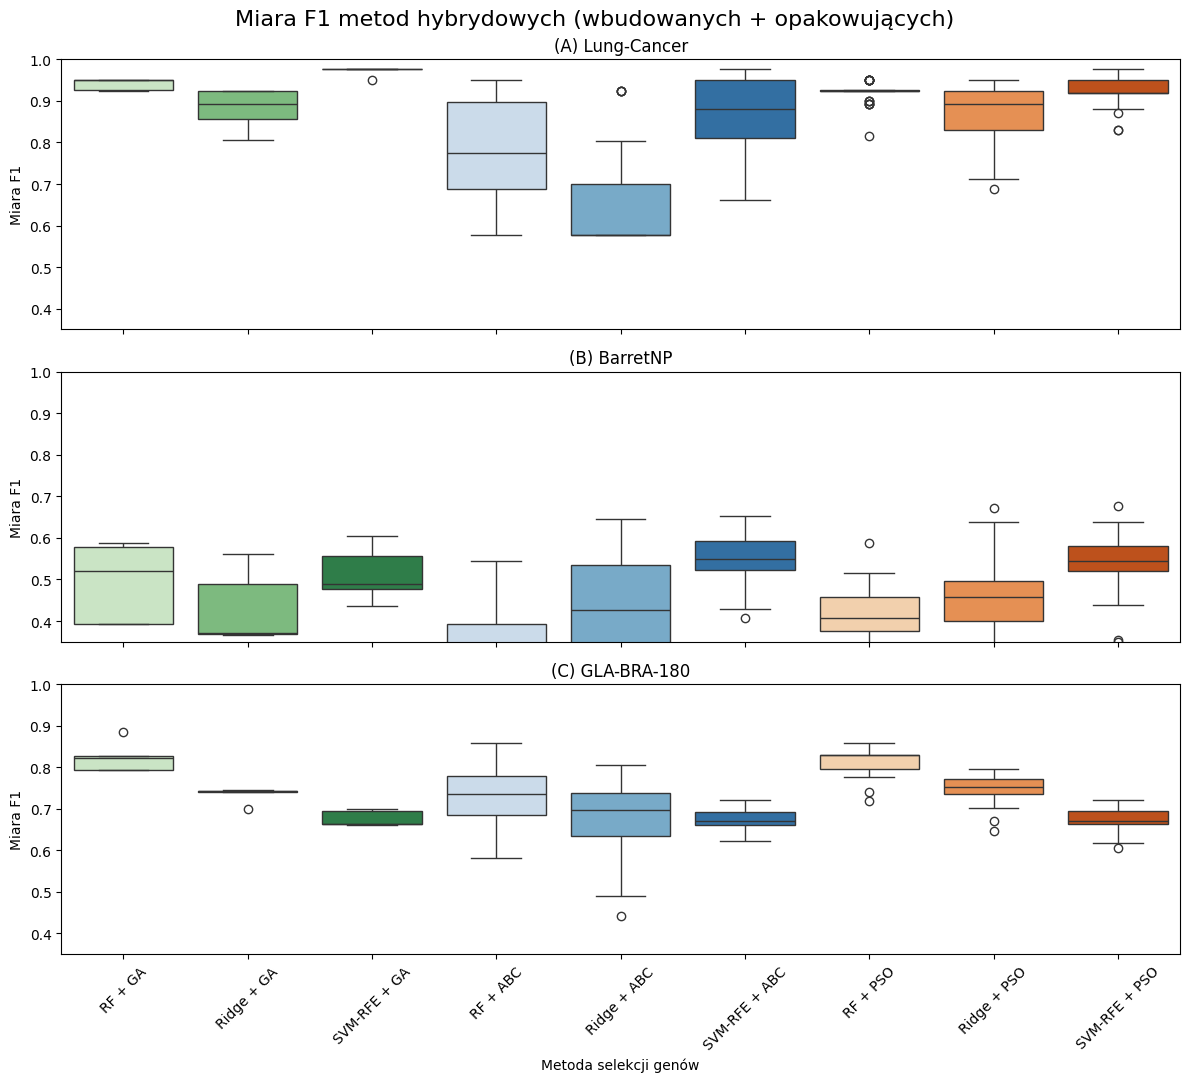

In [292]:
boxplot_results_hybrid_embedded(hybrid_filters_all, metrics_col='F-measure',metryka='Miara F1', metoda_fs='hybrydowych (wbudowanych + opakowujących)')

In [ ]:
def linesplot_results_hybrid_common(data, metric='F-measure', metryka='Miara F1', group_var='No. iterations', group_var_name='iteracji', metoda_fs='hybrydowej', legend_cols=3, metoda='GA', color='niebieski'):

    colors_hue = 4

    green_palette = sns.color_palette("Greens", n_colors=colors_hue)
    blue_palette = sns.color_palette("Blues", n_colors=colors_hue)
    red_palette = sns.color_palette("Oranges", n_colors=colors_hue)
    combined_palette = green_palette + blue_palette + red_palette
    # combined_palette = blue_palette 

    markers = ['s', '^', 'x', '.']

    datasets = data['Dataset'].unique()
    num_datasets = len(datasets)

    fig, axes = plt.subplots(nrows=int(num_datasets), ncols=1, figsize=(12, 11), sharex=True)

    axes = axes.flatten()

    for idx, dataset in enumerate(datasets):
        ax = axes[idx]
        dataset_df = data[data['Dataset'] == dataset]

        dataset_df = dataset_df.sort_values(by=['Hybrid method', group_var])

        methods = dataset_df['Hybrid method'].unique()

        for i, (method, group) in enumerate(dataset_df.groupby('Hybrid method')):
            color = combined_palette[i % len(combined_palette)] 
            marker = markers[i % len(markers)]
            ax.plot(group[group_var], group[metric], marker=marker, markerfacecolor='none', label=method, color=color)

        label = f'({chr(ord("A") + idx)})'

        ax.set_title(f'{label} {dataset}')

        if group_var_name == 'lambda':
            ax.set_xlabel('Wartość ' + str(group_var_name))
        elif group_var_name == 'init_pop':
            ax.set_xlabel('Wielkość zainicjalizowanej populacji rozwiązań')
        else: 
            ax.set_xlabel('Liczba ' + str(group_var_name))

        # ax.set_xlabel('Liczba ' + str(group_var_name))
        ax.set_ylabel(str(metryka))
        ax.set_ylim(0.35, 1.0)
        # ax.set_xlim(0, 1000)

        if group_var_name == 'genów':
            ax.set_xlim(0, 1010)
            ax.set_xticks([10, 20, 50, 100, 200, 500, 1000])
            ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000])
        elif group_var_name == 'drzew':
            ax.set_xlim(0, 2010)
            ax.set_xticks([10, 20, 50, 100, 200, 500, 1000, 2000])
            ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000, 2000])
        elif group_var_name == 'lambda':
            ax.set_xscale('log')
            ax.set_xticks([1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20])
            ax.set_xticklabels([1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20])
        elif group_var_name == 'iteracji':
            ax.set_xlim(-10, 1010)
            ax.set_xticks([0, 50, 100, 200, 500, 1000])
            ax.set_xticklabels([0, 50, 100, 200, 500, 1000])
        elif group_var_name == 'init_pop':
            ax.set_xlim(-10, 1010)
            ax.set_xticks([0, 10, 20, 50, 100, 200, 500, 1000])
            ax.set_xticklabels([0, 10, 20, 50, 100, 200, 500, 1000])

        xticks_positions = ax.get_xticks()
        # xticks_positions[1] += 1.1

        if group_var_name == 'genów':
            ax.set_xticks(xticks_positions)
        elif group_var_name == 'drzew':
            xticks_positions[2] += 1.1
            ax.set_xticks(xticks_positions)
        elif group_var_name == 'init_pop':
            xticks_positions[1] += 1.1
            ax.set_xticks(xticks_positions)
        # elif group_var_name == 'lambda':
        #     xticks_positions[2] += 1.1
        #     xticks_positions[3] += 1.1
        #     xticks_positions[4] += 1.1
        #     xticks_positions[5] += 1.1
            
        # ax.set_xticks(xticks_positions)
        ax.tick_params(axis='x', rotation=45)

        handles, labels = ax.get_legend_handles_labels()

    fig.legend(handles, labels, title='Hybrydowa metoda selekcji (filtrująca + opakowująca)', loc='upper center', bbox_to_anchor=(0.5, 0), ncol=legend_cols)

    if group_var_name == 'iteracji':
        plt.suptitle(str(metryka) + ' metod ' + str(metoda_fs) + ' wykorzystujących metodę opakowującą ' + str(metoda) + '\n dla określonej liczby ' + str(group_var_name), fontsize=16)
    elif group_var_name == 'init_pop':
        plt.suptitle(str(metryka) + ' metod ' + str(metoda_fs) + ' wykorzystujących metodę opakowującą ' + str(metoda) + '\n dla określonej wielkości zainicjalizowanej populacji rozwiązań', fontsize=16)
    elif group_var_name == 'lambda':
        plt.suptitle(str(metryka) + ' metody ' + str(metoda_fs) + ' dla określonej wartości ' + str(group_var_name), fontsize=16)
    else:
        plt.suptitle(str(metryka) + ' metody ' + str(metoda_fs) + ' dla wyselekcjonowanej liczby ' + str(group_var_name), fontsize=16)

    # plt.suptitle('Dokładność metod ' + str(metoda_fs) + ' dla określonej liczby ' + str(group_var_name), fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
num_colors = len(filter_results_df['Method'].unique())
colors_hue = 4

green_palette = sns.color_palette("Greens", n_colors=colors_hue)
blue_palette = sns.color_palette("Blues", n_colors=colors_hue)
red_palette = sns.color_palette("Oranges", n_colors=colors_hue)

combined_palette = green_palette + blue_palette + red_palette

# sns.palplot(combined_palette)
# plt.show()

# print(combined_palette)

markers = ['s', '^', 'x', '.']

datasets = filter_results_df['Dataset'].unique()
num_datasets = len(datasets)

fig, axes = plt.subplots(nrows=int(num_datasets/2), ncols=2, figsize=(12, 11), sharex=True)

axes = axes.flatten()

for idx, dataset in enumerate(datasets):
    ax = axes[idx]
    dataset_df = filter_results_df[filter_results_df['Dataset'] == dataset]

    dataset_df = dataset_df.sort_values(by=['Method', 'No. selected genes'])

    methods = dataset_df['Method'].unique()

    for i, (method, group) in enumerate(dataset_df.groupby('Method')):
        color = combined_palette[i % len(combined_palette)] 
        marker = markers[i % len(markers)]
        ax.plot(group['No. selected genes'], group['Accuracy'], marker=marker, markerfacecolor='none', label=method, color=color)

    label = chr(ord('A') + idx)  # Convert index to corresponding alphabet letter
    ax.text(0.005, 0.99, f'({label})', transform=ax.transAxes, fontsize=11, va='top', ha='left')

    ax.set_title(str(dataset))
    ax.set_xlabel('Liczba wyselekcjonowanych genów')
    ax.set_ylabel('Dokadność')
    ax.set_ylim(0.35, 1.0)
    # ax.set_xlim(10, 1000)
    ax.set_xticks([10, 20, 50, 100, 200, 500, 1000])
    ax.set_xticklabels([10, 20, 50, 100, 200, 500, 1000])
    xticks_positions = ax.get_xticks()
    xticks_positions[1] += 1.1
    ax.set_xticks(xticks_positions)
    ax.tick_params(axis='x', rotation=45)

    handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, title='Metoda selekcji + klasyfikator', loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)

plt.suptitle('Dokładność metod filtrujących dla wyselekcjonowanej liczby genów', fontsize=16)
plt.tight_layout()
plt.show()